In [1]:
#set up python modules (be sure to do this first)
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from IPython.core.display import Image
import io
import base64

from IPython.core.display import HTML
import bonsai # my custom wrapper library
import tipsy # my custom .tipsy file utility 

In [2]:
import shutil
import os

def clear_data():
    if os.path.exists('./data'):
        shutil.rmtree('./data')
    os.mkdir('./data')

    if os.path.exists('./fig'):
        shutil.rmtree('./fig')
    os.mkdir('./fig')

# GPU: GTX 1060

# Plummer, Barnes Hut Bonsai

## 65000 Stars

In [7]:
''' 
settings
'''

# Directories
sim_title =  "RESULTS/65000_plummer_barnes_hut"
data_prefix='data/plummer_snap_mpi'
figure_prefix='fig/plummer'
bonsai_binary = "../Bonsai/build/bonsai2_slowdust" # after cmake tools build

# Bonsai config
step = 0.0625/1
nStars = 65000 # when we run MPI this is number of stars per process
T_ = 5

# Plot
dir_comp = False
p_size = 1
lim=5
nRed=int(nStars/2)

''' 
run and save
'''

clear_data()
bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
bonsai.parse_save_log(outfile=sim_title)
tipsy.read_tipsy(data_prefix,figure_prefix, pointsize = p_size,lim=lim,nRed=nRed)
tipsy.make_mp4(figure_prefix, sim_title)

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Saved: RESULTS/65000_plummer_barnes_hut_0.mp4


frame=   81 fps= 25 q=-1.0 Lsize=    4860kB time=00:00:03.90 bitrate=10208.5kbits/s speed= 1.2x    
video:4858kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.038815%
[libx264 @ 0x55b3d60017c0] frame I:1     Avg QP: 7.34  size:240369
[libx264 @ 0x55b3d60017c0] frame P:20    Avg QP:23.33  size: 79626
[libx264 @ 0x55b3d60017c0] frame B:60    Avg QP:28.42  size: 52354
[libx264 @ 0x55b3d60017c0] consecutive B-frames:  1.2%  0.0%  0.0% 98.8%
[libx264 @ 0x55b3d60017c0] mb I  I16..4: 32.4% 19.9% 47.7%
[libx264 @ 0x55b3d60017c0] mb P  I16..4:  1.5%  5.4%  7.5%  P16..4: 10.7%  9.9%  6.9%  0.0%  0.0%    skip:58.1%
[libx264 @ 0x55b3d60017c0] mb B  I16..4:  0.1%  1.2%  1.4%  B16..8: 14.0%  8.6%  7.2%  direct: 5.9%  skip:61.5%  L0:39.4% L1:33.3% BI:27.3%
[libx264 @ 0x55b3d60017c0] final ratefactor: 22.40
[libx264 @ 0x55b3d60017c0] 8x8 transform intra:36.1% inter:10.0%
[libx264 @ 0x55b3d60017c0] coded y,u,v intra: 59.7% 56.5% 54.6% inter: 11.2% 7.7% 7.1%
[libx264 @ 0

## N stars vs Time

In [32]:
## Scaling for different n sizes!

plot_title = "RESULTS/plummer_barnes_hut_n_vs_time"
data_prefix='data/plummer_snap_mpi'
figure_prefix='fig/plummer'
bonsai_binary = "../Bonsai/build/bonsai2_slowdust" # after cmake tools build

# Bonsai config
step = 0.0625/1
T_ = 5

# Plot
dir_comp = False
p_size = 1
lim=5

n_pows = [2,3,4,5,6,7]
parse_list = []
for i in n_pows:
    nStars  = 10**i
    nRed=int(nStars/2)
    clear_data()
    bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
    parse_list.append(bonsai.parse_save_log(outfile=None))

../Bonsai/build/bonsai2_slowdust   --plummer 100 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 100 per process 
....................................................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.137754 Threads/log: 0.000158072 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.3629537319  Ekin= 0.241796   Epot= -0.604749 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  2.86102e-06 sec



iter=0 : time= 0  Etot= -0.3629537319  Ekin= 0.241796   Epot= -0.604749 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec
iter=1 : time= 0.0625  Etot= -0.3621170314  Ekin= 0.249293   Epot= -0.61141 : de= -0.00230525 ( 0.00230525 ) d(de)= -0.00230525 ( 0.00230525 ) t_sim=  1.0001 sec
iter=2 : time= 0.125  Etot= -0.3621217679  Ekin= 0.253127   Epot= -0.615249 : de= -0.0022922 ( 0.00230525 ) d(de)= 1.30801e-05 ( 0.00230525 ) t_sim=  1.00254 sec
iter=3 : time= 0.1875  Etot= -0.3615919591  Ekin= 0.254243   Epot= -0.615835 : de= -0.00375192 ( 0.00375192 ) d(de)= -0.00146307 ( 0.00230525 ) t_sim=  1.00492 sec
iter=4 : time= 0.25  Etot= -0.3615512186  Ekin= 0.256002   Epot= -0.617553 : de= -0.00386417 ( 0.00386417 ) d(de)= -0.00011267 ( 0.00230525 ) t_sim=  1.00941 sec
iter=5 : time= 0.3125  Etot= -0.3618810132  Ekin= 0.258304   Epot= -0.620185 : de= -0.00295552 ( 0.00386417 ) d(de)= 0.000912166 ( 0.00230525 ) t_sim=  1.01386 sec
iter=6 : time= 0.375  Etot= -0.3616744896  Ekin= 0.260918   Epot= -0

iter=1 : time= 0.0625  Etot= -0.3621170314  Ekin= 0.249293   Epot= -0.61141 : de= -0.00230525 ( 0.00230525 ) d(de)= -0.00230525 ( 0.00230525 ) t_sim=  1.0001 sec
iter=2 : time= 0.125  Etot= -0.3621217679  Ekin= 0.253127   Epot= -0.615249 : de= -0.0022922 ( 0.00230525 ) d(de)= 1.30801e-05 ( 0.00230525 ) t_sim=  1.00255 sec
iter=3 : time= 0.1875  Etot= -0.3615919591  Ekin= 0.254243   Epot= -0.615835 : de= -0.00375192 ( 0.00375192 ) d(de)= -0.00146307 ( 0.00230525 ) t_sim=  1.00493 sec
iter=4 : time= 0.25  Etot= -0.3615512186  Ekin= 0.256002   Epot= -0.617553 : de= -0.00386417 ( 0.00386417 ) d(de)= -0.00011267 ( 0.00230525 ) t_sim=  1.00942 sec
iter=5 : time= 0.3125  Etot= -0.3618810132  Ekin= 0.258304   Epot= -0.620185 : de= -0.00295552 ( 0.00386417 ) d(de)= 0.000912166 ( 0.00230525 ) t_sim=  1.01386 sec
iter=6 : time= 0.375  Etot= -0.3616744896  Ekin= 0.260918   Epot= -0.622592 : de= -0.00352453 ( 0.00386417 ) d(de)= -0.000570695 ( 0.00230525 ) t_sim=  1.01613 sec
iter=7 : time= 0.4375 

iter=71 : time= 4.4375  Etot= -0.3531636761  Ekin= 0.287144   Epot= -0.640308 : de= -0.0269733 ( 0.0269733 ) d(de)= -0.00179222 ( 0.00641291 ) t_sim=  1.20193 sec
iter=72 : time= 4.5  Etot= -0.3518428029  Ekin= 0.287097   Epot= -0.63894 : de= -0.0306125 ( 0.0306125 ) d(de)= -0.00374012 ( 0.00641291 ) t_sim=  1.20375 sec
iter=73 : time= 4.5625  Etot= -0.3518901731  Ekin= 0.288502   Epot= -0.640392 : de= -0.030482 ( 0.0306125 ) d(de)= 0.000134635 ( 0.00641291 ) t_sim=  1.20683 sec
iter=74 : time= 4.625  Etot= -0.3521472047  Ekin= 0.288791   Epot= -0.640938 : de= -0.0297738 ( 0.0306125 ) d(de)= 0.000730431 ( 0.00641291 ) t_sim=  1.21241 sec
iter=75 : time= 4.6875  Etot= -0.3524849657  Ekin= 0.288013   Epot= -0.640498 : de= -0.0288433 ( 0.0306125 ) d(de)= 0.000959147 ( 0.00641291 ) t_sim=  1.21912 sec
iter=76 : time= 4.75  Etot= -0.3522018306  Ekin= 0.28755   Epot= -0.639752 : de= -0.0296233 ( 0.0306125 ) d(de)= -0.000803254 ( 0.00641291 ) t_sim=  1.22208 sec
iter=77 : time= 4.8125  Etot= 

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.140484 Threads/log: 0.0011251 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2526758459  Ekin= 0.23497   Epot= -0.487646 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  5.96046e-06 sec



iter=0 : time= 0  Etot= -0.2526758459  Ekin= 0.23497   Epot= -0.487646 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.2526497369  Ekin= 0.234771   Epot= -0.487421 : de= -0.00010333 ( 0.00010333 ) d(de)= -0.00010333 ( 0.00010333 ) t_sim=  1.00035 sec
iter=2 : time= 0.125  Etot= -0.2527488697  Ekin= 0.234655   Epot= -0.487404 : de= 0.000289002 ( 0.000289002 ) d(de)= 0.000392373 ( 0.000392373 ) t_sim=  1.00351 sec
iter=3 : time= 0.1875  Etot= -0.252650157  Ekin= 0.234546   Epot= -0.487196 : de= -0.000101668 ( 0.000289002 ) d(de)= -0.000390556 ( 0.000392373 ) t_sim=  1.00676 sec
iter=4 : time= 0.25  Etot= -0.2526867807  Ekin= 0.234511   Epot= -0.487198 : de= 4.32759e-05 ( 0.000289002 ) d(de)= 0.000144958 ( 0.000392373 ) t_sim=  1.00885 sec
iter=5 : time= 0.3125  Etot= -0.2526471487  Ekin= 0.234453   Epot= -0.4871 : de= -0.000113573 ( 0.000289002 ) d(de)= -0.000156842 ( 0.000392373 ) t_sim=  1.0109 sec
iter=6 : time= 0.375  Etot= -0.2526019797  Ekin= 0.234363   Epot= -0.486965 : de= -0.000292336 ( 0.000292336 ) d(de)= -0.000178783 ( 0.000392373 ) t_sim=  1.01564 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.2526497369  Ekin= 0.234771   Epot= -0.487421 : de= -0.00010333 ( 0.00010333 ) d(de)= -0.00010333 ( 0.00010333 ) t_sim=  1.00034 sec
iter=2 : time= 0.125  Etot= -0.2527488697  Ekin= 0.234655   Epot= -0.487404 : de= 0.000289002 ( 0.000289002 ) d(de)= 0.000392373 ( 0.000392373 ) t_sim=  1.0035 sec
iter=3 : time= 0.1875  Etot= -0.252650157  Ekin= 0.234546   Epot= -0.487196 : de= -0.000101668 ( 0.000289002 ) d(de)= -0.000390556 ( 0.000392373 ) t_sim=  1.00676 sec
iter=4 : time= 0.25  Etot= -0.2526867807  Ekin= 0.234511   Epot= -0.487198 : de= 4.32759e-05 ( 0.000289002 ) d(de)= 0.000144958 ( 0.000392373 ) t_sim=  1.00885 sec
iter=5 : time= 0.3125  Etot= -0.2526471487  Ekin= 0.234453   Epot= -0.4871 : de= -0.000113573 ( 0.000289002 ) d(de)= -0.000156842 ( 0.000392373 ) t_sim=  1.0109 sec
iter=6 : time= 0.375  Etot= -0.2526019797  Ekin= 0.234363   Epot= -0.486965 : de= -0.000292336 ( 0.000292336 ) d(de)= -0.000178783 ( 0.000392373 ) t_sim=  1.01564 sec
iter=7 : 

iter=62 : time= 3.875  Etot= -0.252453617  Ekin= 0.243092   Epot= -0.495545 : de= -0.000879502 ( 0.000879502 ) d(de)= -0.000107365 ( 0.000492442 ) t_sim=  1.20384 sec
iter=63 : time= 3.9375  Etot= -0.2524481328  Ekin= 0.242953   Epot= -0.495402 : de= -0.000901206 ( 0.000901206 ) d(de)= -2.17237e-05 ( 0.000492442 ) t_sim=  1.20719 sec
iter=64 : time= 4  Etot= -0.2524812616  Ekin= 0.242914   Epot= -0.495395 : de= -0.000770095 ( 0.000901206 ) d(de)= 0.00013123 ( 0.000492442 ) t_sim=  1.21018 sec
iter=65 : time= 4.0625  Etot= -0.2524687224  Ekin= 0.242983   Epot= -0.495452 : de= -0.00081972 ( 0.000901206 ) d(de)= -4.96638e-05 ( 0.000492442 ) t_sim=  1.21789 sec
iter=66 : time= 4.125  Etot= -0.2524533811  Ekin= 0.242958   Epot= -0.495411 : de= -0.000880436 ( 0.000901206 ) d(de)= -6.07653e-05 ( 0.000492442 ) t_sim=  1.222 sec
iter=67 : time= 4.1875  Etot= -0.2523727569  Ekin= 0.242754   Epot= -0.495127 : de= -0.00119952 ( 0.00119952 ) d(de)= -0.000319363 ( 0.000492442 ) t_sim=  1.22567 sec
i

iter=62 : time= 3.875  Etot= -0.252453617  Ekin= 0.243092   Epot= -0.495545 : de= -0.000879502 ( 0.000879502 ) d(de)= -0.000107365 ( 0.000492442 ) t_sim=  1.20384 sec
iter=63 : time= 3.9375  Etot= -0.2524481328  Ekin= 0.242953   Epot= -0.495402 : de= -0.000901206 ( 0.000901206 ) d(de)= -2.17237e-05 ( 0.000492442 ) t_sim=  1.20718 sec
iter=64 : time= 4  Etot= -0.2524812616  Ekin= 0.242914   Epot= -0.495395 : de= -0.000770095 ( 0.000901206 ) d(de)= 0.00013123 ( 0.000492442 ) t_sim=  1.21018 sec
iter=65 : time= 4.0625  Etot= -0.2524687224  Ekin= 0.242983   Epot= -0.495452 : de= -0.00081972 ( 0.000901206 ) d(de)= -4.96638e-05 ( 0.000492442 ) t_sim=  1.21788 sec
iter=66 : time= 4.125  Etot= -0.2524533811  Ekin= 0.242958   Epot= -0.495411 : de= -0.000880436 ( 0.000901206 ) d(de)= -6.07653e-05 ( 0.000492442 ) t_sim=  1.222 sec
iter=67 : time= 4.1875  Etot= -0.2523727569  Ekin= 0.242754   Epot= -0.495127 : de= -0.00119952 ( 0.00119952 ) d(de)= -0.000319363 ( 0.000492442 ) t_sim=  1.22566 sec
i

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.12776 Threads/log: 0.000293016 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00355 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01019 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01554 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02244 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02868 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03414 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00355 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01018 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01553 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02244 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02868 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03413 sec
iter=7 :

iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2116 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.21718 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.22418 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.23227 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.2409 sec
iter=35 : time= 2.1875  Etot= -0.2466473069  Ekin= 0.236521   Epot= -0.483169 : de= -9.62171e-05 ( 0.00010568 ) d(de)= 9.46342e-06 ( 2.85025e-05 ) t_sim=  1.24975 sec
iter=36 :

iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2116 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.21718 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.22417 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.23226 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.24089 sec
iter=35 : time= 2.1875  Etot= -0.2466473069  Ekin= 0.236521   Epot= -0.483169 : de= -9.62171e-05 ( 0.00010568 ) d(de)= 9.46342e-06 ( 2.85025e-05 ) t_sim=  1.24974 sec
iter=36 

iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.41296 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.41803 sec
iter=59 : time= 3.6875  Etot= -0.2466638028  Ekin= 0.240204   Epot= -0.486867 : de= -2.93429e-05 ( 0.00010568 ) d(de)= 5.1179e-06 ( 4.47658e-05 ) t_sim=  1.42382 sec
iter=60 : time= 3.75  Etot= -0.2466776681  Ekin= 0.240286   Epot= -0.486963 : de= 2.68669e-05 ( 0.00010568 ) d(de)= 5.62115e-05 ( 5.62115e-05 ) t_sim=  1.43042 sec
iter=61 : time= 3.8125  Etot= -0.2466751661  Ekin= 0.240321   Epot= -0.486996 : de= 1.67236e-05 ( 0.00010568 ) d(de)= -1.0143e-05 ( 5.62115e-05 ) t_sim=  1.43842 sec
iter=62 : time= 3.875  Etot= -0.2466679855  Ekin= 0.240308   Epot= -0.486976 : de= -1.23861e-05 ( 0.00010568 ) d(de)= -2.91092e-05 ( 5.62115e-05 ) t_sim=  1.44612 sec
iter

../Bonsai/build/bonsai2_slowdust   --plummer 100000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 100000 per process 
.........................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 


........

Proc: 0 Bootup times: Tree/MPI: 0.131457 Threads/log: 0.000184059 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2455616619  Ekin= 0.249924   Epot= -0.495486 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2455616619  Ekin= 0.249924   Epot= -0.495486 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.2455604852  Ekin= 0.249914   Epot= -0.495475 : de= -4.79176e-06 ( 4.79176e-06 ) d(de)= -4.79176e-06 ( 4.79176e-06 ) t_sim=  1.01465 sec
iter=2 : time= 0.125  Etot= -0.2455604863  Ekin= 0.249799   Epot= -0.495359 : de= -4.78719e-06 ( 4.79176e-06 ) d(de)= 4.57273e-09 ( 4.79176e-06 ) t_sim=  1.04634 sec
iter=3 : time= 0.1875  Etot= -0.2455591786  Ekin= 0.249584   Epot= -0.495143 : de= -1.01127e-05 ( 1.01127e-05 ) d(de)= -5.32558e-06 ( 5.32558e-06 ) t_sim=  1.0782 sec
iter=4 : time= 0.25  Etot= -0.2455573351  Ekin= 0.249279   Epot= -0.494836 : de= -1.76198e-05 ( 1.76198e-05 ) d(de)= -7.50714e-06 ( 7.50714e-06 ) t_sim=  1.11135 sec
iter=5 : time= 0.3125  Etot= -0.2455564628  Ekin= 0.248897   Epot= -0.494453 : de= -2.11723e-05 ( 2.11723e-05 ) d(de)= -3.55254e-06 ( 7.50714e-06 ) t_sim=  1.14488 sec
iter=6 : time= 0.375  Etot= -0.2455544741  Ekin= 0.248451   Epot= -0.494005 : de= -2.92707e-05 ( 2.92707e-05 ) d(de)= -8.09862e-06 ( 8.09862e-06 ) t_sim=  1.18535 se

iter=1 : time= 0.0625  Etot= -0.2455604852  Ekin= 0.249914   Epot= -0.495475 : de= -4.79176e-06 ( 4.79176e-06 ) d(de)= -4.79176e-06 ( 4.79176e-06 ) t_sim=  1.01464 sec
iter=2 : time= 0.125  Etot= -0.2455604863  Ekin= 0.249799   Epot= -0.495359 : de= -4.78719e-06 ( 4.79176e-06 ) d(de)= 4.57273e-09 ( 4.79176e-06 ) t_sim=  1.04634 sec
iter=3 : time= 0.1875  Etot= -0.2455591786  Ekin= 0.249584   Epot= -0.495143 : de= -1.01127e-05 ( 1.01127e-05 ) d(de)= -5.32558e-06 ( 5.32558e-06 ) t_sim=  1.07819 sec
iter=4 : time= 0.25  Etot= -0.2455573351  Ekin= 0.249279   Epot= -0.494836 : de= -1.76198e-05 ( 1.76198e-05 ) d(de)= -7.50714e-06 ( 7.50714e-06 ) t_sim=  1.11134 sec
iter=5 : time= 0.3125  Etot= -0.2455564628  Ekin= 0.248897   Epot= -0.494453 : de= -2.11723e-05 ( 2.11723e-05 ) d(de)= -3.55254e-06 ( 7.50714e-06 ) t_sim=  1.14487 sec
iter=6 : time= 0.375  Etot= -0.2455544741  Ekin= 0.248451   Epot= -0.494005 : de= -2.92707e-05 ( 2.92707e-05 ) d(de)= -8.09862e-06 ( 8.09862e-06 ) t_sim=  1.18535 s

iter=7 : time= 0.4375  Etot= -0.2455542004  Ekin= 0.247956   Epot= -0.493511 : de= -3.03852e-05 ( 3.03852e-05 ) d(de)= -1.11454e-06 ( 8.09862e-06 ) t_sim=  1.21871 sec
iter=8 : time= 0.5  Etot= -0.2455532163  Ekin= 0.247426   Epot= -0.492979 : de= -3.43929e-05 ( 3.43929e-05 ) d(de)= -4.00783e-06 ( 8.09862e-06 ) t_sim=  1.2527 sec
iter=9 : time= 0.5625  Etot= -0.2455527042  Ekin= 0.246868   Epot= -0.492421 : de= -3.64785e-05 ( 3.64785e-05 ) d(de)= -2.08559e-06 ( 8.09862e-06 ) t_sim=  1.28332 sec
iter=10 : time= 0.625  Etot= -0.2455503138  Ekin= 0.246291   Epot= -0.491842 : de= -4.62126e-05 ( 4.62126e-05 ) d(de)= -9.73451e-06 ( 9.73451e-06 ) t_sim=  1.31678 sec
iter=11 : time= 0.6875  Etot= -0.2455496971  Ekin= 0.245703   Epot= -0.491252 : de= -4.8724e-05 ( 4.8724e-05 ) d(de)= -2.51149e-06 ( 9.73451e-06 ) t_sim=  1.35338 sec
iter=12 : time= 0.75  Etot= -0.2455504994  Ekin= 0.245106   Epot= -0.490656 : de= -4.54571e-05 ( 4.8724e-05 ) d(de)= 3.26709e-06 ( 9.73451e-06 ) t_sim=  1.38229 sec


iter=7 : time= 0.4375  Etot= -0.2455542004  Ekin= 0.247956   Epot= -0.493511 : de= -3.03852e-05 ( 3.03852e-05 ) d(de)= -1.11454e-06 ( 8.09862e-06 ) t_sim=  1.2187 sec
iter=8 : time= 0.5  Etot= -0.2455532163  Ekin= 0.247426   Epot= -0.492979 : de= -3.43929e-05 ( 3.43929e-05 ) d(de)= -4.00783e-06 ( 8.09862e-06 ) t_sim=  1.25269 sec
iter=9 : time= 0.5625  Etot= -0.2455527042  Ekin= 0.246868   Epot= -0.492421 : de= -3.64785e-05 ( 3.64785e-05 ) d(de)= -2.08559e-06 ( 8.09862e-06 ) t_sim=  1.28332 sec
iter=10 : time= 0.625  Etot= -0.2455503138  Ekin= 0.246291   Epot= -0.491842 : de= -4.62126e-05 ( 4.62126e-05 ) d(de)= -9.73451e-06 ( 9.73451e-06 ) t_sim=  1.31678 sec
iter=11 : time= 0.6875  Etot= -0.2455496971  Ekin= 0.245703   Epot= -0.491252 : de= -4.8724e-05 ( 4.8724e-05 ) d(de)= -2.51149e-06 ( 9.73451e-06 ) t_sim=  1.35338 sec
iter=12 : time= 0.75  Etot= -0.2455504994  Ekin= 0.245106   Epot= -0.490656 : de= -4.54571e-05 ( 4.8724e-05 ) d(de)= 3.26709e-06 ( 9.73451e-06 ) t_sim=  1.38229 sec


iter=14 : time= 0.875  Etot= -0.2455471901  Ekin= 0.243891   Epot= -0.489438 : de= -5.89335e-05 ( 5.89335e-05 ) d(de)= -1.07639e-05 ( 1.07639e-05 ) t_sim=  1.44831 sec
iter=15 : time= 0.9375  Etot= -0.2455475153  Ekin= 0.243279   Epot= -0.488826 : de= -5.7609e-05 ( 5.89335e-05 ) d(de)= 1.32456e-06 ( 1.07639e-05 ) t_sim=  1.48355 sec
iter=16 : time= 1  Etot= -0.245547629  Ekin= 0.242664   Epot= -0.488212 : de= -5.7146e-05 ( 5.89335e-05 ) d(de)= 4.63031e-07 ( 1.07639e-05 ) t_sim=  1.51504 sec
iter=17 : time= 1.0625  Etot= -0.24554364  Ekin= 0.242048   Epot= -0.487592 : de= -7.33904e-05 ( 7.33904e-05 ) d(de)= -1.62454e-05 ( 1.62454e-05 ) t_sim=  1.5467 sec
iter=18 : time= 1.125  Etot= -0.2455443681  Ekin= 0.241435   Epot= -0.486979 : de= -7.04254e-05 ( 7.33904e-05 ) d(de)= 2.96527e-06 ( 1.62454e-05 ) t_sim=  1.57735 sec
iter=19 : time= 1.1875  Etot= -0.245543205  Ekin= 0.240828   Epot= -0.486371 : de= -7.51617e-05 ( 7.51617e-05 ) d(de)= -4.73669e-06 ( 1.62454e-05 ) t_sim=  1.61247 sec
ite

iter=14 : time= 0.875  Etot= -0.2455471901  Ekin= 0.243891   Epot= -0.489438 : de= -5.89335e-05 ( 5.89335e-05 ) d(de)= -1.07639e-05 ( 1.07639e-05 ) t_sim=  1.4483 sec
iter=15 : time= 0.9375  Etot= -0.2455475153  Ekin= 0.243279   Epot= -0.488826 : de= -5.7609e-05 ( 5.89335e-05 ) d(de)= 1.32456e-06 ( 1.07639e-05 ) t_sim=  1.48354 sec
iter=16 : time= 1  Etot= -0.245547629  Ekin= 0.242664   Epot= -0.488212 : de= -5.7146e-05 ( 5.89335e-05 ) d(de)= 4.63031e-07 ( 1.07639e-05 ) t_sim=  1.51503 sec
iter=17 : time= 1.0625  Etot= -0.24554364  Ekin= 0.242048   Epot= -0.487592 : de= -7.33904e-05 ( 7.33904e-05 ) d(de)= -1.62454e-05 ( 1.62454e-05 ) t_sim=  1.5467 sec
iter=18 : time= 1.125  Etot= -0.2455443681  Ekin= 0.241435   Epot= -0.486979 : de= -7.04254e-05 ( 7.33904e-05 ) d(de)= 2.96527e-06 ( 1.62454e-05 ) t_sim=  1.57734 sec
iter=19 : time= 1.1875  Etot= -0.245543205  Ekin= 0.240828   Epot= -0.486371 : de= -7.51617e-05 ( 7.51617e-05 ) d(de)= -4.73669e-06 ( 1.62454e-05 ) t_sim=  1.61246 sec
iter

iter=21 : time= 1.3125  Etot= -0.2455415924  Ekin= 0.239665   Epot= -0.485206 : de= -8.17289e-05 ( 8.17289e-05 ) d(de)= -5.45099e-06 ( 1.62454e-05 ) t_sim=  1.68017 sec
iter=22 : time= 1.375  Etot= -0.2455420282  Ekin= 0.239117   Epot= -0.484659 : de= -7.99541e-05 ( 8.17289e-05 ) d(de)= 1.77501e-06 ( 1.62454e-05 ) t_sim=  1.71477 sec
iter=23 : time= 1.4375  Etot= -0.2455423787  Ekin= 0.238595   Epot= -0.484138 : de= -7.85266e-05 ( 8.17289e-05 ) d(de)= 1.42754e-06 ( 1.62454e-05 ) t_sim=  1.74863 sec
iter=24 : time= 1.5  Etot= -0.2455413045  Ekin= 0.238099   Epot= -0.48364 : de= -8.29011e-05 ( 8.29011e-05 ) d(de)= -4.37476e-06 ( 1.62454e-05 ) t_sim=  1.78183 sec
iter=25 : time= 1.5625  Etot= -0.2455398549  Ekin= 0.237629   Epot= -0.483169 : de= -8.88045e-05 ( 8.88045e-05 ) d(de)= -5.90391e-06 ( 1.62454e-05 ) t_sim=  1.81385 sec
iter=26 : time= 1.625  Etot= -0.2455395016  Ekin= 0.237185   Epot= -0.482725 : de= -9.02432e-05 ( 9.02432e-05 ) d(de)= -1.43886e-06 ( 1.62454e-05 ) t_sim=  1.8474

iter=21 : time= 1.3125  Etot= -0.2455415924  Ekin= 0.239665   Epot= -0.485206 : de= -8.17289e-05 ( 8.17289e-05 ) d(de)= -5.45099e-06 ( 1.62454e-05 ) t_sim=  1.68017 sec
iter=22 : time= 1.375  Etot= -0.2455420282  Ekin= 0.239117   Epot= -0.484659 : de= -7.99541e-05 ( 8.17289e-05 ) d(de)= 1.77501e-06 ( 1.62454e-05 ) t_sim=  1.71476 sec
iter=23 : time= 1.4375  Etot= -0.2455423787  Ekin= 0.238595   Epot= -0.484138 : de= -7.85266e-05 ( 8.17289e-05 ) d(de)= 1.42754e-06 ( 1.62454e-05 ) t_sim=  1.74862 sec
iter=24 : time= 1.5  Etot= -0.2455413045  Ekin= 0.238099   Epot= -0.48364 : de= -8.29011e-05 ( 8.29011e-05 ) d(de)= -4.37476e-06 ( 1.62454e-05 ) t_sim=  1.78182 sec
iter=25 : time= 1.5625  Etot= -0.2455398549  Ekin= 0.237629   Epot= -0.483169 : de= -8.88045e-05 ( 8.88045e-05 ) d(de)= -5.90391e-06 ( 1.62454e-05 ) t_sim=  1.81384 sec
iter=26 : time= 1.625  Etot= -0.2455395016  Ekin= 0.237185   Epot= -0.482725 : de= -9.02432e-05 ( 9.02432e-05 ) d(de)= -1.43886e-06 ( 1.62454e-05 ) t_sim=  1.8474

iter=27 : time= 1.6875  Etot= -0.2455387882  Ekin= 0.236769   Epot= -0.482308 : de= -9.31483e-05 ( 9.31483e-05 ) d(de)= -2.90532e-06 ( 1.62454e-05 ) t_sim=  1.88187 sec
iter=28 : time= 1.75  Etot= -0.2455362101  Ekin= 0.236381   Epot= -0.481917 : de= -0.000103647 ( 0.000103647 ) d(de)= -1.04999e-05 ( 1.62454e-05 ) t_sim=  1.91696 sec
iter=29 : time= 1.8125  Etot= -0.2455391143  Ekin= 0.236023   Epot= -0.481562 : de= -9.18202e-05 ( 0.000103647 ) d(de)= 1.18282e-05 ( 1.62454e-05 ) t_sim=  1.95493 sec
iter=30 : time= 1.875  Etot= -0.2455397706  Ekin= 0.235699   Epot= -0.481238 : de= -8.91479e-05 ( 0.000103647 ) d(de)= 2.67256e-06 ( 1.62454e-05 ) t_sim=  1.98609 sec
iter=31 : time= 1.9375  Etot= -0.2455395187  Ekin= 0.235407   Epot= -0.480947 : de= -9.01735e-05 ( 0.000103647 ) d(de)= -1.02568e-06 ( 1.62454e-05 ) t_sim=  2.01845 sec
iter=32 : time= 2  Etot= -0.2455386757  Ekin= 0.23515   Epot= -0.480688 : de= -9.36066e-05 ( 0.000103647 ) d(de)= -3.43342e-06 ( 1.62454e-05 ) t_sim=  2.04799 s

iter=27 : time= 1.6875  Etot= -0.2455387882  Ekin= 0.236769   Epot= -0.482308 : de= -9.31483e-05 ( 9.31483e-05 ) d(de)= -2.90532e-06 ( 1.62454e-05 ) t_sim=  1.88186 sec
iter=28 : time= 1.75  Etot= -0.2455362101  Ekin= 0.236381   Epot= -0.481917 : de= -0.000103647 ( 0.000103647 ) d(de)= -1.04999e-05 ( 1.62454e-05 ) t_sim=  1.91695 sec
iter=29 : time= 1.8125  Etot= -0.2455391143  Ekin= 0.236023   Epot= -0.481562 : de= -9.18202e-05 ( 0.000103647 ) d(de)= 1.18282e-05 ( 1.62454e-05 ) t_sim=  1.95493 sec
iter=30 : time= 1.875  Etot= -0.2455397706  Ekin= 0.235699   Epot= -0.481238 : de= -8.91479e-05 ( 0.000103647 ) d(de)= 2.67256e-06 ( 1.62454e-05 ) t_sim=  1.98608 sec
iter=31 : time= 1.9375  Etot= -0.2455395187  Ekin= 0.235407   Epot= -0.480947 : de= -9.01735e-05 ( 0.000103647 ) d(de)= -1.02568e-06 ( 1.62454e-05 ) t_sim=  2.01844 sec
iter=32 : time= 2  Etot= -0.2455386757  Ekin= 0.23515   Epot= -0.480688 : de= -9.36066e-05 ( 0.000103647 ) d(de)= -3.43342e-06 ( 1.62454e-05 ) t_sim=  2.04798 s

iter=33 : time= 2.0625  Etot= -0.2455391264  Ekin= 0.234926   Epot= -0.480465 : de= -9.17711e-05 ( 0.000103647 ) d(de)= 1.83574e-06 ( 1.62454e-05 ) t_sim=  2.08785 sec
iter=34 : time= 2.125  Etot= -0.2455400202  Ekin= 0.234736   Epot= -0.480276 : de= -8.81315e-05 ( 0.000103647 ) d(de)= 3.6399e-06 ( 1.62454e-05 ) t_sim=  2.12243 sec
iter=35 : time= 2.1875  Etot= -0.2455391954  Ekin= 0.234576   Epot= -0.480116 : de= -9.149e-05 ( 0.000103647 ) d(de)= -3.3588e-06 ( 1.62454e-05 ) t_sim=  2.15894 sec
iter=36 : time= 2.25  Etot= -0.2455409983  Ekin= 0.234447   Epot= -0.479988 : de= -8.41482e-05 ( 0.000103647 ) d(de)= 7.34244e-06 ( 1.62454e-05 ) t_sim=  2.19275 sec
iter=37 : time= 2.3125  Etot= -0.2455413814  Ekin= 0.234346   Epot= -0.479887 : de= -8.25882e-05 ( 0.000103647 ) d(de)= 1.56017e-06 ( 1.62454e-05 ) t_sim=  2.23422 sec
iter=38 : time= 2.375  Etot= -0.245543225  Ekin= 0.234269   Epot= -0.479813 : de= -7.50805e-05 ( 0.000103647 ) d(de)= 7.50834e-06 ( 1.62454e-05 ) t_sim=  2.26314 sec


iter=33 : time= 2.0625  Etot= -0.2455391264  Ekin= 0.234926   Epot= -0.480465 : de= -9.17711e-05 ( 0.000103647 ) d(de)= 1.83574e-06 ( 1.62454e-05 ) t_sim=  2.08784 sec
iter=34 : time= 2.125  Etot= -0.2455400202  Ekin= 0.234736   Epot= -0.480276 : de= -8.81315e-05 ( 0.000103647 ) d(de)= 3.6399e-06 ( 1.62454e-05 ) t_sim=  2.12242 sec
iter=35 : time= 2.1875  Etot= -0.2455391954  Ekin= 0.234576   Epot= -0.480116 : de= -9.149e-05 ( 0.000103647 ) d(de)= -3.3588e-06 ( 1.62454e-05 ) t_sim=  2.15893 sec
iter=36 : time= 2.25  Etot= -0.2455409983  Ekin= 0.234447   Epot= -0.479988 : de= -8.41482e-05 ( 0.000103647 ) d(de)= 7.34244e-06 ( 1.62454e-05 ) t_sim=  2.19275 sec
iter=37 : time= 2.3125  Etot= -0.2455413814  Ekin= 0.234346   Epot= -0.479887 : de= -8.25882e-05 ( 0.000103647 ) d(de)= 1.56017e-06 ( 1.62454e-05 ) t_sim=  2.23422 sec
iter=38 : time= 2.375  Etot= -0.245543225  Ekin= 0.234269   Epot= -0.479813 : de= -7.50805e-05 ( 0.000103647 ) d(de)= 7.50834e-06 ( 1.62454e-05 ) t_sim=  2.26314 sec


iter=39 : time= 2.4375  Etot= -0.2455426241  Ekin= 0.234213   Epot= -0.479755 : de= -7.75276e-05 ( 0.000103647 ) d(de)= -2.44729e-06 ( 1.62454e-05 ) t_sim=  2.29342 sec
iter=40 : time= 2.5  Etot= -0.2455431309  Ekin= 0.234173   Epot= -0.479716 : de= -7.54638e-05 ( 0.000103647 ) d(de)= 2.06398e-06 ( 1.62454e-05 ) t_sim=  2.32688 sec
iter=41 : time= 2.5625  Etot= -0.2455417641  Ekin= 0.234151   Epot= -0.479693 : de= -8.10296e-05 ( 0.000103647 ) d(de)= -5.56631e-06 ( 1.62454e-05 ) t_sim=  2.36044 sec
iter=42 : time= 2.625  Etot= -0.2455420079  Ekin= 0.234148   Epot= -0.47969 : de= -8.00366e-05 ( 0.000103647 ) d(de)= 9.93088e-07 ( 1.62454e-05 ) t_sim=  2.39596 sec
iter=43 : time= 2.6875  Etot= -0.2455422908  Ekin= 0.234159   Epot= -0.479701 : de= -7.88846e-05 ( 0.000103647 ) d(de)= 1.1521e-06 ( 1.62454e-05 ) t_sim=  2.42945 sec
iter=44 : time= 2.75  Etot= -0.2455419562  Ekin= 0.234185   Epot= -0.479727 : de= -8.02474e-05 ( 0.000103647 ) d(de)= -1.36289e-06 ( 1.62454e-05 ) t_sim=  2.46167 s

iter=39 : time= 2.4375  Etot= -0.2455426241  Ekin= 0.234213   Epot= -0.479755 : de= -7.75276e-05 ( 0.000103647 ) d(de)= -2.44729e-06 ( 1.62454e-05 ) t_sim=  2.29341 sec
iter=40 : time= 2.5  Etot= -0.2455431309  Ekin= 0.234173   Epot= -0.479716 : de= -7.54638e-05 ( 0.000103647 ) d(de)= 2.06398e-06 ( 1.62454e-05 ) t_sim=  2.32688 sec
iter=41 : time= 2.5625  Etot= -0.2455417641  Ekin= 0.234151   Epot= -0.479693 : de= -8.10296e-05 ( 0.000103647 ) d(de)= -5.56631e-06 ( 1.62454e-05 ) t_sim=  2.36043 sec
iter=42 : time= 2.625  Etot= -0.2455420079  Ekin= 0.234148   Epot= -0.47969 : de= -8.00366e-05 ( 0.000103647 ) d(de)= 9.93088e-07 ( 1.62454e-05 ) t_sim=  2.39596 sec
iter=43 : time= 2.6875  Etot= -0.2455422908  Ekin= 0.234159   Epot= -0.479701 : de= -7.88846e-05 ( 0.000103647 ) d(de)= 1.1521e-06 ( 1.62454e-05 ) t_sim=  2.42944 sec
iter=44 : time= 2.75  Etot= -0.2455419562  Ekin= 0.234185   Epot= -0.479727 : de= -8.02474e-05 ( 0.000103647 ) d(de)= -1.36289e-06 ( 1.62454e-05 ) t_sim=  2.46166 s

iter=45 : time= 2.8125  Etot= -0.2455413939  Ekin= 0.234226   Epot= -0.479767 : de= -8.25372e-05 ( 0.000103647 ) d(de)= -2.28998e-06 ( 1.62454e-05 ) t_sim=  2.49932 sec
iter=46 : time= 2.875  Etot= -0.2455416013  Ekin= 0.234282   Epot= -0.479824 : de= -8.16926e-05 ( 0.000103647 ) d(de)= 8.44696e-07 ( 1.62454e-05 ) t_sim=  2.53979 sec
iter=47 : time= 2.9375  Etot= -0.2455414695  Ekin= 0.234353   Epot= -0.479895 : de= -8.22291e-05 ( 0.000103647 ) d(de)= -5.36602e-07 ( 1.62454e-05 ) t_sim=  2.57398 sec
iter=48 : time= 3  Etot= -0.2455435269  Ekin= 0.234438   Epot= -0.479982 : de= -7.3851e-05 ( 0.000103647 ) d(de)= 8.37886e-06 ( 1.62454e-05 ) t_sim=  2.64456 sec


iter=45 : time= 2.8125  Etot= -0.2455413939  Ekin= 0.234226   Epot= -0.479767 : de= -8.25372e-05 ( 0.000103647 ) d(de)= -2.28998e-06 ( 1.62454e-05 ) t_sim=  2.49932 sec
iter=46 : time= 2.875  Etot= -0.2455416013  Ekin= 0.234282   Epot= -0.479824 : de= -8.16926e-05 ( 0.000103647 ) d(de)= 8.44696e-07 ( 1.62454e-05 ) t_sim=  2.53978 sec
iter=47 : time= 2.9375  Etot= -0.2455414695  Ekin= 0.234353   Epot= -0.479895 : de= -8.22291e-05 ( 0.000103647 ) d(de)= -5.36602e-07 ( 1.62454e-05 ) t_sim=  2.57398 sec
iter=48 : time= 3  Etot= -0.2455435269  Ekin= 0.234438   Epot= -0.479982 : de= -7.3851e-05 ( 0.000103647 ) d(de)= 8.37886e-06 ( 1.62454e-05 ) t_sim=  2.64455 sec


iter=49 : time= 3.0625  Etot= -0.245544836  Ekin= 0.234537   Epot= -0.480082 : de= -6.85199e-05 ( 0.000103647 ) d(de)= 5.33147e-06 ( 1.62454e-05 ) t_sim=  2.71 sec
iter=50 : time= 3.125  Etot= -0.2455433096  Ekin= 0.234648   Epot= -0.480191 : de= -7.4736e-05 ( 0.000103647 ) d(de)= -6.21651e-06 ( 1.62454e-05 ) t_sim=  2.76418 sec


iter=49 : time= 3.0625  Etot= -0.245544836  Ekin= 0.234537   Epot= -0.480082 : de= -6.85199e-05 ( 0.000103647 ) d(de)= 5.33147e-06 ( 1.62454e-05 ) t_sim=  2.71 sec
iter=50 : time= 3.125  Etot= -0.2455433096  Ekin= 0.234648   Epot= -0.480191 : de= -7.4736e-05 ( 0.000103647 ) d(de)= -6.21651e-06 ( 1.62454e-05 ) t_sim=  2.76418 sec


iter=51 : time= 3.1875  Etot= -0.2455427902  Ekin= 0.234771   Epot= -0.480313 : de= -7.68512e-05 ( 0.000103647 ) d(de)= -2.11536e-06 ( 1.62454e-05 ) t_sim=  3.1077 sec
iter=52 : time= 3.25  Etot= -0.2455420409  Ekin= 0.234907   Epot= -0.480449 : de= -7.99024e-05 ( 0.000103647 ) d(de)= -3.05141e-06 ( 1.62454e-05 ) t_sim=  3.1381 sec
iter=53 : time= 3.3125  Etot= -0.2455400009  Ekin= 0.235057   Epot= -0.480597 : de= -8.82099e-05 ( 0.000103647 ) d(de)= -8.3082e-06 ( 1.62454e-05 ) t_sim=  3.16596 sec
iter=54 : time= 3.375  Etot= -0.2455417662  Ekin= 0.235217   Epot= -0.480759 : de= -8.10211e-05 ( 0.000103647 ) d(de)= 7.18944e-06 ( 1.62454e-05 ) t_sim=  3.2004 sec
iter=55 : time= 3.4375  Etot= -0.2455433603  Ekin= 0.235387   Epot= -0.480931 : de= -7.45295e-05 ( 0.000103647 ) d(de)= 6.49214e-06 ( 1.62454e-05 ) t_sim=  3.23303 sec
iter=56 : time= 3.5  Etot= -0.2455423826  Ekin= 0.235563   Epot= -0.481105 : de= -7.85108e-05 ( 0.000103647 ) d(de)= -3.98167e-06 ( 1.62454e-05 ) t_sim=  3.26263 se

iter=51 : time= 3.1875  Etot= -0.2455427902  Ekin= 0.234771   Epot= -0.480313 : de= -7.68512e-05 ( 0.000103647 ) d(de)= -2.11536e-06 ( 1.62454e-05 ) t_sim=  3.10769 sec
iter=52 : time= 3.25  Etot= -0.2455420409  Ekin= 0.234907   Epot= -0.480449 : de= -7.99024e-05 ( 0.000103647 ) d(de)= -3.05141e-06 ( 1.62454e-05 ) t_sim=  3.13809 sec
iter=53 : time= 3.3125  Etot= -0.2455400009  Ekin= 0.235057   Epot= -0.480597 : de= -8.82099e-05 ( 0.000103647 ) d(de)= -8.3082e-06 ( 1.62454e-05 ) t_sim=  3.16596 sec
iter=54 : time= 3.375  Etot= -0.2455417662  Ekin= 0.235217   Epot= -0.480759 : de= -8.10211e-05 ( 0.000103647 ) d(de)= 7.18944e-06 ( 1.62454e-05 ) t_sim=  3.20039 sec
iter=55 : time= 3.4375  Etot= -0.2455433603  Ekin= 0.235387   Epot= -0.480931 : de= -7.45295e-05 ( 0.000103647 ) d(de)= 6.49214e-06 ( 1.62454e-05 ) t_sim=  3.23302 sec
iter=56 : time= 3.5  Etot= -0.2455423826  Ekin= 0.235563   Epot= -0.481105 : de= -7.85108e-05 ( 0.000103647 ) d(de)= -3.98167e-06 ( 1.62454e-05 ) t_sim=  3.26263

iter=58 : time= 3.625  Etot= -0.2455432409  Ekin= 0.235909   Epot= -0.481452 : de= -7.50159e-05 ( 0.000103647 ) d(de)= 3.02167e-06 ( 1.62454e-05 ) t_sim=  3.32627 sec
iter=59 : time= 3.6875  Etot= -0.2455429996  Ekin= 0.236071   Epot= -0.481614 : de= -7.59985e-05 ( 0.000103647 ) d(de)= -9.82701e-07 ( 1.62454e-05 ) t_sim=  3.37129 sec
iter=60 : time= 3.75  Etot= -0.2455418365  Ekin= 0.236225   Epot= -0.481766 : de= -8.07346e-05 ( 0.000103647 ) d(de)= -4.73649e-06 ( 1.62454e-05 ) t_sim=  3.40649 sec
iter=61 : time= 3.8125  Etot= -0.2455432867  Ekin= 0.236368   Epot= -0.481911 : de= -7.48291e-05 ( 0.000103647 ) d(de)= 5.906e-06 ( 1.62454e-05 ) t_sim=  3.44299 sec
iter=62 : time= 3.875  Etot= -0.2455420431  Ekin= 0.2365   Epot= -0.482043 : de= -7.98933e-05 ( 0.000103647 ) d(de)= -5.06462e-06 ( 1.62454e-05 ) t_sim=  3.47702 sec
iter=63 : time= 3.9375  Etot= -0.2455427805  Ekin= 0.236625   Epot= -0.482167 : de= -7.68906e-05 ( 0.000103647 ) d(de)= 3.00298e-06 ( 1.62454e-05 ) t_sim=  3.50621 s

iter=58 : time= 3.625  Etot= -0.2455432409  Ekin= 0.235909   Epot= -0.481452 : de= -7.50159e-05 ( 0.000103647 ) d(de)= 3.02167e-06 ( 1.62454e-05 ) t_sim=  3.32626 sec
iter=59 : time= 3.6875  Etot= -0.2455429996  Ekin= 0.236071   Epot= -0.481614 : de= -7.59985e-05 ( 0.000103647 ) d(de)= -9.82701e-07 ( 1.62454e-05 ) t_sim=  3.37128 sec
iter=60 : time= 3.75  Etot= -0.2455418365  Ekin= 0.236225   Epot= -0.481766 : de= -8.07346e-05 ( 0.000103647 ) d(de)= -4.73649e-06 ( 1.62454e-05 ) t_sim=  3.40648 sec
iter=61 : time= 3.8125  Etot= -0.2455432867  Ekin= 0.236368   Epot= -0.481911 : de= -7.48291e-05 ( 0.000103647 ) d(de)= 5.906e-06 ( 1.62454e-05 ) t_sim=  3.44298 sec
iter=62 : time= 3.875  Etot= -0.2455420431  Ekin= 0.2365   Epot= -0.482043 : de= -7.98933e-05 ( 0.000103647 ) d(de)= -5.06462e-06 ( 1.62454e-05 ) t_sim=  3.47702 sec
iter=63 : time= 3.9375  Etot= -0.2455427805  Ekin= 0.236625   Epot= -0.482167 : de= -7.68906e-05 ( 0.000103647 ) d(de)= 3.00298e-06 ( 1.62454e-05 ) t_sim=  3.5062 se

iter=64 : time= 4  Etot= -0.2455428781  Ekin= 0.236741   Epot= -0.482284 : de= -7.64933e-05 ( 0.000103647 ) d(de)= 3.97367e-07 ( 1.62454e-05 ) t_sim=  3.53826 sec
iter=65 : time= 4.0625  Etot= -0.2455413961  Ekin= 0.23685   Epot= -0.482392 : de= -8.25284e-05 ( 0.000103647 ) d(de)= -6.0356e-06 ( 1.62454e-05 ) t_sim=  3.56767 sec
iter=66 : time= 4.125  Etot= -0.2455412537  Ekin= 0.236956   Epot= -0.482498 : de= -8.3108e-05 ( 0.000103647 ) d(de)= -5.79682e-07 ( 1.62454e-05 ) t_sim=  3.60306 sec
iter=67 : time= 4.1875  Etot= -0.2455414972  Ekin= 0.237061   Epot= -0.482602 : de= -8.21165e-05 ( 0.000103647 ) d(de)= 9.91595e-07 ( 1.62454e-05 ) t_sim=  3.6344 sec
iter=68 : time= 4.25  Etot= -0.2455424002  Ekin= 0.237165   Epot= -0.482708 : de= -7.8439e-05 ( 0.000103647 ) d(de)= 3.67777e-06 ( 1.62454e-05 ) t_sim=  3.66532 sec
iter=69 : time= 4.3125  Etot= -0.2455429754  Ekin= 0.237272   Epot= -0.482815 : de= -7.6097e-05 ( 0.000103647 ) d(de)= 2.3422e-06 ( 1.62454e-05 ) t_sim=  3.69368 sec
iter=

iter=64 : time= 4  Etot= -0.2455428781  Ekin= 0.236741   Epot= -0.482284 : de= -7.64933e-05 ( 0.000103647 ) d(de)= 3.97367e-07 ( 1.62454e-05 ) t_sim=  3.53826 sec
iter=65 : time= 4.0625  Etot= -0.2455413961  Ekin= 0.23685   Epot= -0.482392 : de= -8.25284e-05 ( 0.000103647 ) d(de)= -6.0356e-06 ( 1.62454e-05 ) t_sim=  3.56766 sec
iter=66 : time= 4.125  Etot= -0.2455412537  Ekin= 0.236956   Epot= -0.482498 : de= -8.3108e-05 ( 0.000103647 ) d(de)= -5.79682e-07 ( 1.62454e-05 ) t_sim=  3.60305 sec
iter=67 : time= 4.1875  Etot= -0.2455414972  Ekin= 0.237061   Epot= -0.482602 : de= -8.21165e-05 ( 0.000103647 ) d(de)= 9.91595e-07 ( 1.62454e-05 ) t_sim=  3.63439 sec
iter=68 : time= 4.25  Etot= -0.2455424002  Ekin= 0.237165   Epot= -0.482708 : de= -7.8439e-05 ( 0.000103647 ) d(de)= 3.67777e-06 ( 1.62454e-05 ) t_sim=  3.66532 sec
iter=69 : time= 4.3125  Etot= -0.2455429754  Ekin= 0.237272   Epot= -0.482815 : de= -7.6097e-05 ( 0.000103647 ) d(de)= 2.3422e-06 ( 1.62454e-05 ) t_sim=  3.69368 sec
iter

iter=71 : time= 4.4375  Etot= -0.2455418243  Ekin= 0.237478   Epot= -0.48302 : de= -8.07843e-05 ( 0.000103647 ) d(de)= -4.54154e-06 ( 1.62454e-05 ) t_sim=  3.76237 sec
iter=72 : time= 4.5  Etot= -0.2455432607  Ekin= 0.237574   Epot= -0.483118 : de= -7.49352e-05 ( 0.000103647 ) d(de)= 5.8496e-06 ( 1.62454e-05 ) t_sim=  3.79884 sec
iter=73 : time= 4.5625  Etot= -0.2455426004  Ekin= 0.237663   Epot= -0.483206 : de= -7.76238e-05 ( 0.000103647 ) d(de)= -2.68883e-06 ( 1.62454e-05 ) t_sim=  3.831 sec
iter=74 : time= 4.625  Etot= -0.2455441426  Ekin= 0.237744   Epot= -0.483289 : de= -7.13435e-05 ( 0.000103647 ) d(de)= 6.28076e-06 ( 1.62454e-05 ) t_sim=  3.87157 sec
iter=75 : time= 4.6875  Etot= -0.2455421686  Ekin= 0.237815   Epot= -0.483357 : de= -7.93823e-05 ( 0.000103647 ) d(de)= -8.03932e-06 ( 1.62454e-05 ) t_sim=  3.90962 sec
iter=76 : time= 4.75  Etot= -0.2455421629  Ekin= 0.237875   Epot= -0.483417 : de= -7.94055e-05 ( 0.000103647 ) d(de)= -2.3219e-08 ( 1.62454e-05 ) t_sim=  3.94596 sec

iter=71 : time= 4.4375  Etot= -0.2455418243  Ekin= 0.237478   Epot= -0.48302 : de= -8.07843e-05 ( 0.000103647 ) d(de)= -4.54154e-06 ( 1.62454e-05 ) t_sim=  3.76236 sec
iter=72 : time= 4.5  Etot= -0.2455432607  Ekin= 0.237574   Epot= -0.483118 : de= -7.49352e-05 ( 0.000103647 ) d(de)= 5.8496e-06 ( 1.62454e-05 ) t_sim=  3.79884 sec
iter=73 : time= 4.5625  Etot= -0.2455426004  Ekin= 0.237663   Epot= -0.483206 : de= -7.76238e-05 ( 0.000103647 ) d(de)= -2.68883e-06 ( 1.62454e-05 ) t_sim=  3.83099 sec
iter=74 : time= 4.625  Etot= -0.2455441426  Ekin= 0.237744   Epot= -0.483289 : de= -7.13435e-05 ( 0.000103647 ) d(de)= 6.28076e-06 ( 1.62454e-05 ) t_sim=  3.87156 sec
iter=75 : time= 4.6875  Etot= -0.2455421686  Ekin= 0.237815   Epot= -0.483357 : de= -7.93823e-05 ( 0.000103647 ) d(de)= -8.03932e-06 ( 1.62454e-05 ) t_sim=  3.90962 sec
iter=76 : time= 4.75  Etot= -0.2455421629  Ekin= 0.237875   Epot= -0.483417 : de= -7.94055e-05 ( 0.000103647 ) d(de)= -2.3219e-08 ( 1.62454e-05 ) t_sim=  3.94595 s

iter=77 : time= 4.8125  Etot= -0.2455415404  Ekin= 0.237927   Epot= -0.483468 : de= -8.19407e-05 ( 0.000103647 ) d(de)= -2.53542e-06 ( 1.62454e-05 ) t_sim=  3.97988 sec
iter=78 : time= 4.875  Etot= -0.2455423652  Ekin= 0.237971   Epot= -0.483514 : de= -7.85819e-05 ( 0.000103647 ) d(de)= 3.3591e-06 ( 1.62454e-05 ) t_sim=  4.01204 sec
iter=79 : time= 4.9375  Etot= -0.2455431521  Ekin= 0.238009   Epot= -0.483552 : de= -7.53774e-05 ( 0.000103647 ) d(de)= 3.2048e-06 ( 1.62454e-05 ) t_sim=  4.04617 sec
iter=80 : time= 5  Etot= -0.2455429687  Ekin= 0.238041   Epot= -0.483584 : de= -7.6124e-05 ( 0.000103647 ) d(de)= -7.46687e-07 ( 1.62454e-05 ) t_sim=  4.07913 sec
iter=80 : time= 5  Etot= -0.2455429687  Ekin= 0.238041   Epot= -0.483584 : de= -7.6124e-05 ( 0.000103647 ) d(de)= -0 ( 1.62454e-05 ) t_sim=  4.10123 sec


iter=77 : time= 4.8125  Etot= -0.2455415404  Ekin= 0.237927   Epot= -0.483468 : de= -8.19407e-05 ( 0.000103647 ) d(de)= -2.53542e-06 ( 1.62454e-05 ) t_sim=  3.97987 sec
iter=78 : time= 4.875  Etot= -0.2455423652  Ekin= 0.237971   Epot= -0.483514 : de= -7.85819e-05 ( 0.000103647 ) d(de)= 3.3591e-06 ( 1.62454e-05 ) t_sim=  4.01203 sec
iter=79 : time= 4.9375  Etot= -0.2455431521  Ekin= 0.238009   Epot= -0.483552 : de= -7.53774e-05 ( 0.000103647 ) d(de)= 3.2048e-06 ( 1.62454e-05 ) t_sim=  4.04616 sec
iter=80 : time= 5  Etot= -0.2455429687  Ekin= 0.238041   Epot= -0.483584 : de= -7.6124e-05 ( 0.000103647 ) d(de)= -7.46687e-07 ( 1.62454e-05 ) t_sim=  4.07912 sec
iter=80 : time= 5  Etot= -0.2455429687  Ekin= 0.238041   Epot= -0.483584 : de= -7.6124e-05 ( 0.000103647 ) d(de)= -0 ( 1.62454e-05 ) t_sim=  4.10121 sec
../Bonsai/build/bonsai2_slowdust   --plummer 1000000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05


 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 


Using Plummer model with n= 1000000 per process 
................................................................

Proc: 0 Bootup times: Tree/MPI: 0.147358 Threads/log: 0.000370979 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.245312591  Ekin= 0.249851   Epot= -0.495164 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.05991e-06 sec



iter=0 : time= 0  Etot= -0.245312591  Ekin= 0.249851   Epot= -0.495164 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.2453124097  Ekin= 0.249825   Epot= -0.495138 : de= -7.38727e-07 ( 7.38727e-07 ) d(de)= -7.38727e-07 ( 7.38727e-07 ) t_sim=  1.11376 sec


iter=1 : time= 0.0625  Etot= -0.2453124097  Ekin= 0.249825   Epot= -0.495138 : de= -7.38727e-07 ( 7.38727e-07 ) d(de)= -7.38727e-07 ( 7.38727e-07 ) t_sim=  1.11375 sec


iter=2 : time= 0.125  Etot= -0.2453116816  Ekin= 0.249707   Epot= -0.495019 : de= -3.70698e-06 ( 3.70698e-06 ) d(de)= -2.96826e-06 ( 2.96826e-06 ) t_sim=  1.38659 sec


iter=2 : time= 0.125  Etot= -0.2453116816  Ekin= 0.249707   Epot= -0.495019 : de= -3.70698e-06 ( 3.70698e-06 ) d(de)= -2.96826e-06 ( 2.96826e-06 ) t_sim=  1.38658 sec


iter=3 : time= 0.1875  Etot= -0.245310806  Ekin= 0.249503   Epot= -0.494814 : de= -7.27647e-06 ( 7.27647e-06 ) d(de)= -3.56951e-06 ( 3.56951e-06 ) t_sim=  1.6596 sec


iter=3 : time= 0.1875  Etot= -0.245310806  Ekin= 0.249503   Epot= -0.494814 : de= -7.27647e-06 ( 7.27647e-06 ) d(de)= -3.56951e-06 ( 3.56951e-06 ) t_sim=  1.65959 sec


iter=4 : time= 0.25  Etot= -0.2453091072  Ekin= 0.24922   Epot= -0.494529 : de= -1.42013e-05 ( 1.42013e-05 ) d(de)= -6.92493e-06 ( 6.92493e-06 ) t_sim=  2.23088 sec


iter=4 : time= 0.25  Etot= -0.2453091072  Ekin= 0.24922   Epot= -0.494529 : de= -1.42013e-05 ( 1.42013e-05 ) d(de)= -6.92493e-06 ( 6.92493e-06 ) t_sim=  2.23086 sec


iter=5 : time= 0.3125  Etot= -0.2453075121  Ekin= 0.24887   Epot= -0.494178 : de= -2.07035e-05 ( 2.07035e-05 ) d(de)= -6.5022e-06 ( 6.92493e-06 ) t_sim=  2.49043 sec


iter=5 : time= 0.3125  Etot= -0.2453075121  Ekin= 0.24887   Epot= -0.494178 : de= -2.07035e-05 ( 2.07035e-05 ) d(de)= -6.5022e-06 ( 6.92493e-06 ) t_sim=  2.49042 sec


iter=6 : time= 0.375  Etot= -0.2453063852  Ekin= 0.248463   Epot= -0.493769 : de= -2.52976e-05 ( 2.52976e-05 ) d(de)= -4.59422e-06 ( 6.92493e-06 ) t_sim=  2.84865 sec


iter=6 : time= 0.375  Etot= -0.2453063852  Ekin= 0.248463   Epot= -0.493769 : de= -2.52976e-05 ( 2.52976e-05 ) d(de)= -4.59422e-06 ( 6.92493e-06 ) t_sim=  2.84864 sec


iter=7 : time= 0.4375  Etot= -0.2453050638  Ekin= 0.248008   Epot= -0.493313 : de= -3.06839e-05 ( 3.06839e-05 ) d(de)= -5.3865e-06 ( 6.92493e-06 ) t_sim=  3.15514 sec


iter=7 : time= 0.4375  Etot= -0.2453050638  Ekin= 0.248008   Epot= -0.493313 : de= -3.06839e-05 ( 3.06839e-05 ) d(de)= -5.3865e-06 ( 6.92493e-06 ) t_sim=  3.15513 sec


iter=8 : time= 0.5  Etot= -0.2453039198  Ekin= 0.247513   Epot= -0.492817 : de= -3.53473e-05 ( 3.53473e-05 ) d(de)= -4.66355e-06 ( 6.92493e-06 ) t_sim=  3.69697 sec


iter=8 : time= 0.5  Etot= -0.2453039198  Ekin= 0.247513   Epot= -0.492817 : de= -3.53473e-05 ( 3.53473e-05 ) d(de)= -4.66355e-06 ( 6.92493e-06 ) t_sim=  3.69696 sec


iter=9 : time= 0.5625  Etot= -0.2453035068  Ekin= 0.246988   Epot= -0.492291 : de= -3.7031e-05 ( 3.7031e-05 ) d(de)= -1.68371e-06 ( 6.92493e-06 ) t_sim=  4.06612 sec


iter=9 : time= 0.5625  Etot= -0.2453035068  Ekin= 0.246988   Epot= -0.492291 : de= -3.7031e-05 ( 3.7031e-05 ) d(de)= -1.68371e-06 ( 6.92493e-06 ) t_sim=  4.06611 sec


iter=10 : time= 0.625  Etot= -0.2453024067  Ekin= 0.246438   Epot= -0.49174 : de= -4.15155e-05 ( 4.15155e-05 ) d(de)= -4.48469e-06 ( 6.92493e-06 ) t_sim=  4.33415 sec


iter=10 : time= 0.625  Etot= -0.2453024067  Ekin= 0.246438   Epot= -0.49174 : de= -4.15155e-05 ( 4.15155e-05 ) d(de)= -4.48469e-06 ( 6.92493e-06 ) t_sim=  4.33414 sec


iter=11 : time= 0.6875  Etot= -0.2453006806  Ekin= 0.245869   Epot= -0.49117 : de= -4.85517e-05 ( 4.85517e-05 ) d(de)= -7.0365e-06 ( 7.0365e-06 ) t_sim=  4.68674 sec


iter=11 : time= 0.6875  Etot= -0.2453006806  Ekin= 0.245869   Epot= -0.49117 : de= -4.85517e-05 ( 4.85517e-05 ) d(de)= -7.0365e-06 ( 7.0365e-06 ) t_sim=  4.68673 sec


iter=12 : time= 0.75  Etot= -0.2452993977  Ekin= 0.245288   Epot= -0.490587 : de= -5.37816e-05 ( 5.37816e-05 ) d(de)= -5.23016e-06 ( 7.0365e-06 ) t_sim=  5.14661 sec


iter=12 : time= 0.75  Etot= -0.2452993977  Ekin= 0.245288   Epot= -0.490587 : de= -5.37816e-05 ( 5.37816e-05 ) d(de)= -5.23016e-06 ( 7.0365e-06 ) t_sim=  5.1466 sec


iter=13 : time= 0.8125  Etot= -0.2452985272  Ekin= 0.244697   Epot= -0.489996 : de= -5.733e-05 ( 5.733e-05 ) d(de)= -3.54854e-06 ( 7.0365e-06 ) t_sim=  5.54184 sec


iter=13 : time= 0.8125  Etot= -0.2452985272  Ekin= 0.244697   Epot= -0.489996 : de= -5.733e-05 ( 5.733e-05 ) d(de)= -3.54854e-06 ( 7.0365e-06 ) t_sim=  5.54183 sec


iter=14 : time= 0.875  Etot= -0.2452979026  Ekin= 0.244101   Epot= -0.489399 : de= -5.98759e-05 ( 5.98759e-05 ) d(de)= -2.54611e-06 ( 7.0365e-06 ) t_sim=  5.81701 sec


iter=14 : time= 0.875  Etot= -0.2452979026  Ekin= 0.244101   Epot= -0.489399 : de= -5.98759e-05 ( 5.98759e-05 ) d(de)= -2.54611e-06 ( 7.0365e-06 ) t_sim=  5.817 sec


iter=15 : time= 0.9375  Etot= -0.2452970332  Ekin= 0.243504   Epot= -0.488801 : de= -6.34201e-05 ( 6.34201e-05 ) d(de)= -3.54436e-06 ( 7.0365e-06 ) t_sim=  6.28741 sec


iter=15 : time= 0.9375  Etot= -0.2452970332  Ekin= 0.243504   Epot= -0.488801 : de= -6.34201e-05 ( 6.34201e-05 ) d(de)= -3.54436e-06 ( 7.0365e-06 ) t_sim=  6.2874 sec


iter=16 : time= 1  Etot= -0.2452962752  Ekin= 0.242909   Epot= -0.488205 : de= -6.651e-05 ( 6.651e-05 ) d(de)= -3.0901e-06 ( 7.0365e-06 ) t_sim=  6.57829 sec


iter=16 : time= 1  Etot= -0.2452962752  Ekin= 0.242909   Epot= -0.488205 : de= -6.651e-05 ( 6.651e-05 ) d(de)= -3.0901e-06 ( 7.0365e-06 ) t_sim=  6.57828 sec


iter=17 : time= 1.0625  Etot= -0.2452955843  Ekin= 0.242319   Epot= -0.487614 : de= -6.93264e-05 ( 6.93264e-05 ) d(de)= -2.81661e-06 ( 7.0365e-06 ) t_sim=  6.84603 sec


iter=17 : time= 1.0625  Etot= -0.2452955843  Ekin= 0.242319   Epot= -0.487614 : de= -6.93264e-05 ( 6.93264e-05 ) d(de)= -2.81661e-06 ( 7.0365e-06 ) t_sim=  6.84602 sec


iter=18 : time= 1.125  Etot= -0.2452946859  Ekin= 0.241736   Epot= -0.487031 : de= -7.29886e-05 ( 7.29886e-05 ) d(de)= -3.66241e-06 ( 7.0365e-06 ) t_sim=  7.19114 sec


iter=18 : time= 1.125  Etot= -0.2452946859  Ekin= 0.241736   Epot= -0.487031 : de= -7.29886e-05 ( 7.29886e-05 ) d(de)= -3.66241e-06 ( 7.0365e-06 ) t_sim=  7.19113 sec


iter=19 : time= 1.1875  Etot= -0.2452946529  Ekin= 0.241163   Epot= -0.486458 : de= -7.31233e-05 ( 7.31233e-05 ) d(de)= -1.34717e-07 ( 7.0365e-06 ) t_sim=  7.60695 sec


iter=19 : time= 1.1875  Etot= -0.2452946529  Ekin= 0.241163   Epot= -0.486458 : de= -7.31233e-05 ( 7.31233e-05 ) d(de)= -1.34717e-07 ( 7.0365e-06 ) t_sim=  7.60694 sec


iter=20 : time= 1.25  Etot= -0.2452940868  Ekin= 0.240604   Epot= -0.485898 : de= -7.54309e-05 ( 7.54309e-05 ) d(de)= -2.30777e-06 ( 7.0365e-06 ) t_sim=  7.88627 sec


iter=20 : time= 1.25  Etot= -0.2452940868  Ekin= 0.240604   Epot= -0.485898 : de= -7.54309e-05 ( 7.54309e-05 ) d(de)= -2.30777e-06 ( 7.0365e-06 ) t_sim=  7.88627 sec


iter=21 : time= 1.3125  Etot= -0.2452932498  Ekin= 0.240058   Epot= -0.485352 : de= -7.88429e-05 ( 7.88429e-05 ) d(de)= -3.41229e-06 ( 7.0365e-06 ) t_sim=  8.29047 sec


iter=21 : time= 1.3125  Etot= -0.2452932498  Ekin= 0.240058   Epot= -0.485352 : de= -7.88429e-05 ( 7.88429e-05 ) d(de)= -3.41229e-06 ( 7.0365e-06 ) t_sim=  8.29046 sec


iter=22 : time= 1.375  Etot= -0.2452930947  Ekin= 0.239529   Epot= -0.484822 : de= -7.94752e-05 ( 7.94752e-05 ) d(de)= -6.32361e-07 ( 7.0365e-06 ) t_sim=  8.66339 sec


iter=22 : time= 1.375  Etot= -0.2452930947  Ekin= 0.239529   Epot= -0.484822 : de= -7.94752e-05 ( 7.94752e-05 ) d(de)= -6.32361e-07 ( 7.0365e-06 ) t_sim=  8.66338 sec


iter=23 : time= 1.4375  Etot= -0.2452930025  Ekin= 0.239017   Epot= -0.48431 : de= -7.98512e-05 ( 7.98512e-05 ) d(de)= -3.76007e-07 ( 7.0365e-06 ) t_sim=  9.00733 sec


iter=23 : time= 1.4375  Etot= -0.2452930025  Ekin= 0.239017   Epot= -0.48431 : de= -7.98512e-05 ( 7.98512e-05 ) d(de)= -3.76007e-07 ( 7.0365e-06 ) t_sim=  9.00732 sec


iter=24 : time= 1.5  Etot= -0.2452929187  Ekin= 0.238522   Epot= -0.483815 : de= -8.01927e-05 ( 8.01927e-05 ) d(de)= -3.41536e-07 ( 7.0365e-06 ) t_sim=  9.27387 sec


iter=24 : time= 1.5  Etot= -0.2452929187  Ekin= 0.238522   Epot= -0.483815 : de= -8.01927e-05 ( 8.01927e-05 ) d(de)= -3.41536e-07 ( 7.0365e-06 ) t_sim=  9.27386 sec


iter=25 : time= 1.5625  Etot= -0.2452923147  Ekin= 0.238046   Epot= -0.483338 : de= -8.26548e-05 ( 8.26548e-05 ) d(de)= -2.46231e-06 ( 7.0365e-06 ) t_sim=  9.54497 sec


iter=25 : time= 1.5625  Etot= -0.2452923147  Ekin= 0.238046   Epot= -0.483338 : de= -8.26548e-05 ( 8.26548e-05 ) d(de)= -2.46231e-06 ( 7.0365e-06 ) t_sim=  9.54496 sec


iter=26 : time= 1.625  Etot= -0.2452917836  Ekin= 0.237589   Epot= -0.482881 : de= -8.482e-05 ( 8.482e-05 ) d(de)= -2.16531e-06 ( 7.0365e-06 ) t_sim=  9.92142 sec


iter=26 : time= 1.625  Etot= -0.2452917836  Ekin= 0.237589   Epot= -0.482881 : de= -8.482e-05 ( 8.482e-05 ) d(de)= -2.16531e-06 ( 7.0365e-06 ) t_sim=  9.92141 sec


iter=27 : time= 1.6875  Etot= -0.2452912747  Ekin= 0.237153   Epot= -0.482444 : de= -8.68941e-05 ( 8.68941e-05 ) d(de)= -2.07435e-06 ( 7.0365e-06 ) t_sim=  10.1905 sec


iter=27 : time= 1.6875  Etot= -0.2452912747  Ekin= 0.237153   Epot= -0.482444 : de= -8.68941e-05 ( 8.68941e-05 ) d(de)= -2.07435e-06 ( 7.0365e-06 ) t_sim=  10.1905 sec


iter=28 : time= 1.75  Etot= -0.2452907218  Ekin= 0.23674   Epot= -0.48203 : de= -8.91483e-05 ( 8.91483e-05 ) d(de)= -2.25433e-06 ( 7.0365e-06 ) t_sim=  10.4708 sec


iter=28 : time= 1.75  Etot= -0.2452907218  Ekin= 0.23674   Epot= -0.48203 : de= -8.91483e-05 ( 8.91483e-05 ) d(de)= -2.25433e-06 ( 7.0365e-06 ) t_sim=  10.4708 sec


iter=29 : time= 1.8125  Etot= -0.2452910291  Ekin= 0.23635   Epot= -0.481641 : de= -8.78953e-05 ( 8.91483e-05 ) d(de)= 1.25303e-06 ( 7.0365e-06 ) t_sim=  10.8566 sec


iter=29 : time= 1.8125  Etot= -0.2452910291  Ekin= 0.23635   Epot= -0.481641 : de= -8.78953e-05 ( 8.91483e-05 ) d(de)= 1.25303e-06 ( 7.0365e-06 ) t_sim=  10.8566 sec


iter=30 : time= 1.875  Etot= -0.2452902965  Ekin= 0.235986   Epot= -0.481276 : de= -9.08818e-05 ( 9.08818e-05 ) d(de)= -2.98667e-06 ( 7.0365e-06 ) t_sim=  11.1386 sec


iter=30 : time= 1.875  Etot= -0.2452902965  Ekin= 0.235986   Epot= -0.481276 : de= -9.08818e-05 ( 9.08818e-05 ) d(de)= -2.98667e-06 ( 7.0365e-06 ) t_sim=  11.1386 sec


iter=31 : time= 1.9375  Etot= -0.2452896037  Ekin= 0.235649   Epot= -0.480938 : de= -9.3706e-05 ( 9.3706e-05 ) d(de)= -2.82455e-06 ( 7.0365e-06 ) t_sim=  11.5412 sec


iter=31 : time= 1.9375  Etot= -0.2452896037  Ekin= 0.235649   Epot= -0.480938 : de= -9.3706e-05 ( 9.3706e-05 ) d(de)= -2.82455e-06 ( 7.0365e-06 ) t_sim=  11.5411 sec


iter=32 : time= 2  Etot= -0.2452892771  Ekin= 0.235339   Epot= -0.480628 : de= -9.50376e-05 ( 9.50376e-05 ) d(de)= -1.33165e-06 ( 7.0365e-06 ) t_sim=  11.8232 sec


iter=32 : time= 2  Etot= -0.2452892771  Ekin= 0.235339   Epot= -0.480628 : de= -9.50376e-05 ( 9.50376e-05 ) d(de)= -1.33165e-06 ( 7.0365e-06 ) t_sim=  11.8232 sec


iter=33 : time= 2.0625  Etot= -0.2452891619  Ekin= 0.235058   Epot= -0.480347 : de= -9.55068e-05 ( 9.55068e-05 ) d(de)= -4.69306e-07 ( 7.0365e-06 ) t_sim=  12.3225 sec


iter=33 : time= 2.0625  Etot= -0.2452891619  Ekin= 0.235058   Epot= -0.480347 : de= -9.55068e-05 ( 9.55068e-05 ) d(de)= -4.69306e-07 ( 7.0365e-06 ) t_sim=  12.3225 sec


iter=34 : time= 2.125  Etot= -0.2452886861  Ekin= 0.234805   Epot= -0.480094 : de= -9.74466e-05 ( 9.74466e-05 ) d(de)= -1.93994e-06 ( 7.0365e-06 ) t_sim=  12.59 sec


iter=34 : time= 2.125  Etot= -0.2452886861  Ekin= 0.234805   Epot= -0.480094 : de= -9.74466e-05 ( 9.74466e-05 ) d(de)= -1.93994e-06 ( 7.0365e-06 ) t_sim=  12.59 sec


iter=35 : time= 2.1875  Etot= -0.245288262  Ekin= 0.234581   Epot= -0.479869 : de= -9.91753e-05 ( 9.91753e-05 ) d(de)= -1.72888e-06 ( 7.0365e-06 ) t_sim=  13.5249 sec


iter=35 : time= 2.1875  Etot= -0.245288262  Ekin= 0.234581   Epot= -0.479869 : de= -9.91753e-05 ( 9.91753e-05 ) d(de)= -1.72888e-06 ( 7.0365e-06 ) t_sim=  13.5249 sec


iter=36 : time= 2.25  Etot= -0.2452888132  Ekin= 0.234384   Epot= -0.479672 : de= -9.69286e-05 ( 9.91753e-05 ) d(de)= 2.24693e-06 ( 7.0365e-06 ) t_sim=  13.8348 sec


iter=36 : time= 2.25  Etot= -0.2452888132  Ekin= 0.234384   Epot= -0.479672 : de= -9.69286e-05 ( 9.91753e-05 ) d(de)= 2.24693e-06 ( 7.0365e-06 ) t_sim=  13.8348 sec


iter=37 : time= 2.3125  Etot= -0.2452896866  Ekin= 0.234212   Epot= -0.479501 : de= -9.33682e-05 ( 9.91753e-05 ) d(de)= 3.56077e-06 ( 7.0365e-06 ) t_sim=  14.1226 sec


iter=37 : time= 2.3125  Etot= -0.2452896866  Ekin= 0.234212   Epot= -0.479501 : de= -9.33682e-05 ( 9.91753e-05 ) d(de)= 3.56077e-06 ( 7.0365e-06 ) t_sim=  14.1226 sec


iter=38 : time= 2.375  Etot= -0.2452895636  Ekin= 0.234063   Epot= -0.479353 : de= -9.38693e-05 ( 9.91753e-05 ) d(de)= -5.0118e-07 ( 7.0365e-06 ) t_sim=  14.4165 sec


iter=38 : time= 2.375  Etot= -0.2452895636  Ekin= 0.234063   Epot= -0.479353 : de= -9.38693e-05 ( 9.91753e-05 ) d(de)= -5.0118e-07 ( 7.0365e-06 ) t_sim=  14.4165 sec


iter=39 : time= 2.4375  Etot= -0.2452899185  Ekin= 0.233935   Epot= -0.479225 : de= -9.24226e-05 ( 9.91753e-05 ) d(de)= 1.4468e-06 ( 7.0365e-06 ) t_sim=  14.6835 sec


iter=39 : time= 2.4375  Etot= -0.2452899185  Ekin= 0.233935   Epot= -0.479225 : de= -9.24226e-05 ( 9.91753e-05 ) d(de)= 1.4468e-06 ( 7.0365e-06 ) t_sim=  14.6835 sec


iter=40 : time= 2.5  Etot= -0.2452900054  Ekin= 0.233827   Epot= -0.479117 : de= -9.20684e-05 ( 9.91753e-05 ) d(de)= 3.54292e-07 ( 7.0365e-06 ) t_sim=  15.0359 sec


iter=40 : time= 2.5  Etot= -0.2452900054  Ekin= 0.233827   Epot= -0.479117 : de= -9.20684e-05 ( 9.91753e-05 ) d(de)= 3.54292e-07 ( 7.0365e-06 ) t_sim=  15.0359 sec


iter=41 : time= 2.5625  Etot= -0.2452895859  Ekin= 0.233736   Epot= -0.479026 : de= -9.37784e-05 ( 9.91753e-05 ) d(de)= -1.71021e-06 ( 7.0365e-06 ) t_sim=  15.3414 sec


iter=41 : time= 2.5625  Etot= -0.2452895859  Ekin= 0.233736   Epot= -0.479026 : de= -9.37784e-05 ( 9.91753e-05 ) d(de)= -1.71021e-06 ( 7.0365e-06 ) t_sim=  15.3414 sec


iter=42 : time= 2.625  Etot= -0.2452899385  Ekin= 0.233664   Epot= -0.478954 : de= -9.23414e-05 ( 9.91753e-05 ) d(de)= 1.43715e-06 ( 7.0365e-06 ) t_sim=  15.6039 sec


iter=42 : time= 2.625  Etot= -0.2452899385  Ekin= 0.233664   Epot= -0.478954 : de= -9.23414e-05 ( 9.91753e-05 ) d(de)= 1.43715e-06 ( 7.0365e-06 ) t_sim=  15.6039 sec


iter=43 : time= 2.6875  Etot= -0.2452898098  Ekin= 0.233611   Epot= -0.4789 : de= -9.2866e-05 ( 9.91753e-05 ) d(de)= -5.24627e-07 ( 7.0365e-06 ) t_sim=  15.9024 sec


iter=43 : time= 2.6875  Etot= -0.2452898098  Ekin= 0.233611   Epot= -0.4789 : de= -9.2866e-05 ( 9.91753e-05 ) d(de)= -5.24627e-07 ( 7.0365e-06 ) t_sim=  15.9023 sec


iter=44 : time= 2.75  Etot= -0.2452901864  Ekin= 0.233576   Epot= -0.478866 : de= -9.13308e-05 ( 9.91753e-05 ) d(de)= 1.53529e-06 ( 7.0365e-06 ) t_sim=  16.8882 sec


iter=44 : time= 2.75  Etot= -0.2452901864  Ekin= 0.233576   Epot= -0.478866 : de= -9.13308e-05 ( 9.91753e-05 ) d(de)= 1.53529e-06 ( 7.0365e-06 ) t_sim=  16.8881 sec


iter=45 : time= 2.8125  Etot= -0.245289745  Ekin= 0.233559   Epot= -0.478849 : de= -9.31302e-05 ( 9.91753e-05 ) d(de)= -1.79952e-06 ( 7.0365e-06 ) t_sim=  17.1545 sec


iter=45 : time= 2.8125  Etot= -0.245289745  Ekin= 0.233559   Epot= -0.478849 : de= -9.31302e-05 ( 9.91753e-05 ) d(de)= -1.79952e-06 ( 7.0365e-06 ) t_sim=  17.1545 sec


iter=46 : time= 2.875  Etot= -0.2452897632  Ekin= 0.233561   Epot= -0.47885 : de= -9.3056e-05 ( 9.91753e-05 ) d(de)= 7.41679e-08 ( 7.0365e-06 ) t_sim=  17.4531 sec


iter=46 : time= 2.875  Etot= -0.2452897632  Ekin= 0.233561   Epot= -0.47885 : de= -9.3056e-05 ( 9.91753e-05 ) d(de)= 7.41679e-08 ( 7.0365e-06 ) t_sim=  17.4531 sec


iter=47 : time= 2.9375  Etot= -0.2452900724  Ekin= 0.23358   Epot= -0.47887 : de= -9.17954e-05 ( 9.91753e-05 ) d(de)= 1.26075e-06 ( 7.0365e-06 ) t_sim=  17.7479 sec


iter=47 : time= 2.9375  Etot= -0.2452900724  Ekin= 0.23358   Epot= -0.47887 : de= -9.17954e-05 ( 9.91753e-05 ) d(de)= 1.26075e-06 ( 7.0365e-06 ) t_sim=  17.7479 sec


iter=48 : time= 3  Etot= -0.2452904526  Ekin= 0.233616   Epot= -0.478906 : de= -9.02454e-05 ( 9.91753e-05 ) d(de)= 1.55011e-06 ( 7.0365e-06 ) t_sim=  18.37 sec


iter=48 : time= 3  Etot= -0.2452904526  Ekin= 0.233616   Epot= -0.478906 : de= -9.02454e-05 ( 9.91753e-05 ) d(de)= 1.55011e-06 ( 7.0365e-06 ) t_sim=  18.37 sec


iter=49 : time= 3.0625  Etot= -0.2452901641  Ekin= 0.233668   Epot= -0.478958 : de= -9.14217e-05 ( 9.91753e-05 ) d(de)= -1.17639e-06 ( 7.0365e-06 ) t_sim=  18.662 sec


iter=49 : time= 3.0625  Etot= -0.2452901641  Ekin= 0.233668   Epot= -0.478958 : de= -9.14217e-05 ( 9.91753e-05 ) d(de)= -1.17639e-06 ( 7.0365e-06 ) t_sim=  18.662 sec


iter=50 : time= 3.125  Etot= -0.2452902243  Ekin= 0.233736   Epot= -0.479027 : de= -9.11764e-05 ( 9.91753e-05 ) d(de)= 2.45367e-07 ( 7.0365e-06 ) t_sim=  19.0621 sec


iter=50 : time= 3.125  Etot= -0.2452902243  Ekin= 0.233736   Epot= -0.479027 : de= -9.11764e-05 ( 9.91753e-05 ) d(de)= 2.45367e-07 ( 7.0365e-06 ) t_sim=  19.0621 sec


iter=51 : time= 3.1875  Etot= -0.2452908787  Ekin= 0.23382   Epot= -0.479111 : de= -8.85086e-05 ( 9.91753e-05 ) d(de)= 2.66805e-06 ( 7.0365e-06 ) t_sim=  19.6681 sec


iter=51 : time= 3.1875  Etot= -0.2452908787  Ekin= 0.23382   Epot= -0.479111 : de= -8.85086e-05 ( 9.91753e-05 ) d(de)= 2.66805e-06 ( 7.0365e-06 ) t_sim=  19.6681 sec


iter=52 : time= 3.25  Etot= -0.2452905957  Ekin= 0.233918   Epot= -0.479209 : de= -8.96624e-05 ( 9.91753e-05 ) d(de)= -1.15394e-06 ( 7.0365e-06 ) t_sim=  19.9388 sec


iter=52 : time= 3.25  Etot= -0.2452905957  Ekin= 0.233918   Epot= -0.479209 : de= -8.96624e-05 ( 9.91753e-05 ) d(de)= -1.15394e-06 ( 7.0365e-06 ) t_sim=  19.9387 sec


iter=53 : time= 3.3125  Etot= -0.2452910242  Ekin= 0.234029   Epot= -0.47932 : de= -8.79155e-05 ( 9.91753e-05 ) d(de)= 1.74706e-06 ( 7.0365e-06 ) t_sim=  20.7218 sec


iter=53 : time= 3.3125  Etot= -0.2452910242  Ekin= 0.234029   Epot= -0.47932 : de= -8.79155e-05 ( 9.91753e-05 ) d(de)= 1.74706e-06 ( 7.0365e-06 ) t_sim=  20.7218 sec


iter=54 : time= 3.375  Etot= -0.2452914599  Ekin= 0.234151   Epot= -0.479442 : de= -8.61394e-05 ( 9.91753e-05 ) d(de)= 1.7762e-06 ( 7.0365e-06 ) t_sim=  21.033 sec


iter=54 : time= 3.375  Etot= -0.2452914599  Ekin= 0.234151   Epot= -0.479442 : de= -8.61394e-05 ( 9.91753e-05 ) d(de)= 1.7762e-06 ( 7.0365e-06 ) t_sim=  21.033 sec


iter=55 : time= 3.4375  Etot= -0.2452919152  Ekin= 0.234282   Epot= -0.479573 : de= -8.42834e-05 ( 9.91753e-05 ) d(de)= 1.85625e-06 ( 7.0365e-06 ) t_sim=  21.3178 sec


iter=55 : time= 3.4375  Etot= -0.2452919152  Ekin= 0.234282   Epot= -0.479573 : de= -8.42834e-05 ( 9.91753e-05 ) d(de)= 1.85625e-06 ( 7.0365e-06 ) t_sim=  21.3178 sec


iter=56 : time= 3.5  Etot= -0.2452927229  Ekin= 0.234419   Epot= -0.479712 : de= -8.09907e-05 ( 9.91753e-05 ) d(de)= 3.29296e-06 ( 7.0365e-06 ) t_sim=  21.6073 sec


iter=56 : time= 3.5  Etot= -0.2452927229  Ekin= 0.234419   Epot= -0.479712 : de= -8.09907e-05 ( 9.91753e-05 ) d(de)= 3.29296e-06 ( 7.0365e-06 ) t_sim=  21.6073 sec


iter=57 : time= 3.5625  Etot= -0.2452931801  Ekin= 0.234561   Epot= -0.479855 : de= -7.9127e-05 ( 9.91753e-05 ) d(de)= 1.86385e-06 ( 7.0365e-06 ) t_sim=  21.8862 sec


iter=57 : time= 3.5625  Etot= -0.2452931801  Ekin= 0.234561   Epot= -0.479855 : de= -7.9127e-05 ( 9.91753e-05 ) d(de)= 1.86385e-06 ( 7.0365e-06 ) t_sim=  21.8862 sec


iter=58 : time= 3.625  Etot= -0.2452930475  Ekin= 0.234707   Epot= -0.48 : de= -7.96676e-05 ( 9.91753e-05 ) d(de)= -5.4064e-07 ( 7.0365e-06 ) t_sim=  22.9502 sec


iter=58 : time= 3.625  Etot= -0.2452930475  Ekin= 0.234707   Epot= -0.48 : de= -7.96676e-05 ( 9.91753e-05 ) d(de)= -5.4064e-07 ( 7.0365e-06 ) t_sim=  22.9501 sec


iter=59 : time= 3.6875  Etot= -0.245293527  Ekin= 0.234856   Epot= -0.480149 : de= -7.77129e-05 ( 9.91753e-05 ) d(de)= 1.95486e-06 ( 7.0365e-06 ) t_sim=  27.484 sec


iter=59 : time= 3.6875  Etot= -0.245293527  Ekin= 0.234856   Epot= -0.480149 : de= -7.77129e-05 ( 9.91753e-05 ) d(de)= 1.95486e-06 ( 7.0365e-06 ) t_sim=  27.484 sec


iter=60 : time= 3.75  Etot= -0.2452939046  Ekin= 0.235006   Epot= -0.480299 : de= -7.61737e-05 ( 9.91753e-05 ) d(de)= 1.5393e-06 ( 7.0365e-06 ) t_sim=  27.7638 sec


iter=60 : time= 3.75  Etot= -0.2452939046  Ekin= 0.235006   Epot= -0.480299 : de= -7.61737e-05 ( 9.91753e-05 ) d(de)= 1.5393e-06 ( 7.0365e-06 ) t_sim=  27.7638 sec


iter=61 : time= 3.8125  Etot= -0.2452943114  Ekin= 0.235156   Epot= -0.48045 : de= -7.45153e-05 ( 9.91753e-05 ) d(de)= 1.65855e-06 ( 7.0365e-06 ) t_sim=  29.3448 sec


iter=61 : time= 3.8125  Etot= -0.2452943114  Ekin= 0.235156   Epot= -0.48045 : de= -7.45153e-05 ( 9.91753e-05 ) d(de)= 1.65855e-06 ( 7.0365e-06 ) t_sim=  29.3448 sec


iter=62 : time= 3.875  Etot= -0.2452940423  Ekin= 0.235305   Epot= -0.480599 : de= -7.56124e-05 ( 9.91753e-05 ) d(de)= -1.09723e-06 ( 7.0365e-06 ) t_sim=  29.6362 sec


iter=62 : time= 3.875  Etot= -0.2452940423  Ekin= 0.235305   Epot= -0.480599 : de= -7.56124e-05 ( 9.91753e-05 ) d(de)= -1.09723e-06 ( 7.0365e-06 ) t_sim=  29.6362 sec


iter=63 : time= 3.9375  Etot= -0.2452938074  Ekin= 0.235452   Epot= -0.480746 : de= -7.65698e-05 ( 9.91753e-05 ) d(de)= -9.57429e-07 ( 7.0365e-06 ) t_sim=  30.1973 sec


iter=63 : time= 3.9375  Etot= -0.2452938074  Ekin= 0.235452   Epot= -0.480746 : de= -7.65698e-05 ( 9.91753e-05 ) d(de)= -9.57429e-07 ( 7.0365e-06 ) t_sim=  30.1973 sec


iter=64 : time= 4  Etot= -0.2452940304  Ekin= 0.235597   Epot= -0.480891 : de= -7.56607e-05 ( 9.91753e-05 ) d(de)= 9.0913e-07 ( 7.0365e-06 ) t_sim=  32.6037 sec


iter=64 : time= 4  Etot= -0.2452940304  Ekin= 0.235597   Epot= -0.480891 : de= -7.56607e-05 ( 9.91753e-05 ) d(de)= 9.0913e-07 ( 7.0365e-06 ) t_sim=  32.6037 sec


iter=65 : time= 4.0625  Etot= -0.2452935846  Ekin= 0.23574   Epot= -0.481034 : de= -7.74782e-05 ( 9.91753e-05 ) d(de)= -1.81768e-06 ( 7.0365e-06 ) t_sim=  32.8784 sec


iter=65 : time= 4.0625  Etot= -0.2452935846  Ekin= 0.23574   Epot= -0.481034 : de= -7.74782e-05 ( 9.91753e-05 ) d(de)= -1.81768e-06 ( 7.0365e-06 ) t_sim=  32.8784 sec


iter=66 : time= 4.125  Etot= -0.2452939726  Ekin= 0.235881   Epot= -0.481175 : de= -7.58964e-05 ( 9.91753e-05 ) d(de)= 1.58199e-06 ( 7.0365e-06 ) t_sim=  33.3469 sec


iter=66 : time= 4.125  Etot= -0.2452939726  Ekin= 0.235881   Epot= -0.481175 : de= -7.58964e-05 ( 9.91753e-05 ) d(de)= 1.58199e-06 ( 7.0365e-06 ) t_sim=  33.3469 sec


iter=67 : time= 4.1875  Etot= -0.2452948222  Ekin= 0.236022   Epot= -0.481317 : de= -7.24331e-05 ( 9.91753e-05 ) d(de)= 3.46355e-06 ( 7.0365e-06 ) t_sim=  34.1412 sec


iter=67 : time= 4.1875  Etot= -0.2452948222  Ekin= 0.236022   Epot= -0.481317 : de= -7.24331e-05 ( 9.91753e-05 ) d(de)= 3.46355e-06 ( 7.0365e-06 ) t_sim=  34.1412 sec


iter=68 : time= 4.25  Etot= -0.2452949331  Ekin= 0.236162   Epot= -0.481457 : de= -7.19812e-05 ( 9.91753e-05 ) d(de)= 4.51926e-07 ( 7.0365e-06 ) t_sim=  35.1303 sec


iter=68 : time= 4.25  Etot= -0.2452949331  Ekin= 0.236162   Epot= -0.481457 : de= -7.19812e-05 ( 9.91753e-05 ) d(de)= 4.51926e-07 ( 7.0365e-06 ) t_sim=  35.1302 sec


iter=69 : time= 4.3125  Etot= -0.2452952489  Ekin= 0.236302   Epot= -0.481598 : de= -7.06938e-05 ( 9.91753e-05 ) d(de)= 1.28746e-06 ( 7.0365e-06 ) t_sim=  40.1062 sec


iter=69 : time= 4.3125  Etot= -0.2452952489  Ekin= 0.236302   Epot= -0.481598 : de= -7.06938e-05 ( 9.91753e-05 ) d(de)= 1.28746e-06 ( 7.0365e-06 ) t_sim=  40.1062 sec


iter=70 : time= 4.375  Etot= -0.2452956349  Ekin= 0.236442   Epot= -0.481738 : de= -6.91202e-05 ( 9.91753e-05 ) d(de)= 1.57376e-06 ( 7.0365e-06 ) t_sim=  40.4105 sec


iter=70 : time= 4.375  Etot= -0.2452956349  Ekin= 0.236442   Epot= -0.481738 : de= -6.91202e-05 ( 9.91753e-05 ) d(de)= 1.57376e-06 ( 7.0365e-06 ) t_sim=  40.4104 sec


iter=71 : time= 4.4375  Etot= -0.2452958107  Ekin= 0.23658   Epot= -0.481876 : de= -6.84036e-05 ( 9.91753e-05 ) d(de)= 7.16667e-07 ( 7.0365e-06 ) t_sim=  40.8813 sec


iter=71 : time= 4.4375  Etot= -0.2452958107  Ekin= 0.23658   Epot= -0.481876 : de= -6.84036e-05 ( 9.91753e-05 ) d(de)= 7.16667e-07 ( 7.0365e-06 ) t_sim=  40.8813 sec


iter=72 : time= 4.5  Etot= -0.2452960025  Ekin= 0.236716   Epot= -0.482012 : de= -6.76216e-05 ( 9.91753e-05 ) d(de)= 7.82022e-07 ( 7.0365e-06 ) t_sim=  44.6211 sec


iter=72 : time= 4.5  Etot= -0.2452960025  Ekin= 0.236716   Epot= -0.482012 : de= -6.76216e-05 ( 9.91753e-05 ) d(de)= 7.82022e-07 ( 7.0365e-06 ) t_sim=  44.6211 sec


iter=73 : time= 4.5625  Etot= -0.2452961079  Ekin= 0.236847   Epot= -0.482144 : de= -6.71921e-05 ( 9.91753e-05 ) d(de)= 4.29497e-07 ( 7.0365e-06 ) t_sim=  44.8921 sec


iter=73 : time= 4.5625  Etot= -0.2452961079  Ekin= 0.236847   Epot= -0.482144 : de= -6.71921e-05 ( 9.91753e-05 ) d(de)= 4.29497e-07 ( 7.0365e-06 ) t_sim=  44.8921 sec


iter=74 : time= 4.625  Etot= -0.2452965875  Ekin= 0.236974   Epot= -0.48227 : de= -6.52368e-05 ( 9.91753e-05 ) d(de)= 1.95541e-06 ( 7.0365e-06 ) t_sim=  45.174 sec


iter=74 : time= 4.625  Etot= -0.2452965875  Ekin= 0.236974   Epot= -0.48227 : de= -6.52368e-05 ( 9.91753e-05 ) d(de)= 1.95541e-06 ( 7.0365e-06 ) t_sim=  45.174 sec


iter=75 : time= 4.6875  Etot= -0.2452961005  Ekin= 0.237094   Epot= -0.48239 : de= -6.72221e-05 ( 9.91753e-05 ) d(de)= -1.98536e-06 ( 7.0365e-06 ) t_sim=  47.894 sec


iter=75 : time= 4.6875  Etot= -0.2452961005  Ekin= 0.237094   Epot= -0.48239 : de= -6.72221e-05 ( 9.91753e-05 ) d(de)= -1.98536e-06 ( 7.0365e-06 ) t_sim=  47.894 sec


iter=76 : time= 4.75  Etot= -0.245296156  Ekin= 0.237207   Epot= -0.482503 : de= -6.69961e-05 ( 9.91753e-05 ) d(de)= 2.25975e-07 ( 7.0365e-06 ) t_sim=  48.1922 sec


iter=76 : time= 4.75  Etot= -0.245296156  Ekin= 0.237207   Epot= -0.482503 : de= -6.69961e-05 ( 9.91753e-05 ) d(de)= 2.25975e-07 ( 7.0365e-06 ) t_sim=  48.1922 sec


iter=77 : time= 4.8125  Etot= -0.2452962699  Ekin= 0.237313   Epot= -0.482609 : de= -6.65319e-05 ( 9.91753e-05 ) d(de)= 4.64289e-07 ( 7.0365e-06 ) t_sim=  48.4509 sec


iter=77 : time= 4.8125  Etot= -0.2452962699  Ekin= 0.237313   Epot= -0.482609 : de= -6.65319e-05 ( 9.91753e-05 ) d(de)= 4.64289e-07 ( 7.0365e-06 ) t_sim=  48.4508 sec


iter=78 : time= 4.875  Etot= -0.2452958985  Ekin= 0.237411   Epot= -0.482707 : de= -6.80458e-05 ( 9.91753e-05 ) d(de)= -1.51407e-06 ( 7.0365e-06 ) t_sim=  52.2444 sec


iter=78 : time= 4.875  Etot= -0.2452958985  Ekin= 0.237411   Epot= -0.482707 : de= -6.80458e-05 ( 9.91753e-05 ) d(de)= -1.51407e-06 ( 7.0365e-06 ) t_sim=  52.2443 sec


iter=79 : time= 4.9375  Etot= -0.2452957619  Ekin= 0.237501   Epot= -0.482796 : de= -6.86027e-05 ( 9.91753e-05 ) d(de)= -5.56946e-07 ( 7.0365e-06 ) t_sim=  52.5104 sec


iter=79 : time= 4.9375  Etot= -0.2452957619  Ekin= 0.237501   Epot= -0.482796 : de= -6.86027e-05 ( 9.91753e-05 ) d(de)= -5.56946e-07 ( 7.0365e-06 ) t_sim=  52.5104 sec


iter=80 : time= 5  Etot= -0.2452963334  Ekin= 0.237581   Epot= -0.482877 : de= -6.62728e-05 ( 9.91753e-05 ) d(de)= 2.33005e-06 ( 7.0365e-06 ) t_sim=  53.0736 sec


iter=80 : time= 5  Etot= -0.2452963334  Ekin= 0.237581   Epot= -0.482877 : de= -6.62728e-05 ( 9.91753e-05 ) d(de)= 2.33005e-06 ( 7.0365e-06 ) t_sim=  53.0736 sec


iter=80 : time= 5  Etot= -0.2452963334  Ekin= 0.237581   Epot= -0.482877 : de= -6.62728e-05 ( 9.91753e-05 ) d(de)= -0 ( 7.0365e-06 ) t_sim=  55.5957 sec


iter=80 : time= 5  Etot= -0.2452963334  Ekin= 0.237581   Epot= -0.482877 : de= -6.62728e-05 ( 9.91753e-05 ) d(de)= -0 ( 7.0365e-06 ) t_sim=  55.5957 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05


 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 


Using Plummer model with n= 10000000 per process 
................................................................

Proc: 0 Bootup times: Tree/MPI: 0.185619 Threads/log: 9.08375e-05 IC-model: 0 
 Start iterating
STARTING UP!!!


iter=0 : time= 0  Etot= -0.2457532316  Ekin= 0.250025   Epot= -0.495778 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  2.21729e-05 sec


iter=0 : time= 0  Etot= -0.2457532316  Ekin= 0.250025   Epot= -0.495778 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  1.19209e-06 sec


iter=1 : time= 0.0625  Etot= -0.245753235  Ekin= 0.249978   Epot= -0.495731 : de= 1.397e-08 ( 1.397e-08 ) d(de)= 1.397e-08 ( 1.397e-08 ) t_sim=  8.08991 sec


iter=1 : time= 0.0625  Etot= -0.245753235  Ekin= 0.249978   Epot= -0.495731 : de= 1.397e-08 ( 1.397e-08 ) d(de)= 1.397e-08 ( 1.397e-08 ) t_sim=  8.08988 sec


iter=2 : time= 0.125  Etot= -0.2457525588  Ekin= 0.24984   Epot= -0.495593 : de= -2.7376e-06 ( 2.7376e-06 ) d(de)= -2.75157e-06 ( 2.75157e-06 ) t_sim=  18.1959 sec


iter=2 : time= 0.125  Etot= -0.2457525588  Ekin= 0.24984   Epot= -0.495593 : de= -2.7376e-06 ( 2.7376e-06 ) d(de)= -2.75157e-06 ( 2.75157e-06 ) t_sim=  18.1959 sec


iter=3 : time= 0.1875  Etot= -0.2457517273  Ekin= 0.249616   Epot= -0.495368 : de= -6.1209e-06 ( 6.1209e-06 ) d(de)= -3.3833e-06 ( 3.3833e-06 ) t_sim=  31.809 sec


iter=3 : time= 0.1875  Etot= -0.2457517273  Ekin= 0.249616   Epot= -0.495368 : de= -6.1209e-06 ( 6.1209e-06 ) d(de)= -3.3833e-06 ( 3.3833e-06 ) t_sim=  31.809 sec


iter=4 : time= 0.25  Etot= -0.2457506138  Ekin= 0.249314   Epot= -0.495065 : de= -1.06521e-05 ( 1.06521e-05 ) d(de)= -4.53122e-06 ( 4.53122e-06 ) t_sim=  42.4946 sec


iter=4 : time= 0.25  Etot= -0.2457506138  Ekin= 0.249314   Epot= -0.495065 : de= -1.06521e-05 ( 1.06521e-05 ) d(de)= -4.53122e-06 ( 4.53122e-06 ) t_sim=  42.4946 sec


iter=5 : time= 0.3125  Etot= -0.2457492256  Ekin= 0.248943   Epot= -0.494693 : de= -1.63007e-05 ( 1.63007e-05 ) d(de)= -5.64871e-06 ( 5.64871e-06 ) t_sim=  56.3134 sec


iter=5 : time= 0.3125  Etot= -0.2457492256  Ekin= 0.248943   Epot= -0.494693 : de= -1.63007e-05 ( 1.63007e-05 ) d(de)= -5.64871e-06 ( 5.64871e-06 ) t_sim=  56.3134 sec


iter=6 : time= 0.375  Etot= -0.245747818  Ekin= 0.248514   Epot= -0.494262 : de= -2.20286e-05 ( 2.20286e-05 ) d(de)= -5.72798e-06 ( 5.72798e-06 ) t_sim=  69.4233 sec


iter=6 : time= 0.375  Etot= -0.245747818  Ekin= 0.248514   Epot= -0.494262 : de= -2.20286e-05 ( 2.20286e-05 ) d(de)= -5.72798e-06 ( 5.72798e-06 ) t_sim=  69.4232 sec


iter=7 : time= 0.4375  Etot= -0.2457464668  Ekin= 0.248036   Epot= -0.493783 : de= -2.75266e-05 ( 2.75266e-05 ) d(de)= -5.49812e-06 ( 5.72798e-06 ) t_sim=  80.9045 sec


iter=7 : time= 0.4375  Etot= -0.2457464668  Ekin= 0.248036   Epot= -0.493783 : de= -2.75266e-05 ( 2.75266e-05 ) d(de)= -5.49812e-06 ( 5.72798e-06 ) t_sim=  80.9044 sec


iter=8 : time= 0.5  Etot= -0.2457449331  Ekin= 0.247519   Epot= -0.493264 : de= -3.37676e-05 ( 3.37676e-05 ) d(de)= -6.24114e-06 ( 6.24114e-06 ) t_sim=  93.1319 sec


iter=8 : time= 0.5  Etot= -0.2457449331  Ekin= 0.247519   Epot= -0.493264 : de= -3.37676e-05 ( 3.37676e-05 ) d(de)= -6.24114e-06 ( 6.24114e-06 ) t_sim=  93.1319 sec


iter=9 : time= 0.5625  Etot= -0.2457437722  Ekin= 0.246971   Epot= -0.492715 : de= -3.84916e-05 ( 3.84916e-05 ) d(de)= -4.72414e-06 ( 6.24114e-06 ) t_sim=  105.771 sec


iter=9 : time= 0.5625  Etot= -0.2457437722  Ekin= 0.246971   Epot= -0.492715 : de= -3.84916e-05 ( 3.84916e-05 ) d(de)= -4.72414e-06 ( 6.24114e-06 ) t_sim=  105.771 sec


iter=10 : time= 0.625  Etot= -0.2457425278  Ekin= 0.246401   Epot= -0.492143 : de= -4.3555e-05 ( 4.3555e-05 ) d(de)= -5.06365e-06 ( 6.24114e-06 ) t_sim=  117.154 sec


iter=10 : time= 0.625  Etot= -0.2457425278  Ekin= 0.246401   Epot= -0.492143 : de= -4.3555e-05 ( 4.3555e-05 ) d(de)= -5.06365e-06 ( 6.24114e-06 ) t_sim=  117.154 sec


iter=11 : time= 0.6875  Etot= -0.2457415903  Ekin= 0.245814   Epot= -0.491555 : de= -4.73698e-05 ( 4.73698e-05 ) d(de)= -3.81494e-06 ( 6.24114e-06 ) t_sim=  131.189 sec


iter=11 : time= 0.6875  Etot= -0.2457415903  Ekin= 0.245814   Epot= -0.491555 : de= -4.73698e-05 ( 4.73698e-05 ) d(de)= -3.81494e-06 ( 6.24114e-06 ) t_sim=  131.189 sec


iter=12 : time= 0.75  Etot= -0.2457405959  Ekin= 0.245216   Epot= -0.490957 : de= -5.1416e-05 ( 5.1416e-05 ) d(de)= -4.04637e-06 ( 6.24114e-06 ) t_sim=  143.666 sec


iter=12 : time= 0.75  Etot= -0.2457405959  Ekin= 0.245216   Epot= -0.490957 : de= -5.1416e-05 ( 5.1416e-05 ) d(de)= -4.04637e-06 ( 6.24114e-06 ) t_sim=  143.666 sec


iter=13 : time= 0.8125  Etot= -0.2457397041  Ekin= 0.244612   Epot= -0.490352 : de= -5.50449e-05 ( 5.50449e-05 ) d(de)= -3.62906e-06 ( 6.24114e-06 ) t_sim=  155.687 sec


iter=13 : time= 0.8125  Etot= -0.2457397041  Ekin= 0.244612   Epot= -0.490352 : de= -5.50449e-05 ( 5.50449e-05 ) d(de)= -3.62906e-06 ( 6.24114e-06 ) t_sim=  155.687 sec


iter=14 : time= 0.875  Etot= -0.2457386755  Ekin= 0.244006   Epot= -0.489745 : de= -5.92306e-05 ( 5.92306e-05 ) d(de)= -4.18602e-06 ( 6.24114e-06 ) t_sim=  167.419 sec


iter=14 : time= 0.875  Etot= -0.2457386755  Ekin= 0.244006   Epot= -0.489745 : de= -5.92306e-05 ( 5.92306e-05 ) d(de)= -4.18602e-06 ( 6.24114e-06 ) t_sim=  167.419 sec


iter=15 : time= 0.9375  Etot= -0.2457380754  Ekin= 0.243402   Epot= -0.48914 : de= -6.16723e-05 ( 6.16723e-05 ) d(de)= -2.44176e-06 ( 6.24114e-06 ) t_sim=  179.407 sec


iter=15 : time= 0.9375  Etot= -0.2457380754  Ekin= 0.243402   Epot= -0.48914 : de= -6.16723e-05 ( 6.16723e-05 ) d(de)= -2.44176e-06 ( 6.24114e-06 ) t_sim=  179.407 sec


iter=16 : time= 1  Etot= -0.2457372525  Ekin= 0.242803   Epot= -0.48854 : de= -6.50208e-05 ( 6.50208e-05 ) d(de)= -3.34874e-06 ( 6.24114e-06 ) t_sim=  191.227 sec


iter=16 : time= 1  Etot= -0.2457372525  Ekin= 0.242803   Epot= -0.48854 : de= -6.50208e-05 ( 6.50208e-05 ) d(de)= -3.34874e-06 ( 6.24114e-06 ) t_sim=  191.227 sec


iter=17 : time= 1.0625  Etot= -0.2457366043  Ekin= 0.24221   Epot= -0.487947 : de= -6.76583e-05 ( 6.76583e-05 ) d(de)= -2.63773e-06 ( 6.24114e-06 ) t_sim=  202.601 sec


iter=17 : time= 1.0625  Etot= -0.2457366043  Ekin= 0.24221   Epot= -0.487947 : de= -6.76583e-05 ( 6.76583e-05 ) d(de)= -2.63773e-06 ( 6.24114e-06 ) t_sim=  202.601 sec


iter=18 : time= 1.125  Etot= -0.2457359057  Ekin= 0.241627   Epot= -0.487363 : de= -7.05011e-05 ( 7.05011e-05 ) d(de)= -2.84292e-06 ( 6.24114e-06 ) t_sim=  215.575 sec


iter=18 : time= 1.125  Etot= -0.2457359057  Ekin= 0.241627   Epot= -0.487363 : de= -7.05011e-05 ( 7.05011e-05 ) d(de)= -2.84292e-06 ( 6.24114e-06 ) t_sim=  215.575 sec


iter=19 : time= 1.1875  Etot= -0.2457353679  Ekin= 0.241056   Epot= -0.486791 : de= -7.26893e-05 ( 7.26893e-05 ) d(de)= -2.18841e-06 ( 6.24114e-06 ) t_sim=  227.71 sec


iter=19 : time= 1.1875  Etot= -0.2457353679  Ekin= 0.241056   Epot= -0.486791 : de= -7.26893e-05 ( 7.26893e-05 ) d(de)= -2.18841e-06 ( 6.24114e-06 ) t_sim=  227.71 sec


iter=20 : time= 1.25  Etot= -0.2457346775  Ekin= 0.240498   Epot= -0.486233 : de= -7.54987e-05 ( 7.54987e-05 ) d(de)= -2.80954e-06 ( 6.24114e-06 ) t_sim=  240.099 sec


iter=20 : time= 1.25  Etot= -0.2457346775  Ekin= 0.240498   Epot= -0.486233 : de= -7.54987e-05 ( 7.54987e-05 ) d(de)= -2.80954e-06 ( 6.24114e-06 ) t_sim=  240.099 sec


iter=21 : time= 1.3125  Etot= -0.2457341626  Ekin= 0.239956   Epot= -0.485691 : de= -7.75939e-05 ( 7.75939e-05 ) d(de)= -2.09542e-06 ( 6.24114e-06 ) t_sim=  252.131 sec


iter=21 : time= 1.3125  Etot= -0.2457341626  Ekin= 0.239956   Epot= -0.485691 : de= -7.75939e-05 ( 7.75939e-05 ) d(de)= -2.09542e-06 ( 6.24114e-06 ) t_sim=  252.131 sec


iter=22 : time= 1.375  Etot= -0.2457336637  Ekin= 0.239432   Epot= -0.485165 : de= -7.96243e-05 ( 7.96243e-05 ) d(de)= -2.03053e-06 ( 6.24114e-06 ) t_sim=  263.927 sec


iter=22 : time= 1.375  Etot= -0.2457336637  Ekin= 0.239432   Epot= -0.485165 : de= -7.96243e-05 ( 7.96243e-05 ) d(de)= -2.03053e-06 ( 6.24114e-06 ) t_sim=  263.927 sec


iter=23 : time= 1.4375  Etot= -0.2457331213  Ekin= 0.238926   Epot= -0.484659 : de= -8.18311e-05 ( 8.18311e-05 ) d(de)= -2.20695e-06 ( 6.24114e-06 ) t_sim=  275.82 sec


iter=23 : time= 1.4375  Etot= -0.2457331213  Ekin= 0.238926   Epot= -0.484659 : de= -8.18311e-05 ( 8.18311e-05 ) d(de)= -2.20695e-06 ( 6.24114e-06 ) t_sim=  275.82 sec


iter=24 : time= 1.5  Etot= -0.2457326805  Ekin= 0.238441   Epot= -0.484173 : de= -8.3625e-05 ( 8.3625e-05 ) d(de)= -1.79409e-06 ( 6.24114e-06 ) t_sim=  288.016 sec


iter=24 : time= 1.5  Etot= -0.2457326805  Ekin= 0.238441   Epot= -0.484173 : de= -8.3625e-05 ( 8.3625e-05 ) d(de)= -1.79409e-06 ( 6.24114e-06 ) t_sim=  288.015 sec


iter=25 : time= 1.5625  Etot= -0.2457321696  Ekin= 0.237978   Epot= -0.48371 : de= -8.57038e-05 ( 8.57038e-05 ) d(de)= -2.07896e-06 ( 6.24114e-06 ) t_sim=  299.293 sec


iter=25 : time= 1.5625  Etot= -0.2457321696  Ekin= 0.237978   Epot= -0.48371 : de= -8.57038e-05 ( 8.57038e-05 ) d(de)= -2.07896e-06 ( 6.24114e-06 ) t_sim=  299.293 sec


iter=26 : time= 1.625  Etot= -0.2457318852  Ekin= 0.237538   Epot= -0.48327 : de= -8.68611e-05 ( 8.68611e-05 ) d(de)= -1.15735e-06 ( 6.24114e-06 ) t_sim=  311.598 sec


iter=26 : time= 1.625  Etot= -0.2457318852  Ekin= 0.237538   Epot= -0.48327 : de= -8.68611e-05 ( 8.68611e-05 ) d(de)= -1.15735e-06 ( 6.24114e-06 ) t_sim=  311.598 sec


iter=27 : time= 1.6875  Etot= -0.2457315064  Ekin= 0.237123   Epot= -0.482855 : de= -8.84026e-05 ( 8.84026e-05 ) d(de)= -1.54168e-06 ( 6.24114e-06 ) t_sim=  324.137 sec


iter=27 : time= 1.6875  Etot= -0.2457315064  Ekin= 0.237123   Epot= -0.482855 : de= -8.84026e-05 ( 8.84026e-05 ) d(de)= -1.54168e-06 ( 6.24114e-06 ) t_sim=  324.137 sec


iter=28 : time= 1.75  Etot= -0.245731254  Ekin= 0.236734   Epot= -0.482465 : de= -8.94295e-05 ( 8.94295e-05 ) d(de)= -1.02695e-06 ( 6.24114e-06 ) t_sim=  336.593 sec


iter=28 : time= 1.75  Etot= -0.245731254  Ekin= 0.236734   Epot= -0.482465 : de= -8.94295e-05 ( 8.94295e-05 ) d(de)= -1.02695e-06 ( 6.24114e-06 ) t_sim=  336.593 sec


iter=29 : time= 1.8125  Etot= -0.2457311739  Ekin= 0.236372   Epot= -0.482103 : de= -8.97554e-05 ( 8.97554e-05 ) d(de)= -3.25935e-07 ( 6.24114e-06 ) t_sim=  349.855 sec


iter=29 : time= 1.8125  Etot= -0.2457311739  Ekin= 0.236372   Epot= -0.482103 : de= -8.97554e-05 ( 8.97554e-05 ) d(de)= -3.25935e-07 ( 6.24114e-06 ) t_sim=  349.855 sec


iter=30 : time= 1.875  Etot= -0.2457309629  Ekin= 0.236037   Epot= -0.481768 : de= -9.06139e-05 ( 9.06139e-05 ) d(de)= -8.58623e-07 ( 6.24114e-06 ) t_sim=  360.199 sec


iter=30 : time= 1.875  Etot= -0.2457309629  Ekin= 0.236037   Epot= -0.481768 : de= -9.06139e-05 ( 9.06139e-05 ) d(de)= -8.58623e-07 ( 6.24114e-06 ) t_sim=  360.199 sec


iter=31 : time= 1.9375  Etot= -0.2457307921  Ekin= 0.23573   Epot= -0.481461 : de= -9.1309e-05 ( 9.1309e-05 ) d(de)= -6.95195e-07 ( 6.24114e-06 ) t_sim=  372.934 sec


iter=31 : time= 1.9375  Etot= -0.2457307921  Ekin= 0.23573   Epot= -0.481461 : de= -9.1309e-05 ( 9.1309e-05 ) d(de)= -6.95195e-07 ( 6.24114e-06 ) t_sim=  372.934 sec


iter=32 : time= 2  Etot= -0.2457307248  Ekin= 0.235452   Epot= -0.481183 : de= -9.15827e-05 ( 9.15827e-05 ) d(de)= -2.73635e-07 ( 6.24114e-06 ) t_sim=  384.546 sec


iter=32 : time= 2  Etot= -0.2457307248  Ekin= 0.235452   Epot= -0.481183 : de= -9.15827e-05 ( 9.15827e-05 ) d(de)= -2.73635e-07 ( 6.24114e-06 ) t_sim=  384.546 sec


iter=33 : time= 2.0625  Etot= -0.2457306715  Ekin= 0.235202   Epot= -0.480932 : de= -9.17996e-05 ( 9.17996e-05 ) d(de)= -2.16991e-07 ( 6.24114e-06 ) t_sim=  398.67 sec


iter=33 : time= 2.0625  Etot= -0.2457306715  Ekin= 0.235202   Epot= -0.480932 : de= -9.17996e-05 ( 9.17996e-05 ) d(de)= -2.16991e-07 ( 6.24114e-06 ) t_sim=  398.67 sec


iter=34 : time= 2.125  Etot= -0.2457308012  Ekin= 0.23498   Epot= -0.480711 : de= -9.1272e-05 ( 9.17996e-05 ) d(de)= 5.27692e-07 ( 6.24114e-06 ) t_sim=  413.73 sec


iter=34 : time= 2.125  Etot= -0.2457308012  Ekin= 0.23498   Epot= -0.480711 : de= -9.1272e-05 ( 9.17996e-05 ) d(de)= 5.27692e-07 ( 6.24114e-06 ) t_sim=  413.73 sec


iter=35 : time= 2.1875  Etot= -0.2457306942  Ekin= 0.234786   Epot= -0.480516 : de= -9.17075e-05 ( 9.17996e-05 ) d(de)= -4.35517e-07 ( 6.24114e-06 ) t_sim=  426.994 sec


iter=35 : time= 2.1875  Etot= -0.2457306942  Ekin= 0.234786   Epot= -0.480516 : de= -9.17075e-05 ( 9.17996e-05 ) d(de)= -4.35517e-07 ( 6.24114e-06 ) t_sim=  426.994 sec


iter=36 : time= 2.25  Etot= -0.2457306436  Ekin= 0.234618   Epot= -0.480349 : de= -9.19131e-05 ( 9.19131e-05 ) d(de)= -2.05696e-07 ( 6.24114e-06 ) t_sim=  438.611 sec


iter=36 : time= 2.25  Etot= -0.2457306436  Ekin= 0.234618   Epot= -0.480349 : de= -9.19131e-05 ( 9.19131e-05 ) d(de)= -2.05696e-07 ( 6.24114e-06 ) t_sim=  438.611 sec


iter=37 : time= 2.3125  Etot= -0.2457307569  Ekin= 0.234477   Epot= -0.480208 : de= -9.14523e-05 ( 9.19131e-05 ) d(de)= 4.60854e-07 ( 6.24114e-06 ) t_sim=  450.065 sec


iter=37 : time= 2.3125  Etot= -0.2457307569  Ekin= 0.234477   Epot= -0.480208 : de= -9.14523e-05 ( 9.19131e-05 ) d(de)= 4.60854e-07 ( 6.24114e-06 ) t_sim=  450.065 sec


iter=38 : time= 2.375  Etot= -0.2457308273  Ekin= 0.23436   Epot= -0.480091 : de= -9.11657e-05 ( 9.19131e-05 ) d(de)= 2.86693e-07 ( 6.24114e-06 ) t_sim=  462.318 sec


iter=38 : time= 2.375  Etot= -0.2457308273  Ekin= 0.23436   Epot= -0.480091 : de= -9.11657e-05 ( 9.19131e-05 ) d(de)= 2.86693e-07 ( 6.24114e-06 ) t_sim=  462.318 sec


iter=39 : time= 2.4375  Etot= -0.2457308863  Ekin= 0.234267   Epot= -0.479998 : de= -9.09257e-05 ( 9.19131e-05 ) d(de)= 2.40003e-07 ( 6.24114e-06 ) t_sim=  474.928 sec


iter=39 : time= 2.4375  Etot= -0.2457308863  Ekin= 0.234267   Epot= -0.479998 : de= -9.09257e-05 ( 9.19131e-05 ) d(de)= 2.40003e-07 ( 6.24114e-06 ) t_sim=  474.928 sec


iter=40 : time= 2.5  Etot= -0.2457309792  Ekin= 0.234197   Epot= -0.479928 : de= -9.05478e-05 ( 9.19131e-05 ) d(de)= 3.77918e-07 ( 6.24114e-06 ) t_sim=  486.609 sec


iter=40 : time= 2.5  Etot= -0.2457309792  Ekin= 0.234197   Epot= -0.479928 : de= -9.05478e-05 ( 9.19131e-05 ) d(de)= 3.77918e-07 ( 6.24114e-06 ) t_sim=  486.609 sec


iter=41 : time= 2.5625  Etot= -0.2457310498  Ekin= 0.234148   Epot= -0.479879 : de= -9.02603e-05 ( 9.19131e-05 ) d(de)= 2.87548e-07 ( 6.24114e-06 ) t_sim=  498.583 sec


iter=41 : time= 2.5625  Etot= -0.2457310498  Ekin= 0.234148   Epot= -0.479879 : de= -9.02603e-05 ( 9.19131e-05 ) d(de)= 2.87548e-07 ( 6.24114e-06 ) t_sim=  498.583 sec


iter=42 : time= 2.625  Etot= -0.2457311886  Ekin= 0.234119   Epot= -0.47985 : de= -8.96956e-05 ( 9.19131e-05 ) d(de)= 5.64697e-07 ( 6.24114e-06 ) t_sim=  510.647 sec


iter=42 : time= 2.625  Etot= -0.2457311886  Ekin= 0.234119   Epot= -0.47985 : de= -8.96956e-05 ( 9.19131e-05 ) d(de)= 5.64697e-07 ( 6.24114e-06 ) t_sim=  510.647 sec


iter=43 : time= 2.6875  Etot= -0.245731493  Ekin= 0.234108   Epot= -0.47984 : de= -8.84571e-05 ( 9.19131e-05 ) d(de)= 1.23862e-06 ( 6.24114e-06 ) t_sim=  522.924 sec


iter=43 : time= 2.6875  Etot= -0.245731493  Ekin= 0.234108   Epot= -0.47984 : de= -8.84571e-05 ( 9.19131e-05 ) d(de)= 1.23862e-06 ( 6.24114e-06 ) t_sim=  522.924 sec


iter=44 : time= 2.75  Etot= -0.2457317175  Ekin= 0.234115   Epot= -0.479846 : de= -8.75433e-05 ( 9.19131e-05 ) d(de)= 9.13887e-07 ( 6.24114e-06 ) t_sim=  534.681 sec


iter=44 : time= 2.75  Etot= -0.2457317175  Ekin= 0.234115   Epot= -0.479846 : de= -8.75433e-05 ( 9.19131e-05 ) d(de)= 9.13887e-07 ( 6.24114e-06 ) t_sim=  534.681 sec


iter=45 : time= 2.8125  Etot= -0.2457320877  Ekin= 0.234137   Epot= -0.479869 : de= -8.60371e-05 ( 9.19131e-05 ) d(de)= 1.50633e-06 ( 6.24114e-06 ) t_sim=  548.337 sec


iter=45 : time= 2.8125  Etot= -0.2457320877  Ekin= 0.234137   Epot= -0.479869 : de= -8.60371e-05 ( 9.19131e-05 ) d(de)= 1.50633e-06 ( 6.24114e-06 ) t_sim=  548.337 sec


iter=46 : time= 2.875  Etot= -0.2457321722  Ekin= 0.234174   Epot= -0.479906 : de= -8.56931e-05 ( 9.19131e-05 ) d(de)= 3.44033e-07 ( 6.24114e-06 ) t_sim=  559.621 sec


iter=46 : time= 2.875  Etot= -0.2457321722  Ekin= 0.234174   Epot= -0.479906 : de= -8.56931e-05 ( 9.19131e-05 ) d(de)= 3.44033e-07 ( 6.24114e-06 ) t_sim=  559.621 sec


iter=47 : time= 2.9375  Etot= -0.2457324664  Ekin= 0.234223   Epot= -0.479956 : de= -8.4496e-05 ( 9.19131e-05 ) d(de)= 1.19726e-06 ( 6.24114e-06 ) t_sim=  571.142 sec


iter=47 : time= 2.9375  Etot= -0.2457324664  Ekin= 0.234223   Epot= -0.479956 : de= -8.4496e-05 ( 9.19131e-05 ) d(de)= 1.19726e-06 ( 6.24114e-06 ) t_sim=  571.142 sec


iter=48 : time= 3  Etot= -0.2457325966  Ekin= 0.234284   Epot= -0.480017 : de= -8.39664e-05 ( 9.19131e-05 ) d(de)= 5.29628e-07 ( 6.24114e-06 ) t_sim=  583.85 sec


iter=48 : time= 3  Etot= -0.2457325966  Ekin= 0.234284   Epot= -0.480017 : de= -8.39664e-05 ( 9.19131e-05 ) d(de)= 5.29628e-07 ( 6.24114e-06 ) t_sim=  583.85 sec


iter=49 : time= 3.0625  Etot= -0.2457327764  Ekin= 0.234356   Epot= -0.480088 : de= -8.32345e-05 ( 9.19131e-05 ) d(de)= 7.31925e-07 ( 6.24114e-06 ) t_sim=  596.093 sec


iter=49 : time= 3.0625  Etot= -0.2457327764  Ekin= 0.234356   Epot= -0.480088 : de= -8.32345e-05 ( 9.19131e-05 ) d(de)= 7.31925e-07 ( 6.24114e-06 ) t_sim=  596.093 sec


iter=50 : time= 3.125  Etot= -0.2457331807  Ekin= 0.234436   Epot= -0.48017 : de= -8.15895e-05 ( 9.19131e-05 ) d(de)= 1.64516e-06 ( 6.24114e-06 ) t_sim=  608.616 sec


iter=50 : time= 3.125  Etot= -0.2457331807  Ekin= 0.234436   Epot= -0.48017 : de= -8.15895e-05 ( 9.19131e-05 ) d(de)= 1.64516e-06 ( 6.24114e-06 ) t_sim=  608.616 sec


iter=51 : time= 3.1875  Etot= -0.245733293  Ekin= 0.234526   Epot= -0.480259 : de= -8.11326e-05 ( 9.19131e-05 ) d(de)= 4.56892e-07 ( 6.24114e-06 ) t_sim=  620.45 sec


iter=51 : time= 3.1875  Etot= -0.245733293  Ekin= 0.234526   Epot= -0.480259 : de= -8.11326e-05 ( 9.19131e-05 ) d(de)= 4.56892e-07 ( 6.24114e-06 ) t_sim=  620.45 sec


iter=52 : time= 3.25  Etot= -0.2457336067  Ekin= 0.234622   Epot= -0.480356 : de= -7.98561e-05 ( 9.19131e-05 ) d(de)= 1.27668e-06 ( 6.24114e-06 ) t_sim=  633.652 sec


iter=52 : time= 3.25  Etot= -0.2457336067  Ekin= 0.234622   Epot= -0.480356 : de= -7.98561e-05 ( 9.19131e-05 ) d(de)= 1.27668e-06 ( 6.24114e-06 ) t_sim=  633.652 sec


iter=53 : time= 3.3125  Etot= -0.2457338078  Ekin= 0.234725   Epot= -0.480459 : de= -7.90378e-05 ( 9.19131e-05 ) d(de)= 8.18278e-07 ( 6.24114e-06 ) t_sim=  647.326 sec


iter=53 : time= 3.3125  Etot= -0.2457338078  Ekin= 0.234725   Epot= -0.480459 : de= -7.90378e-05 ( 9.19131e-05 ) d(de)= 8.18278e-07 ( 6.24114e-06 ) t_sim=  647.326 sec


iter=54 : time= 3.375  Etot= -0.2457340508  Ekin= 0.234835   Epot= -0.480569 : de= -7.80488e-05 ( 9.19131e-05 ) d(de)= 9.89147e-07 ( 6.24114e-06 ) t_sim=  657.697 sec


iter=54 : time= 3.375  Etot= -0.2457340508  Ekin= 0.234835   Epot= -0.480569 : de= -7.80488e-05 ( 9.19131e-05 ) d(de)= 9.89147e-07 ( 6.24114e-06 ) t_sim=  657.697 sec


iter=55 : time= 3.4375  Etot= -0.2457343193  Ekin= 0.23495   Epot= -0.480684 : de= -7.69565e-05 ( 9.19131e-05 ) d(de)= 1.09241e-06 ( 6.24114e-06 ) t_sim=  669.894 sec


iter=55 : time= 3.4375  Etot= -0.2457343193  Ekin= 0.23495   Epot= -0.480684 : de= -7.69565e-05 ( 9.19131e-05 ) d(de)= 1.09241e-06 ( 6.24114e-06 ) t_sim=  669.894 sec


iter=56 : time= 3.5  Etot= -0.2457345421  Ekin= 0.235069   Epot= -0.480804 : de= -7.60498e-05 ( 9.19131e-05 ) d(de)= 9.06704e-07 ( 6.24114e-06 ) t_sim=  681.934 sec


iter=56 : time= 3.5  Etot= -0.2457345421  Ekin= 0.235069   Epot= -0.480804 : de= -7.60498e-05 ( 9.19131e-05 ) d(de)= 9.06704e-07 ( 6.24114e-06 ) t_sim=  681.934 sec


iter=57 : time= 3.5625  Etot= -0.2457345361  Ekin= 0.235194   Epot= -0.480928 : de= -7.60743e-05 ( 9.19131e-05 ) d(de)= -2.45147e-08 ( 6.24114e-06 ) t_sim=  694.209 sec


iter=57 : time= 3.5625  Etot= -0.2457345361  Ekin= 0.235194   Epot= -0.480928 : de= -7.60743e-05 ( 9.19131e-05 ) d(de)= -2.45147e-08 ( 6.24114e-06 ) t_sim=  694.209 sec


iter=58 : time= 3.625  Etot= -0.2457347825  Ekin= 0.235323   Epot= -0.481057 : de= -7.50717e-05 ( 9.19131e-05 ) d(de)= 1.00271e-06 ( 6.24114e-06 ) t_sim=  708.161 sec


iter=58 : time= 3.625  Etot= -0.2457347825  Ekin= 0.235323   Epot= -0.481057 : de= -7.50717e-05 ( 9.19131e-05 ) d(de)= 1.00271e-06 ( 6.24114e-06 ) t_sim=  708.161 sec


iter=59 : time= 3.6875  Etot= -0.2457350025  Ekin= 0.235455   Epot= -0.48119 : de= -7.41765e-05 ( 9.19131e-05 ) d(de)= 8.95219e-07 ( 6.24114e-06 ) t_sim=  718.398 sec


iter=59 : time= 3.6875  Etot= -0.2457350025  Ekin= 0.235455   Epot= -0.48119 : de= -7.41765e-05 ( 9.19131e-05 ) d(de)= 8.95219e-07 ( 6.24114e-06 ) t_sim=  718.398 sec


iter=60 : time= 3.75  Etot= -0.2457352362  Ekin= 0.235591   Epot= -0.481326 : de= -7.32256e-05 ( 9.19131e-05 ) d(de)= 9.51023e-07 ( 6.24114e-06 ) t_sim=  731.483 sec


iter=60 : time= 3.75  Etot= -0.2457352362  Ekin= 0.235591   Epot= -0.481326 : de= -7.32256e-05 ( 9.19131e-05 ) d(de)= 9.51023e-07 ( 6.24114e-06 ) t_sim=  731.483 sec


iter=61 : time= 3.8125  Etot= -0.2457356423  Ekin= 0.235729   Epot= -0.481465 : de= -7.15727e-05 ( 9.19131e-05 ) d(de)= 1.65297e-06 ( 6.24114e-06 ) t_sim=  742.948 sec


iter=61 : time= 3.8125  Etot= -0.2457356423  Ekin= 0.235729   Epot= -0.481465 : de= -7.15727e-05 ( 9.19131e-05 ) d(de)= 1.65297e-06 ( 6.24114e-06 ) t_sim=  742.948 sec


iter=62 : time= 3.875  Etot= -0.2457361248  Ekin= 0.235868   Epot= -0.481605 : de= -6.96098e-05 ( 9.19131e-05 ) d(de)= 1.96312e-06 ( 6.24114e-06 ) t_sim=  755.497 sec


iter=62 : time= 3.875  Etot= -0.2457361248  Ekin= 0.235868   Epot= -0.481605 : de= -6.96098e-05 ( 9.19131e-05 ) d(de)= 1.96312e-06 ( 6.24114e-06 ) t_sim=  755.497 sec


iter=63 : time= 3.9375  Etot= -0.2457361865  Ekin= 0.236008   Epot= -0.481744 : de= -6.93586e-05 ( 9.19131e-05 ) d(de)= 2.51173e-07 ( 6.24114e-06 ) t_sim=  767.537 sec


iter=63 : time= 3.9375  Etot= -0.2457361865  Ekin= 0.236008   Epot= -0.481744 : de= -6.93586e-05 ( 9.19131e-05 ) d(de)= 2.51173e-07 ( 6.24114e-06 ) t_sim=  767.537 sec


iter=64 : time= 4  Etot= -0.2457363438  Ekin= 0.236146   Epot= -0.481882 : de= -6.87183e-05 ( 9.19131e-05 ) d(de)= 6.40386e-07 ( 6.24114e-06 ) t_sim=  780.258 sec


iter=64 : time= 4  Etot= -0.2457363438  Ekin= 0.236146   Epot= -0.481882 : de= -6.87183e-05 ( 9.19131e-05 ) d(de)= 6.40386e-07 ( 6.24114e-06 ) t_sim=  780.258 sec


iter=65 : time= 4.0625  Etot= -0.2457363258  Ekin= 0.236282   Epot= -0.482018 : de= -6.87919e-05 ( 9.19131e-05 ) d(de)= -7.36056e-08 ( 6.24114e-06 ) t_sim=  791.093 sec


iter=65 : time= 4.0625  Etot= -0.2457363258  Ekin= 0.236282   Epot= -0.482018 : de= -6.87919e-05 ( 9.19131e-05 ) d(de)= -7.36056e-08 ( 6.24114e-06 ) t_sim=  791.093 sec


iter=66 : time= 4.125  Etot= -0.2457364706  Ekin= 0.236416   Epot= -0.482152 : de= -6.82023e-05 ( 9.19131e-05 ) d(de)= 5.89588e-07 ( 6.24114e-06 ) t_sim=  804.035 sec


iter=66 : time= 4.125  Etot= -0.2457364706  Ekin= 0.236416   Epot= -0.482152 : de= -6.82023e-05 ( 9.19131e-05 ) d(de)= 5.89588e-07 ( 6.24114e-06 ) t_sim=  804.035 sec


iter=67 : time= 4.1875  Etot= -0.2457366641  Ekin= 0.236547   Epot= -0.482283 : de= -6.74149e-05 ( 9.19131e-05 ) d(de)= 7.8747e-07 ( 6.24114e-06 ) t_sim=  818.935 sec


iter=67 : time= 4.1875  Etot= -0.2457366641  Ekin= 0.236547   Epot= -0.482283 : de= -6.74149e-05 ( 9.19131e-05 ) d(de)= 7.8747e-07 ( 6.24114e-06 ) t_sim=  818.935 sec


iter=68 : time= 4.25  Etot= -0.2457368435  Ekin= 0.236675   Epot= -0.482412 : de= -6.66852e-05 ( 9.19131e-05 ) d(de)= 7.29744e-07 ( 6.24114e-06 ) t_sim=  828.062 sec


iter=68 : time= 4.25  Etot= -0.2457368435  Ekin= 0.236675   Epot= -0.482412 : de= -6.66852e-05 ( 9.19131e-05 ) d(de)= 7.29744e-07 ( 6.24114e-06 ) t_sim=  828.062 sec


iter=69 : time= 4.3125  Etot= -0.2457369138  Ekin= 0.236801   Epot= -0.482538 : de= -6.63989e-05 ( 9.19131e-05 ) d(de)= 2.86347e-07 ( 6.24114e-06 ) t_sim=  840.117 sec


iter=69 : time= 4.3125  Etot= -0.2457369138  Ekin= 0.236801   Epot= -0.482538 : de= -6.63989e-05 ( 9.19131e-05 ) d(de)= 2.86347e-07 ( 6.24114e-06 ) t_sim=  840.117 sec


iter=70 : time= 4.375  Etot= -0.245736937  Ekin= 0.236925   Epot= -0.482661 : de= -6.63048e-05 ( 9.19131e-05 ) d(de)= 9.4072e-08 ( 6.24114e-06 ) t_sim=  852.386 sec


iter=70 : time= 4.375  Etot= -0.245736937  Ekin= 0.236925   Epot= -0.482661 : de= -6.63048e-05 ( 9.19131e-05 ) d(de)= 9.4072e-08 ( 6.24114e-06 ) t_sim=  852.386 sec


iter=71 : time= 4.4375  Etot= -0.2457369806  Ekin= 0.237045   Epot= -0.482782 : de= -6.61271e-05 ( 9.19131e-05 ) d(de)= 1.77767e-07 ( 6.24114e-06 ) t_sim=  864.995 sec


iter=71 : time= 4.4375  Etot= -0.2457369806  Ekin= 0.237045   Epot= -0.482782 : de= -6.61271e-05 ( 9.19131e-05 ) d(de)= 1.77767e-07 ( 6.24114e-06 ) t_sim=  864.995 sec


iter=72 : time= 4.5  Etot= -0.2457370569  Ekin= 0.237162   Epot= -0.482899 : de= -6.58168e-05 ( 9.19131e-05 ) d(de)= 3.10254e-07 ( 6.24114e-06 ) t_sim=  876.911 sec


iter=72 : time= 4.5  Etot= -0.2457370569  Ekin= 0.237162   Epot= -0.482899 : de= -6.58168e-05 ( 9.19131e-05 ) d(de)= 3.10254e-07 ( 6.24114e-06 ) t_sim=  876.911 sec


iter=73 : time= 4.5625  Etot= -0.245737235  Ekin= 0.237275   Epot= -0.483012 : de= -6.50922e-05 ( 9.19131e-05 ) d(de)= 7.24707e-07 ( 6.24114e-06 ) t_sim=  888.324 sec


iter=73 : time= 4.5625  Etot= -0.245737235  Ekin= 0.237275   Epot= -0.483012 : de= -6.50922e-05 ( 9.19131e-05 ) d(de)= 7.24707e-07 ( 6.24114e-06 ) t_sim=  888.324 sec


iter=74 : time= 4.625  Etot= -0.2457374412  Ekin= 0.237384   Epot= -0.483122 : de= -6.4253e-05 ( 9.19131e-05 ) d(de)= 8.39175e-07 ( 6.24114e-06 ) t_sim=  900.389 sec


iter=74 : time= 4.625  Etot= -0.2457374412  Ekin= 0.237384   Epot= -0.483122 : de= -6.4253e-05 ( 9.19131e-05 ) d(de)= 8.39175e-07 ( 6.24114e-06 ) t_sim=  900.389 sec


iter=75 : time= 4.6875  Etot= -0.2457376105  Ekin= 0.237489   Epot= -0.483226 : de= -6.35642e-05 ( 9.19131e-05 ) d(de)= 6.88871e-07 ( 6.24114e-06 ) t_sim=  914.863 sec


iter=75 : time= 4.6875  Etot= -0.2457376105  Ekin= 0.237489   Epot= -0.483226 : de= -6.35642e-05 ( 9.19131e-05 ) d(de)= 6.88871e-07 ( 6.24114e-06 ) t_sim=  914.863 sec


iter=76 : time= 4.75  Etot= -0.2457376255  Ekin= 0.237588   Epot= -0.483326 : de= -6.35029e-05 ( 9.19131e-05 ) d(de)= 6.12728e-08 ( 6.24114e-06 ) t_sim=  925.046 sec


iter=76 : time= 4.75  Etot= -0.2457376255  Ekin= 0.237588   Epot= -0.483326 : de= -6.35029e-05 ( 9.19131e-05 ) d(de)= 6.12728e-08 ( 6.24114e-06 ) t_sim=  925.046 sec


iter=77 : time= 4.8125  Etot= -0.2457378782  Ekin= 0.237682   Epot= -0.48342 : de= -6.24747e-05 ( 9.19131e-05 ) d(de)= 1.02829e-06 ( 6.24114e-06 ) t_sim=  936.878 sec


iter=77 : time= 4.8125  Etot= -0.2457378782  Ekin= 0.237682   Epot= -0.48342 : de= -6.24747e-05 ( 9.19131e-05 ) d(de)= 1.02829e-06 ( 6.24114e-06 ) t_sim=  936.878 sec


iter=78 : time= 4.875  Etot= -0.2457379075  Ekin= 0.23777   Epot= -0.483508 : de= -6.23557e-05 ( 9.19131e-05 ) d(de)= 1.1899e-07 ( 6.24114e-06 ) t_sim=  949.191 sec


iter=78 : time= 4.875  Etot= -0.2457379075  Ekin= 0.23777   Epot= -0.483508 : de= -6.23557e-05 ( 9.19131e-05 ) d(de)= 1.1899e-07 ( 6.24114e-06 ) t_sim=  949.191 sec


iter=79 : time= 4.9375  Etot= -0.2457377809  Ekin= 0.237853   Epot= -0.483591 : de= -6.28708e-05 ( 9.19131e-05 ) d(de)= -5.15118e-07 ( 6.24114e-06 ) t_sim=  961.416 sec


iter=79 : time= 4.9375  Etot= -0.2457377809  Ekin= 0.237853   Epot= -0.483591 : de= -6.28708e-05 ( 9.19131e-05 ) d(de)= -5.15118e-07 ( 6.24114e-06 ) t_sim=  961.416 sec


iter=80 : time= 5  Etot= -0.2457377578  Ekin= 0.23793   Epot= -0.483668 : de= -6.29648e-05 ( 9.19131e-05 ) d(de)= -9.40285e-08 ( 6.24114e-06 ) t_sim=  972.555 sec


iter=80 : time= 5  Etot= -0.2457377578  Ekin= 0.23793   Epot= -0.483668 : de= -6.29648e-05 ( 9.19131e-05 ) d(de)= -9.40285e-08 ( 6.24114e-06 ) t_sim=  972.555 sec


iter=80 : time= 5  Etot= -0.2457377578  Ekin= 0.23793   Epot= -0.483668 : de= -6.29648e-05 ( 9.19131e-05 ) d(de)= -0 ( 6.24114e-06 ) t_sim=  983.796 sec


iter=80 : time= 5  Etot= -0.2457377578  Ekin= 0.23793   Epot= -0.483668 : de= -6.29648e-05 ( 9.19131e-05 ) d(de)= -0 ( 6.24114e-06 ) t_sim=  983.796 sec
../Bonsai/build/bonsai2_slowdust   --plummer 100000000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05


 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 


Using Plummer model with n= 100000000 per process 
................................................................

Proc: 0 Bootup times: Tree/MPI: 0.209657 Threads/log: 0.00012517 IC-model: 0 
/home/home-server/repos/Bonsai/runtime/include/my_cuda_rt.h(537) : CUDA Runtime API error 2: out of memory.


In [114]:
token_arrays = {}
for token in parse_list[0]:
    token_arrays[token] = []
    for parseds in parse_list:
        # if parseds[token] == 0:
        #     continue
        token_arrays[token].append(parseds[token])

# for tokens in token_arrays:
#     print(tokens, token_arrays[tokens])
counter = 0
filename = plot_title + "_{}.json"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
data_title_final = filename.format(counter)

import json

outfile = open(data_title_final + ".json","w+")
outfile.write(json.dumps({"n_pows":n_pows,"token_arrays":token_arrays}, indent=4))
outfile.close()


In [115]:
use_keys = ["Sorting", "Data-reordering", "Tree-construction", "Grav:"]
            #Sorting, Moving, Construction, Traverse
use_arrays =  {key: token_arrays[key] for key in use_keys}

In [116]:
use_arrays

{'Sorting': [0.035924764,
  0.036038234,
  0.13430744600000005,
  0.20381871000000007,
  0.70221621,
  5.7561525000000024],
 'Data-reordering': [0.010843106000000002,
  0.010543004,
  0.008206719999999997,
  0.019326714,
  0.13239712000000006,
  1.3072104],
 'Tree-construction': [0.10304484599999998,
  0.12144681200000003,
  0.10403135199999997,
  0.12370492999999998,
  0.5134489199999999,
  4.575327099999997],
 'Grav:': [0.08692459889999998,
  0.22421551000000003,
  0.8023646260000001,
  5.150879129999999,
  58.494262600000006,
  727.8940880000001]}

[100, 1000, 10000, 100000, 1000000, 10000000]


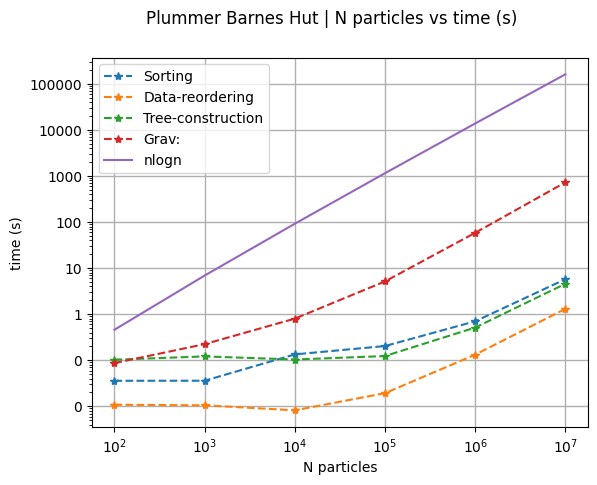

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

x = []
for n in n_pows:
    x.append(10**n)
print(x)

fig, ax = plt.subplots()
fig.suptitle('Plummer Barnes Hut | N particles vs time (s)', fontsize=12)
ax.set_xlabel("N particles")
ax.set_ylabel("time (s)")

ax.grid(linestyle='-', linewidth=1)
ax.set_yscale('log')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set_xscale('symlog')

for tokens in use_arrays:
    ax.plot(x, token_arrays[tokens],label=tokens, marker ='*',linestyle='dashed')

y = (x * np.log(x)) / 10**3
ax.plot(x, y,label="nlogn")

ax.legend(loc="upper left")
plt.show()


counter = 0
filename = plot_title + "_{}.png"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
plot_title_final = filename.format(counter)

fig.savefig(plot_title_final+".png")

plt.close()

## barnes_hut_vs_all_pairs

In [168]:
## Traverse plot all pairs vs barnes hut

plot_title = "RESULTS/plummer_barnes_hut_vs_all_pairs"
data_prefix='data/plummer_snap_mpi'
figure_prefix='fig/plummer'
bonsai_binary = "../Bonsai/build/bonsai2_slowdust" # after cmake tools build

# Bonsai config
step = 0.0625/1
T_ = 5

# Plot
dir_comp = False
p_size = 1
lim=5

n_pows = [4]
parse_list_bh = []
for i in range(20):
    nStars  = 10**n_pows[0]
    clear_data()
    bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
    parse_list_bh.append(bonsai.parse_save_log(outfile=None))
dir_comp = True

parse_list_ap = []
for i in range(20):
    nStars  = 10**n_pows[0]
    clear_data()
    bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
    parse_list_ap.append(bonsai.parse_save_log(outfile=None))

../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.144863 Threads/log: 0.00106192 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.19888e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00363 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01188 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02114 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02825 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03736 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04381 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00362 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01187 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02113 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02825 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03735 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.0438 sec
iter=7 : 

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.21091 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21936 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.22744 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.23672 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.24481 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.25346 sec
iter=30

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.2109 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21936 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.22743 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.23672 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.2448 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.25345 sec
iter=30 :

iter=47 : time= 2.9375  Etot= -0.2466689293  Ekin= 0.238342   Epot= -0.485011 : de= -8.56001e-06 ( 0.00010568 ) d(de)= 3.48439e-05 ( 4.47658e-05 ) t_sim=  1.41714 sec
iter=48 : time= 3  Etot= -0.2466628658  Ekin= 0.238505   Epot= -0.485167 : de= -3.31415e-05 ( 0.00010568 ) d(de)= -2.45817e-05 ( 4.47658e-05 ) t_sim=  1.42327 sec
iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.43314 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.44144 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.44982 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.45683 sec
iter=

iter=47 : time= 2.9375  Etot= -0.2466689293  Ekin= 0.238342   Epot= -0.485011 : de= -8.56001e-06 ( 0.00010568 ) d(de)= 3.48439e-05 ( 4.47658e-05 ) t_sim=  1.41713 sec
iter=48 : time= 3  Etot= -0.2466628658  Ekin= 0.238505   Epot= -0.485167 : de= -3.31415e-05 ( 0.00010568 ) d(de)= -2.45817e-05 ( 4.47658e-05 ) t_sim=  1.42327 sec
iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.43314 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.44143 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.44981 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.45682 sec
iter=

iter=71 : time= 4.4375  Etot= -0.2466653129  Ekin= 0.239161   Epot= -0.485826 : de= -2.32208e-05 ( 0.00010568 ) d(de)= 1.3944e-05 ( 5.62115e-05 ) t_sim=  1.61885 sec
iter=72 : time= 4.5  Etot= -0.2466633141  Ekin= 0.239003   Epot= -0.485666 : de= -3.13241e-05 ( 0.00010568 ) d(de)= -8.10353e-06 ( 5.62115e-05 ) t_sim=  1.62426 sec
iter=73 : time= 4.5625  Etot= -0.2466637416  Ekin= 0.23885   Epot= -0.485513 : de= -2.95909e-05 ( 0.00010568 ) d(de)= 1.7333e-06 ( 5.62115e-05 ) t_sim=  1.63242 sec
iter=74 : time= 4.625  Etot= -0.2466602159  Ekin= 0.238705   Epot= -0.485365 : de= -4.38842e-05 ( 0.00010568 ) d(de)= -1.42937e-05 ( 5.62115e-05 ) t_sim=  1.64088 sec
iter=75 : time= 4.6875  Etot= -0.2466604697  Ekin= 0.238569   Epot= -0.485229 : de= -4.28551e-05 ( 0.00010568 ) d(de)= 1.02911e-06 ( 5.62115e-05 ) t_sim=  1.65041 sec
iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.65667 sec
iter=

../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.133522 Threads/log: 0.000102043 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  4.05312e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00215 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0084 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01904 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02818 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03526 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04036 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00215 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0084 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01904 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02817 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03525 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04035 sec
iter=7 : 

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.20471 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21273 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.22002 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2268 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23648 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.24393 sec
iter=30 

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.20471 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21272 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.22001 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.22679 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23647 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.24393 sec
iter=30

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.40623 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41599 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42356 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43576 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44303 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45096 sec


iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41599 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42356 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43576 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44302 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45096 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.45628 sec
i

iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.61546 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62414 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.6337 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64144 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65091 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.65407 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62414 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.63369 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64143 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65091 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.65405 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.........

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.13174 Threads/log: 0.00108218 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.05991e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00203 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01056 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01959 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02646 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03395 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04275 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00202 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01055 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01959 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02645 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03394 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04274 sec
iter=7 :

iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.20581 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21528 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.22289 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23134 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23732 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2444 sec
iter

iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.2058 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21528 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.22288 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23133 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23732 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24439 sec
iter

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.41499 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.42199 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.4312 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43883 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44565 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45156 sec
i

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.41498 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.42198 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.43119 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43882 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44564 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45155 sec


iter=73 : time= 4.5625  Etot= -0.2466637416  Ekin= 0.23885   Epot= -0.485513 : de= -2.95909e-05 ( 0.00010568 ) d(de)= 1.7333e-06 ( 5.62115e-05 ) t_sim=  1.61769 sec
iter=74 : time= 4.625  Etot= -0.2466602159  Ekin= 0.238705   Epot= -0.485365 : de= -4.38842e-05 ( 0.00010568 ) d(de)= -1.42937e-05 ( 5.62115e-05 ) t_sim=  1.62575 sec
iter=75 : time= 4.6875  Etot= -0.2466604697  Ekin= 0.238569   Epot= -0.485229 : de= -4.28551e-05 ( 0.00010568 ) d(de)= 1.02911e-06 ( 5.62115e-05 ) t_sim=  1.63624 sec
iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.6442 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.65219 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.65947 sec
it

iter=73 : time= 4.5625  Etot= -0.2466637416  Ekin= 0.23885   Epot= -0.485513 : de= -2.95909e-05 ( 0.00010568 ) d(de)= 1.7333e-06 ( 5.62115e-05 ) t_sim=  1.61768 sec
iter=74 : time= 4.625  Etot= -0.2466602159  Ekin= 0.238705   Epot= -0.485365 : de= -4.38842e-05 ( 0.00010568 ) d(de)= -1.42937e-05 ( 5.62115e-05 ) t_sim=  1.62574 sec
iter=75 : time= 4.6875  Etot= -0.2466604697  Ekin= 0.238569   Epot= -0.485229 : de= -4.28551e-05 ( 0.00010568 ) d(de)= 1.02911e-06 ( 5.62115e-05 ) t_sim=  1.63623 sec
iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.6442 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.65218 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.65946 sec
it

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.135664 Threads/log: 0.000139952 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  7.15256e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  0.996622 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.005 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01353 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02103 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02889 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03702 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  0.996614 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.005 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01352 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02103 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02889 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03701 sec
iter=7 : 

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20225 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21251 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22114 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23083 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23743 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24697 sec
it

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20224 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2125 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22114 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23083 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23743 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24697 sec
ite

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41068 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41912 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42782 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43531 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44238 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.44979 sec
i

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41068 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41911 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42782 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.4353 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44237 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.44979 sec
it

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61613 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62673 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.6346 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64382 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64592 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61612 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62673 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63459 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64382 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64591 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.........

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.152182 Threads/log: 8.91685e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.0031 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00838 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01763 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02464 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03322 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04011 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00309 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00838 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01762 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02464 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03321 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.0401 sec
iter=7 : 

iter=23 : time= 1.4375  Etot= -0.2466458138  Ekin= 0.238815   Epot= -0.485461 : de= -0.00010227 ( 0.00010227 ) d(de)= -2.34196e-05 ( 2.85025e-05 ) t_sim=  1.20985 sec
iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.21669 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.22471 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.23345 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.24366 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.25094 sec
iter=2

iter=23 : time= 1.4375  Etot= -0.2466458138  Ekin= 0.238815   Epot= -0.485461 : de= -0.00010227 ( 0.00010227 ) d(de)= -2.34196e-05 ( 2.85025e-05 ) t_sim=  1.20985 sec
iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.21669 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.2247 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.23345 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.24365 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.25094 sec
iter=29

iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.4162 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42196 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42849 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43669 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44293 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.45035 sec
it

iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.62089 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62848 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.63611 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64171 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65205 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.65471 sec
../Bonsai/build/bons

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.136998 Threads/log: 0.000117064 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  8.10623e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00097 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00759 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01646 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02589 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03496 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04954 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00096 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00758 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01645 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02588 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03495 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04954 sec
iter=7 :

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.20408 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21128 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21827 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.22731 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23484 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.24247 sec
iter=30

iter=24 : time= 1.5  Etot= -0.246647983  Ekin= 0.238519   Epot= -0.485167 : de= -9.3476e-05 ( 0.00010227 ) d(de)= 8.79492e-06 ( 2.85025e-05 ) t_sim=  1.20408 sec
iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.21128 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21826 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2273 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.23484 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.24246 sec
iter=30 

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.4123 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41866 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42499 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43557 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44492 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45365 sec
i

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.41229 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41866 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42499 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43556 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44492 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45365 sec


iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.61449 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61959 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62454 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63306 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63991 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64622 sec


../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.137039 Threads/log: 0.000149012 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  5.96046e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  0.997436 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00502 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01325 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02117 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02902 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03548 sec
iter=7 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  0.997429 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00501 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01324 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02116 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02902 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03547 sec
iter=7 

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20311 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21232 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.21993 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.22881 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23834 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24721 sec
it

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20311 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21231 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.21992 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.2288 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23833 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.2472 sec
iter

iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.41071 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41819 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42954 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43686 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44578 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.46123 sec


iter=49 : time= 3.0625  Etot= -0.2466572906  Ekin= 0.238661   Epot= -0.485318 : de= -5.57432e-05 ( 0.00010568 ) d(de)= -2.26025e-05 ( 4.47658e-05 ) t_sim=  1.4107 sec
iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41818 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42953 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43685 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44578 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.46122 sec
i

iter=72 : time= 4.5  Etot= -0.2466633141  Ekin= 0.239003   Epot= -0.485666 : de= -3.13241e-05 ( 0.00010568 ) d(de)= -8.10353e-06 ( 5.62115e-05 ) t_sim=  1.61623 sec
iter=73 : time= 4.5625  Etot= -0.2466637416  Ekin= 0.23885   Epot= -0.485513 : de= -2.95909e-05 ( 0.00010568 ) d(de)= 1.7333e-06 ( 5.62115e-05 ) t_sim=  1.62468 sec
iter=74 : time= 4.625  Etot= -0.2466602159  Ekin= 0.238705   Epot= -0.485365 : de= -4.38842e-05 ( 0.00010568 ) d(de)= -1.42937e-05 ( 5.62115e-05 ) t_sim=  1.63167 sec
iter=75 : time= 4.6875  Etot= -0.2466604697  Ekin= 0.238569   Epot= -0.485229 : de= -4.28551e-05 ( 0.00010568 ) d(de)= 1.02911e-06 ( 5.62115e-05 ) t_sim=  1.63744 sec
iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.64531 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.65196 sec
ite

iter=72 : time= 4.5  Etot= -0.2466633141  Ekin= 0.239003   Epot= -0.485666 : de= -3.13241e-05 ( 0.00010568 ) d(de)= -8.10353e-06 ( 5.62115e-05 ) t_sim=  1.61623 sec
iter=73 : time= 4.5625  Etot= -0.2466637416  Ekin= 0.23885   Epot= -0.485513 : de= -2.95909e-05 ( 0.00010568 ) d(de)= 1.7333e-06 ( 5.62115e-05 ) t_sim=  1.62468 sec
iter=74 : time= 4.625  Etot= -0.2466602159  Ekin= 0.238705   Epot= -0.485365 : de= -4.38842e-05 ( 0.00010568 ) d(de)= -1.42937e-05 ( 5.62115e-05 ) t_sim=  1.63166 sec
iter=75 : time= 4.6875  Etot= -0.2466604697  Ekin= 0.238569   Epot= -0.485229 : de= -4.28551e-05 ( 0.00010568 ) d(de)= 1.02911e-06 ( 5.62115e-05 ) t_sim=  1.63743 sec
iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.6453 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.65196 sec
iter

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.140953 Threads/log: 0.00106096 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  7.86781e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00223 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0088 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01491 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02367 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.0326 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04008 sec
iter=7 : t

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00222 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00879 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01491 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02366 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03259 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04007 sec
iter=7 :

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.2056 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21314 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22452 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23243 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24189 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25085 sec
ite

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.2056 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21313 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22451 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23242 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24188 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25085 sec
ite

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.4148 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41984 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42984 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.4375 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44599 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45216 sec
ite

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.4148 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41983 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42983 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43749 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44599 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45215 sec
it

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.6227 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.63411 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.6415 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65173 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.65494 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62269 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.6341 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64149 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65173 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.65492 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
..........

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.135289 Threads/log: 0.00128007 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00323 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01112 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01827 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02427 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.0311 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03898 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00323 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01111 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01826 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02427 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03109 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03897 sec
iter=7 :

iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21266 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.22237 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.23294 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24035 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25004 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.25738 sec
iter=35 

iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21265 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.22236 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.23294 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24034 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25003 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.25738 sec
iter=35 

iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.42181 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43097 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.43741 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.44493 sec
iter=59 : time= 3.6875  Etot= -0.2466638028  Ekin= 0.240204   Epot= -0.486867 : de= -2.93429e-05 ( 0.00010568 ) d(de)= 5.1179e-06 ( 4.47658e-05 ) t_sim=  1.45468 sec
iter=60 : time= 3.75  Etot= -0.2466776681  Ekin= 0.240286   Epot= -0.486963 : de= 2.68669e-05 ( 0.00010568 ) d(de)= 5.62115e-05 ( 5.62115e-05 ) t_sim=  1.46419 sec
iter=

iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.4218 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43096 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.4374 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.44492 sec
iter=59 : time= 3.6875  Etot= -0.2466638028  Ekin= 0.240204   Epot= -0.486867 : de= -2.93429e-05 ( 0.00010568 ) d(de)= 5.1179e-06 ( 4.47658e-05 ) t_sim=  1.45467 sec
iter=60 : time= 3.75  Etot= -0.2466776681  Ekin= 0.240286   Epot= -0.486963 : de= 2.68669e-05 ( 0.00010568 ) d(de)= 5.62115e-05 ( 5.62115e-05 ) t_sim=  1.46419 sec
iter=61

iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.62973 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63262 sec


iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.62972 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63261 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.143962 Threads/log: 0.000568867 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00346 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00841 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01353 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02102 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02712 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03497 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00345 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0084 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01353 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02101 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.02711 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03496 sec
iter=7 : 

iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.20938 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21793 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2267 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.2351 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24304 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25116 sec
iter=34 : t

iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.20938 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21792 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.22669 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.23509 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24303 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25115 sec
iter=34 :

iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.41437 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.4219 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43079 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43919 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44603 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.45432 sec
i

iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.41436 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.42189 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43079 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43918 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44602 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.45431 sec


iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62089 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62787 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63676 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63893 sec


iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62088 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62787 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63676 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63892 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.144042 Threads/log: 0.00115395 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  1.00136e-05 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00347 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0117 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01994 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02823 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03715 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.045 sec
iter=7 : ti

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00347 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0117 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01994 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02822 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03715 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.045 sec
iter=7 : ti

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20529 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21244 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22347 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.2313 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2385 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25003 sec
iter

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41094 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.4202 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42797 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.4396 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.4471 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.4538 sec
iter=

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61701 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62493 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63448 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64082 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64338 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.617 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62493 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63447 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64081 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64337 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
...........

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.134853 Threads/log: 0.00117302 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  7.15256e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec
iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00209 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00768 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01379 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02233 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03045 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.24596

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.0021 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00769 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.0138 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02233 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03046 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04081 sec
iter=7 : t

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20884 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2174 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22678 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23477 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24311 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25008 sec
ite

iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41341 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42151 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43114 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43931 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.44673 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.454 sec
ite

iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.4134 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.4215 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43113 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43931 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.44673 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.454 sec
iter=

iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62097 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62913 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63945 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64237 sec


iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62096 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62912 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63944 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64235 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.133399 Threads/log: 0.00118089 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  1.78814e-05 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00604 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01374 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02274 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.03034 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.04032 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04825 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00603 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01374 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02274 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.03033 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.04031 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04824 sec
iter=7 :

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21025 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21763 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22578 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23252 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2425 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24809 sec
ite

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21024 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21763 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22577 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23251 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.2425 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24808 sec
ite

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41718 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42565 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43357 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44123 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44789 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45642 sec
i

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41718 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42565 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43356 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44122 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44789 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45641 sec
i

iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.62496 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.63199 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.64261 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64907 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65769 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.66047 sec


iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.62496 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.63198 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.6426 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.64906 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.65768 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.66046 sec
../Bonsai/build/bonsa

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.133005 Threads/log: 0.00116801 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.91414e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  9.53674e-07 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00602 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01386 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02186 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02756 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03454 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04267 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00601 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01385 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02185 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02756 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03454 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04267 sec
iter=7 :

iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21022 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22207 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.22916 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23834 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24593 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.2555 sec
iter=33 : t

iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21021 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22207 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.22916 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23833 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24593 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.25549 sec
iter=33 : 

iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.41688 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.42413 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43018 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.4357 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44152 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.45046 sec
i

iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.41688 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.42412 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43018 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43569 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44152 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.45045 sec


iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62322 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63212 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63496 sec


iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62321 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63211 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63495 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.134593 Threads/log: 0.000730038 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  4.05312e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00295 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.0134 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.0192 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02584 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03263 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03999 sec
iter=7 : t

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00294 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01339 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01919 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02583 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03263 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03999 sec
iter=7 :

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21275 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2207 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22926 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23744 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24574 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25406 sec
ite

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21274 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.2207 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22925 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23743 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24573 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.25405 sec
ite

iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.42207 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.43079 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.43701 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44385 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45226 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.46178 sec
i

iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.42206 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.43078 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.437 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.44384 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.45225 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.46177 sec
ite

iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.63129 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.63858 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.64726 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.65428 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.66373 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.6668 sec


iter=76 : time= 4.75  Etot= -0.2466629372  Ekin= 0.238439   Epot= -0.485101 : de= -3.28521e-05 ( 0.00010568 ) d(de)= 1.00034e-05 ( 5.62115e-05 ) t_sim=  1.63128 sec
iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.63857 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.64726 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.65426 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.66372 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.66678 sec
../Bonsai/build/bons

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.137124 Threads/log: 0.00113988 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  4.05312e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00353 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01288 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02267 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.0307 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03783 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04555 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00353 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01287 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.02266 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.03069 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03782 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04554 sec
iter=7 :

iter=25 : time= 1.5625  Etot= -0.2466500264  Ekin= 0.238229   Epot= -0.484879 : de= -8.5192e-05 ( 0.00010227 ) d(de)= 8.28477e-06 ( 2.85025e-05 ) t_sim=  1.2046 sec
iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21184 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21968 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22941 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.2354 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24274 sec
iter=

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21184 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21967 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.2294 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23539 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.24273 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.2517 sec
iter

iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41354 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42008 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42603 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43467 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44205 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44991 sec
i

iter=50 : time= 3.125  Etot= -0.2466642182  Ekin= 0.238813   Epot= -0.485478 : de= -2.76588e-05 ( 0.00010568 ) d(de)= 2.8086e-05 ( 4.47658e-05 ) t_sim=  1.41354 sec
iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.42008 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42602 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43466 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44204 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.4499 sec
it

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61941 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62729 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63571 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64421 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64715 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.6194 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62728 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.6357 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.6442 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64713 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
............

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.137286 Threads/log: 0.00118303 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  6.19888e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00049 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00783 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01647 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02372 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03071 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03721 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00048 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.00782 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01647 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02372 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.0307 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.0372 sec
iter=7 : t

iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.20723 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.21413 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.22131 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.22784 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.23303 sec
iter=35 : time= 2.1875  Etot= -0.2466473069  Ekin= 0.236521   Epot= -0.483169 : de= -9.62171e-05 ( 0.00010568 ) d(de)= 9.46342e-06 ( 2.85025e-05 ) t_sim=  1.23827 sec
iter=36

iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.20722 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.21412 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.22131 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.22784 sec
iter=34 : time= 2.125  Etot= -0.2466449728  Ekin= 0.236554   Epot= -0.483199 : de= -0.00010568 ( 0.00010568 ) d(de)= -1.49152e-05 ( 2.85025e-05 ) t_sim=  1.23302 sec
iter=35 : time= 2.1875  Etot= -0.2466473069  Ekin= 0.236521   Epot= -0.483169 : de= -9.62171e-05 ( 0.00010568 ) d(de)= 9.46342e-06 ( 2.85025e-05 ) t_sim=  1.23827 sec
iter=36

iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.41267 sec
iter=59 : time= 3.6875  Etot= -0.2466638028  Ekin= 0.240204   Epot= -0.486867 : de= -2.93429e-05 ( 0.00010568 ) d(de)= 5.1179e-06 ( 4.47658e-05 ) t_sim=  1.42175 sec
iter=60 : time= 3.75  Etot= -0.2466776681  Ekin= 0.240286   Epot= -0.486963 : de= 2.68669e-05 ( 0.00010568 ) d(de)= 5.62115e-05 ( 5.62115e-05 ) t_sim=  1.4284 sec
iter=61 : time= 3.8125  Etot= -0.2466751661  Ekin= 0.240321   Epot= -0.486996 : de= 1.67236e-05 ( 0.00010568 ) d(de)= -1.0143e-05 ( 5.62115e-05 ) t_sim=  1.43534 sec
iter=62 : time= 3.875  Etot= -0.2466679855  Ekin= 0.240308   Epot= -0.486976 : de= -1.23861e-05 ( 0.00010568 ) d(de)= -2.91092e-05 ( 5.62115e-05 ) t_sim=  1.44207 sec
iter=63 : time= 3.9375  Etot= -0.2466660538  Ekin= 0.240257   Epot= -0.486923 : de= -2.02172e-05 ( 0.00010568 ) d(de)= -7.83123e-06 ( 5.62115e-05 ) t_sim=  1.45156 sec
iter

iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.41266 sec
iter=59 : time= 3.6875  Etot= -0.2466638028  Ekin= 0.240204   Epot= -0.486867 : de= -2.93429e-05 ( 0.00010568 ) d(de)= 5.1179e-06 ( 4.47658e-05 ) t_sim=  1.42174 sec
iter=60 : time= 3.75  Etot= -0.2466776681  Ekin= 0.240286   Epot= -0.486963 : de= 2.68669e-05 ( 0.00010568 ) d(de)= 5.62115e-05 ( 5.62115e-05 ) t_sim=  1.42839 sec
iter=61 : time= 3.8125  Etot= -0.2466751661  Ekin= 0.240321   Epot= -0.486996 : de= 1.67236e-05 ( 0.00010568 ) d(de)= -1.0143e-05 ( 5.62115e-05 ) t_sim=  1.43533 sec
iter=62 : time= 3.875  Etot= -0.2466679855  Ekin= 0.240308   Epot= -0.486976 : de= -1.23861e-05 ( 0.00010568 ) d(de)= -2.91092e-05 ( 5.62115e-05 ) t_sim=  1.44207 sec
iter=63 : time= 3.9375  Etot= -0.2466660538  Ekin= 0.240257   Epot= -0.486923 : de= -2.02172e-05 ( 0.00010568 ) d(de)= -7.83123e-06 ( 5.62115e-05 ) t_sim=  1.45155 sec
ite

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.126619 Threads/log: 8.60691e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  5.00679e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00178 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01012 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.0188 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02537 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03477 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04253 sec
iter=7 : 

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00177 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01011 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01879 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02536 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03477 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04252 sec
iter=7 :

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20626 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21292 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.21981 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.22602 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23215 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.23801 sec
it

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.20626 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21292 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.21981 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.22602 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23214 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.238 sec
iter

iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.40904 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.41644 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.42476 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43316 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44001 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.44845 sec


iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.40903 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.41643 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.42475 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.43315 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.44 sec
iter=58 : time= 3.625  Etot= -0.2466625404  Ekin= 0.240093   Epot= -0.486756 : de= -3.44606e-05 ( 0.00010568 ) d(de)= 6.35646e-06 ( 4.47658e-05 ) t_sim=  1.44844 sec
ite

iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.6155 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.6238 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63347 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.63671 sec


iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.61549 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.62379 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.63347 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.6367 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.12995 Threads/log: 0.00117397 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  5.00679e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  1.19209e-06 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00272 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01014 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01785 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02461 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03201 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03864 sec
iter=7 :

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00271 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01014 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01785 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.02461 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.032 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.03863 sec
iter=7 : t

iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.20549 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21396 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.22486 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.2329 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24287 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25198 sec
iter=34 : 

iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.20548 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.21395 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.22485 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.23289 sec
iter=32 : time= 2  Etot= -0.2466521983  Ekin= 0.23671   Epot= -0.483362 : de= -7.63873e-05 ( 0.00010227 ) d(de)= -1.45e-05 ( 2.85025e-05 ) t_sim=  1.24286 sec
iter=33 : time= 2.0625  Etot= -0.2466486516  Ekin= 0.236616   Epot= -0.483265 : de= -9.07656e-05 ( 0.00010227 ) d(de)= -1.43794e-05 ( 2.85025e-05 ) t_sim=  1.25197 sec
iter=34 :

iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41356 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.42471 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43225 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43853 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.44481 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.45354 sec
i

iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.41355 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.4247 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.43224 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.43853 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.4448 sec
iter=57 : time= 3.5625  Etot= -0.2466609725  Ekin= 0.239948   Epot= -0.486609 : de= -4.08168e-05 ( 0.00010568 ) d(de)= 1.93445e-05 ( 4.47658e-05 ) t_sim=  1.45353 sec
ite

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62209 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62867 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63694 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64413 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.647 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.62208 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62866 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63693 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64413 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64698 sec
../Bonsai/build/bonsai2_slowdust   --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.........

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is DISABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.136585 Threads/log: 9.10759e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  5.96046e-06 sec



iter=0 : time= 0  Etot= -0.2466710408  Ekin= 0.247408   Epot= -0.494079 : de= -0 ( 0 ) d(de)= -0 ( 0 ) t_sim=  0 sec


iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00533 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01193 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01957 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.0282 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03834 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.0467 sec
iter=7 : t

iter=1 : time= 0.0625  Etot= -0.246671593  Ekin= 0.247378   Epot= -0.49405 : de= 2.2386e-06 ( 2.2386e-06 ) d(de)= 2.2386e-06 ( 2.2386e-06 ) t_sim=  1.00532 sec
iter=2 : time= 0.125  Etot= -0.2466677645  Ekin= 0.247254   Epot= -0.493922 : de= -1.3282e-05 ( 1.3282e-05 ) d(de)= -1.55206e-05 ( 1.55206e-05 ) t_sim=  1.01193 sec
iter=3 : time= 0.1875  Etot= -0.2466657762  Ekin= 0.247039   Epot= -0.493704 : de= -2.13425e-05 ( 2.13425e-05 ) d(de)= -8.06062e-06 ( 1.55206e-05 ) t_sim=  1.01957 sec
iter=4 : time= 0.25  Etot= -0.2466664662  Ekin= 0.246736   Epot= -0.493403 : de= -1.85456e-05 ( 2.13425e-05 ) d(de)= 2.79702e-06 ( 1.55206e-05 ) t_sim=  1.0282 sec
iter=5 : time= 0.3125  Etot= -0.2466641199  Ekin= 0.246367   Epot= -0.493031 : de= -2.80572e-05 ( 2.80572e-05 ) d(de)= -9.51177e-06 ( 1.55206e-05 ) t_sim=  1.03833 sec
iter=6 : time= 0.375  Etot= -0.2466641837  Ekin= 0.245967   Epot= -0.492631 : de= -2.77989e-05 ( 2.80572e-05 ) d(de)= 2.58269e-07 ( 1.55206e-05 ) t_sim=  1.04669 sec
iter=7 : 

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21018 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21674 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22649 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23235 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23955 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.2459 sec
ite

iter=26 : time= 1.625  Etot= -0.2466479911  Ekin= 0.237947   Epot= -0.484595 : de= -9.34431e-05 ( 0.00010227 ) d(de)= -8.25183e-06 ( 2.85025e-05 ) t_sim=  1.21017 sec
iter=27 : time= 1.6875  Etot= -0.2466488113  Ekin= 0.237685   Epot= -0.484334 : de= -9.01183e-05 ( 0.00010227 ) d(de)= 3.32516e-06 ( 2.85025e-05 ) t_sim=  1.21674 sec
iter=28 : time= 1.75  Etot= -0.2466523685  Ekin= 0.237439   Epot= -0.484091 : de= -7.56972e-05 ( 0.00010227 ) d(de)= 1.44224e-05 ( 2.85025e-05 ) t_sim=  1.22648 sec
iter=29 : time= 1.8125  Etot= -0.2466529427  Ekin= 0.23721   Epot= -0.483863 : de= -7.33695e-05 ( 0.00010227 ) d(de)= 2.32784e-06 ( 2.85025e-05 ) t_sim=  1.23234 sec
iter=30 : time= 1.875  Etot= -0.2466582192  Ekin= 0.237006   Epot= -0.483664 : de= -5.19788e-05 ( 0.00010227 ) d(de)= 2.13923e-05 ( 2.85025e-05 ) t_sim=  1.23955 sec
iter=31 : time= 1.9375  Etot= -0.2466557748  Ekin= 0.23684   Epot= -0.483496 : de= -6.18882e-05 ( 0.00010227 ) d(de)= -9.90987e-06 ( 2.85025e-05 ) t_sim=  1.24589 sec
it

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41427 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42383 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43084 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44073 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44727 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45407 sec
i

iter=51 : time= 3.1875  Etot= -0.2466609549  Ekin= 0.238959   Epot= -0.48562 : de= -4.08882e-05 ( 0.00010568 ) d(de)= -1.32298e-05 ( 4.47658e-05 ) t_sim=  1.41426 sec
iter=52 : time= 3.25  Etot= -0.2466666154  Ekin= 0.239108   Epot= -0.485775 : de= -1.79408e-05 ( 0.00010568 ) d(de)= 2.29483e-05 ( 4.47658e-05 ) t_sim=  1.42382 sec
iter=53 : time= 3.3125  Etot= -0.2466593334  Ekin= 0.239278   Epot= -0.485937 : de= -4.74617e-05 ( 0.00010568 ) d(de)= -2.95215e-05 ( 4.47658e-05 ) t_sim=  1.43083 sec
iter=54 : time= 3.375  Etot= -0.2466550158  Ekin= 0.239449   Epot= -0.486104 : de= -6.49653e-05 ( 0.00010568 ) d(de)= -1.75044e-05 ( 4.47658e-05 ) t_sim=  1.44072 sec
iter=55 : time= 3.4375  Etot= -0.2466629615  Ekin= 0.239615   Epot= -0.486278 : de= -3.27533e-05 ( 0.00010568 ) d(de)= 3.22141e-05 ( 4.47658e-05 ) t_sim=  1.44727 sec
iter=56 : time= 3.5  Etot= -0.2466562011  Ekin= 0.239783   Epot= -0.486439 : de= -6.01601e-05 ( 0.00010568 ) d(de)= -2.74077e-05 ( 4.47658e-05 ) t_sim=  1.45406 sec
i

iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61694 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62649 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63491 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64251 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64555 sec


iter=77 : time= 4.8125  Etot= -0.2466579707  Ekin= 0.238316   Epot= -0.484974 : de= -5.29861e-05 ( 0.00010568 ) d(de)= -2.01347e-05 ( 5.62115e-05 ) t_sim=  1.61693 sec
iter=78 : time= 4.875  Etot= -0.2466577084  Ekin= 0.238224   Epot= -0.484881 : de= -5.40493e-05 ( 0.00010568 ) d(de)= -1.06323e-06 ( 5.62115e-05 ) t_sim=  1.62649 sec
iter=79 : time= 4.9375  Etot= -0.2466580536  Ekin= 0.238166   Epot= -0.484824 : de= -5.265e-05 ( 0.00010568 ) d(de)= 1.39933e-06 ( 5.62115e-05 ) t_sim=  1.63491 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= 4.85221e-06 ( 5.62115e-05 ) t_sim=  1.64251 sec
iter=80 : time= 5  Etot= -0.2466592504  Ekin= 0.238124   Epot= -0.484783 : de= -4.77981e-05 ( 0.00010568 ) d(de)= -0 ( 5.62115e-05 ) t_sim=  1.64554 sec
../Bonsai/build/bonsai2_slowdust  --direct --plummer 10000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 10000 per process 
.

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.133274 Threads/log: 7.98702e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  6.91414e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00053 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00052 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00413 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00782 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0114 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01421 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01897 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20236 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20694 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21026 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21286 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21559 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.219 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22453 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

de)= 0 ( 0 ) t_sim=  1.24099 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2445 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24774 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25173 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25745 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26182 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26621 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27053 sec
DONE??iter=69 : time= 4.3125  Etot= 0.2

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.146515 Threads/log: 0.000133991 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  3.8147e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00148 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00147 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00456 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00865 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0114 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01401 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01719 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20392 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20904 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21355 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21639 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21936 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22295 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22721 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

de)= 0 ( 0 ) t_sim=  1.24508 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24912 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25287 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25738 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26184 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26625 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27037 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27538 sec
DONE??iter=69 : time= 4.3125  Etot= 0.

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.127155 Threads/log: 9.29832e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.15256e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00102 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00102 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00514 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00934 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01311 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01707 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02062 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20589 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21096 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21636 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21988 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22277 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22592 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22905 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

) d(de)= 0 ( 0 ) t_sim=  1.24987 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25413 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25778 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26142 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26617 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27195 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27672 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28225 sec
DONE??iter=69 : time= 4.3125  Etot

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.161018 Threads/log: 0.00101614 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.15256e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00124 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00124 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00563 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01073 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01465 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01856 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02288 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20209 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20676 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21059 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21426 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21778 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22267 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22683 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

d(de)= 0 ( 0 ) t_sim=  1.25241 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25698 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.261 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26598 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26996 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27449 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27875 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28248 sec
DONE??iter=69 : time= 4.3125  Etot= 0.

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.135131 Threads/log: 0.000196934 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  6.91414e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00009 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00008 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01013 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01478 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01823 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02225 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02584 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20584 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20892 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21369 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21701 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22026 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22475 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22967 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

0 ) t_sim=  1.25584 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26166 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26886 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27262 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27824 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28281 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28688 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29186 sec
DONE??iter=69 : time= 4.3125  Etot= 0.247412177

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.131036 Threads/log: 0.000710011 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  3.8147e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00161 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0016 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00587 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00985 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01369 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01804 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0226 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 :

iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20471 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2093 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21343 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21717 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22084 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22536 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22904 sec
iter=59 : time= 3.6875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_si

0 ( 0 ) t_sim=  1.24288 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24795 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25242 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25752 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26219 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26646 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26994 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2737 sec
DONE??iter=69 : time= 4.3125  Etot= 0.247412

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.127332 Threads/log: 0.000124931 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.15256e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00049 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.19209e-06 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00049 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00503 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00865 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01276 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0171 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02078 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20493 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20867 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21218 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21737 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22157 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22586 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22985 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24734 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25618 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26001 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26422 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26829 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27226 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27619 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28035 sec
DONE??iter=69 : time= 4.3125  

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.15675 Threads/log: 0.00107789 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.86781e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0021 sec
iter


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0021 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00713 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01183 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.016 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01946 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02225 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : 

iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20603 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21029 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21602 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21967 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22435 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22757 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23201 sec
iter=59 : time= 3.6875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

 0 ( 0 ) t_sim=  1.24521 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24925 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25301 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25747 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26079 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2647 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2695 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27475 sec
DONE??iter=69 : time= 4.3125  Etot= 0.247412

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.135885 Threads/log: 9.20296e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.15256e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00111 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00111 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0039 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00662 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01131 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01678 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02104 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20424 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20806 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21289 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21834 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22457 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22947 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2342 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_si

(de)= 0 ( 0 ) t_sim=  1.2484 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25215 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25548 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25899 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26334 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26835 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27262 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2766 sec
DONE??iter=69 : time= 4.3125  Etot= 0.2

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.122619 Threads/log: 9.5129e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.10623e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0013 sec
ite


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0013 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00462 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00814 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01203 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01641 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02027 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20281 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20754 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2122 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21677 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22118 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22598 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23088 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_si

 0 ( 0 ) t_sim=  1.24599 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25025 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25408 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2581 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26172 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26572 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27002 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27461 sec
DONE??iter=69 : time= 4.3125  Etot= 0.24741

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.125987 Threads/log: 0.000177145 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00055 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00054 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00435 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.009 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01386 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0182 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02216 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : 

iter=45 : time= 2.8125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20607 sec
iter=46 : time= 2.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21037 sec
iter=47 : time= 2.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21497 sec
iter=48 : time= 3  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21891 sec
iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22329 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22794 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23179 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

 0 ( 0 ) t_sim=  1.2813 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28529 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28971 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29403 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29933 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30454 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30888 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31495 sec
DONE??iter=69 : time= 4.3125  Etot= 0.24741

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.126482 Threads/log: 8.51154e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.96046e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00165 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00165 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00594 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01014 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01366 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01765 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02188 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20463 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20891 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21268 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21806 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22181 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22618 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23094 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

= 0 ( 0 ) t_sim=  1.2517 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25541 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25949 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26588 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26877 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27161 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27558 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27961 sec
DONE??iter=69 : time= 4.3125  Etot= 0.2474

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.140425 Threads/log: 0.00110388 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.96046e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00124 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00124 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00449 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00875 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01309 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01693 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02119 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20498 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20906 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21498 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21897 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2227 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22733 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2315 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

e)= 0 ( 0 ) t_sim=  1.25138 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25442 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25896 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26315 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26691 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26981 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27441 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27899 sec
DONE??iter=69 : time= 4.3125  Etot= 0.2

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.145922 Threads/log: 0.00101709 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0008 sec
ite


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00079 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00478 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00809 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01202 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01509 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01776 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20288 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2069 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21062 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21417 sec
iter=59 : time= 3.6875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21745 sec
iter=60 : time= 3.75  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22099 sec
iter=61 : time= 3.8125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22478 sec
iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_si

 0 ( 0 ) t_sim=  1.22477 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2293 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23391 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23845 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24268 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2489 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25241 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25585 sec
DONE??iter=69 : time= 4.3125  Etot= 0.247412

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.132802 Threads/log: 0.000108957 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  7.15256e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00069 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.19209e-06 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00068 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00444 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00846 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01482 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01797 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02131 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4

iter=48 : time= 3  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20362 sec
iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20696 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2099 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21393 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21839 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22272 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22628 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=

( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25637 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2604 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26474 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26997 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27421 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27752 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28097 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28714 sec
DONE??iter=69 : time= 4.3125  E

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.140689 Threads/log: 0.00163007 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00099 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00099 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00492 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00982 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01392 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01714 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02349 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20426 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20935 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21394 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21803 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22325 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22713 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23061 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

d(de)= 0 ( 0 ) t_sim=  1.24756 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25158 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25615 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26127 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26518 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26872 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27269 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27783 sec
DONE??iter=69 : time= 4.3125  Etot= 

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.146898 Threads/log: 0.000602007 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00234 sec
i


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00233 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00742 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0113 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01402 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.017 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01984 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : 

iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20646 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21126 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21431 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21746 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22092 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22481 sec
iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2291 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_si

 0 ( 0 ) t_sim=  1.24492 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24887 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25264 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.25643 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26104 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26526 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26923 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.27314 sec
DONE??iter=69 : time= 4.3125  Etot= 0.2474

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.158467 Threads/log: 0.0010922 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21593e-05 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0.999891 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.19209e-06 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0.999886 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00404 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0077 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01186 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01694 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02056 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4

iter=57 : time= 3.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20461 sec
iter=58 : time= 3.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20855 sec
iter=59 : time= 3.6875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21245 sec
iter=60 : time= 3.75  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21737 sec
iter=61 : time= 3.8125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22146 sec
iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22521 sec
iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22885 sec
iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

) d(de)= 0 ( 0 ) t_sim=  1.22145 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22521 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22884 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2332 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23719 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24104 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24414 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24789 sec
DONE??iter=69 : time= 4.3125  Etot=

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.139044 Threads/log: 0.000121117 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.0011 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00109 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00477 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00751 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01085 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01591 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01987 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=47 : time= 2.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20539 sec
iter=48 : time= 3  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20936 sec
iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2132 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21836 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2231 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.2276 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23294 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  

de)= 0 ( 0 ) t_sim=  1.27576 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28254 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.28673 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29162 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29561 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30046 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30521 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31119 sec
DONE??iter=69 : time= 4.3125  Etot= 0.

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.144206 Threads/log: 0.00125599 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.96046e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00266 sec
it


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00265 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00762 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01239 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01499 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01758 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02094 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06

iter=49 : time= 3.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20653 sec
iter=50 : time= 3.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21385 sec
iter=51 : time= 3.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22024 sec
iter=52 : time= 3.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22539 sec
iter=53 : time= 3.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23252 sec
iter=54 : time= 3.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23775 sec
iter=55 : time= 3.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.24364 sec
iter=56 : time= 3.5  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_s

d(de)= 0 ( 0 ) t_sim=  1.28113 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29365 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29962 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30512 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31189 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31629 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.32083 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.32514 sec
DONE??iter=69 : time= 4.3125  Etot= 

In [169]:
token_arrays_bh = {}
for token in parse_list_bh[0]:
    token_arrays_bh[token] = []
    for parseds in parse_list_bh:
        token_arrays_bh[token].append(parseds[token])

token_arrays_ap = {}
for token in parse_list_ap[0]:
    token_arrays_ap[token] = []
    for parseds in parse_list_ap:
        token_arrays_ap[token].append(parseds[token])

counter = 0
filename = plot_title + "_{}.json"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
data_title_final = filename.format(counter)

import json

outfile = open(data_title_final + ".json","w+")
outfile.write(json.dumps({"token_arrays_bh":token_arrays_bh,"token_arrays_ap":token_arrays_ap}, indent=4))
outfile.close()

In [170]:
transverse_bh = token_arrays_bh['Grav:']
transverse_ap = token_arrays_ap['Direct_gravity']

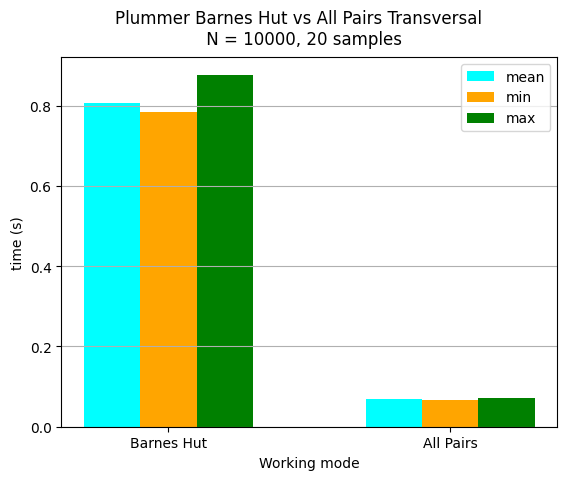

In [186]:
%matplotlib inline
# importing package
import matplotlib.pyplot as plt
import numpy as np
# create data
fig, ax = plt.subplots()
ax.grid(axis='y')
x = np.arange(2)
y1 = [np.mean(transverse_bh), np.mean(transverse_ap)]
y2 = [np.min(transverse_bh), np.min(transverse_ap)]
y3 = [np.max(transverse_bh), np.max(transverse_ap)]
width = 0.2
fig.suptitle(f'Plummer Barnes Hut vs All Pairs Transversal \n N = {10**n_pows[0]}, 20 samples', fontsize=12)
# plot data in grouped manner of bar type
ax.bar(x-0.2, y1, width, color='cyan')
ax.bar(x, y2, width, color='orange')
ax.bar(x+0.2, y3, width, color='green')
ax.set_xticks(x, ['Barnes Hut', 'All Pairs'])
ax.set_xlabel("Working mode")
ax.set_ylabel("time (s)")
ax.legend(["mean", "min", "max"])
plt.show()

counter = 0
filename = plot_title + "_{}.png"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
plot_title_final = filename.format(counter)

fig.savefig(plot_title_final+".png")
plt.close()

In [120]:
parse_list_bh

[{'Sorting': 0.169527226,
  'Data-reordering': 0.009475552000000003,
  'Predict': 0.010775552000000004,
  'Direct_gravity': 0,
  'Tree-construction': 0.12329236600000001,
  'setActiveGrpsFunc': 0.00011203199999999996,
  'Memory': 0.0002717439999999998,
  'Grav:': 0.8847696220000001,
  'Build:': 5.521565280000002,
  'tPredCor:': 0.728100114,
  'Correct': 0.010865824000000003,
  'Energy': 0.009005055999999999,
  'TOTAL:': 11.928572670000001}]

# Plummer, All Pairs Bonsai

## 65000 Stars

In [4]:
''' 
settings
'''

# Directories
sim_title =  "RESULTS/65000_plummer_all_pairs"
data_prefix='data/plummer_snap_mpi'
figure_prefix='fig/plummer'
bonsai_binary = "../Bonsai/build/bonsai2_slowdust" # after cmake tools build

# Bonsai config
step = 0.0625/1
nStars = 650000 # when we run MPI this is number of stars per process
T_ = 0.1250

# Plot
dir_comp = True
p_size = 1
lim=5
nRed=int(nStars/2)

''' 
run and save
'''

clear_data()
bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
bonsai.parse_save_log(outfile=sim_title)
tipsy.read_tipsy(data_prefix,figure_prefix, pointsize = p_size,lim=lim,nRed=nRed)
tipsy.make_mp4(figure_prefix, sim_title)

../Bonsai/build/bonsai2_slowdust  --direct --plummer 650000 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 0.125 -dt 0.0625 --eps 0.05


 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		0.125
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 


Using Plummer model with n= 650000 per process 
.................................................................

Proc: 0 Bootup times: Tree/MPI: 4.80128 Threads/log: 8.39233e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.05991e-06 sec
iter=1 : time= 0.0625  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.06384 sec
iter=2 : time= 0.125  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.15002 sec
iter=2 : time= 0.125  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.28029 sec



iter=0 : time= 0  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.53674e-07 sec
iter=1 : time= 0.0625  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.06383 sec
iter=2 : time= 0.125  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.15001 sec
iter=2 : time= 0.125  Etot= 0.2500878182  Ekin= 0.250088   Epot= 1.45472e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.28028 sec
data/plummer_snap_mpi_00000.0625-0  and  data/plummer_snap_mpi_00000.1250-0
data/plummer_snap_mpi_00000.0000-0  and  data/plummer_snap_mpi_00000.0625-0


2023-06-22 03:12:44,481	INFO worker.py:1636 -- Started a local Ray instance.


All tasks created!
(read_and_plot pid=2590284) Loading Header (data/plummer_snap_mpi_00000.0625-0)... time:0.062500, nTot:650000, nStar:650000
(read_and_plot pid=2590284) PRINTING REDS 325000
Tasks finished!


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Saved: RESULTS/65000_plummer_all_pairs_0.mp4


frame=    3 fps=0.0 q=-1.0 Lsize=     573kB time=00:00:00.00 bitrate=47908000.0kbits/s speed=0.000333x    
video:572kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.156155%
[libx264 @ 0x55d3a11cf7c0] frame I:1     Avg QP:11.55  size:584411
[libx264 @ 0x55d3a11cf7c0] frame P:1     Avg QP:22.50  size:   482
[libx264 @ 0x55d3a11cf7c0] frame B:1     Avg QP:22.50  size:   360
[libx264 @ 0x55d3a11cf7c0] consecutive B-frames: 33.3% 66.7%  0.0%  0.0%
[libx264 @ 0x55d3a11cf7c0] mb I  I16..4: 14.3% 14.9% 70.8%
[libx264 @ 0x55d3a11cf7c0] mb P  I16..4:  0.0%  0.0%  0.1%  P16..4:  0.2%  0.0%  0.0%  0.0%  0.0%    skip:99.7%
[libx264 @ 0x55d3a11cf7c0] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  0.3%  0.0%  0.1%  direct: 0.0%  skip:99.7%  L0:41.7% L1:52.1% BI: 6.2%
[libx264 @ 0x55d3a11cf7c0] final ratefactor: 18.86
[libx264 @ 0x55d3a11cf7c0] 8x8 transform intra:14.9% inter:18.2%
[libx264 @ 0x55d3a11cf7c0] coded y,u,v intra: 59.0% 55.4% 54.6% inter: 0.1% 0.0% 0.0%
[libx26

## N stars vs Time

In [192]:
## Scaling for different n sizes!

plot_title = "RESULTS/plummer_all_pairs_n_vs_time"
data_prefix='data/plummer_snap_mpi'
figure_prefix='fig/plummer'
bonsai_binary = "../Bonsai/build/bonsai2_slowdust" # after cmake tools build

# Bonsai config
step = 0.0625/1
T_ = 5

# Plot
dir_comp = True
p_size = 1
lim=5

n_pows = [2,3,4,5,6,7]
parse_list = []
for i in n_pows:
    nStars  = 10**i
    nRed=int(nStars/2)
    clear_data()
    bonsai.run_plummer(nStars,data_prefix,bonsai_bin=bonsai_binary,T=T_,dt=step,dSnap=step,direct=dir_comp)
    parse_list.append(bonsai.parse_save_log(outfile=None))

../Bonsai/build/bonsai2_slowdust  --direct --plummer 100 --snapname data/plummer_snap_mpi --snapiter 0.0625 -T 5 -dt 0.0625 --eps 0.05
Using Plummer model with n= 100 per process 
....................................................................................................

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.118371 Threads/log: 0.000126123 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2421953201  Ekin= 0.241796   Epot= 0.000399777 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= -0.00165064 ( 0 ) t_sim=  0.9


DONE??iter=0 : time= 0  Etot= 0.2421953201  Ekin= 0.241796   Epot= 0.000399777 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= -0.00165064 ( 0 ) t_sim=  0.998745 sec
DONE??iter=2 : time= 0.125  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0.999223 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0.999564 sec
DONE??iter=4 : time= 0.25  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0.999916 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00027 sec
DONE??iter=6 : time= 0.375  Etot= 0.2417955434  Ekin= 0.241796   Epot= 0 : de= -0.00165064 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00069 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2417955434  Ekin= 0.241796   Epo

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.156974 Threads/log: 9.60827e-05 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.05312e-06 sec
iter=1 : time= 0.0625  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00006 sec
ite


DONE??iter=0 : time= 0  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00006 sec
DONE??iter=2 : time= 0.125  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00091 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00191 sec
DONE??iter=4 : time= 0.25  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00275 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00354 sec
DONE??iter=6 : time= 0.375  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00438 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2351122245  Ekin= 0.23497   Epot= 0.000142499 : de= 0

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 
Proc: 0 Bootup times: Tree/MPI: 0.177593 Threads/log: 0.000904083 IC-model: 0 


..............

 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.05991e-06 sec
iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00184 sec
iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00937 sec
iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01503 sec
iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01954 sec
iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02358 sec
iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02766 sec
iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 


DONE??iter=0 : time= 0  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.19209e-06 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00184 sec
DONE??iter=2 : time= 0.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00936 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01502 sec
DONE??iter=4 : time= 0.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.01953 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02358 sec
DONE??iter=6 : time= 0.375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02766 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4

iter=41 : time= 2.5625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20396 sec
iter=42 : time= 2.625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.20927 sec
iter=43 : time= 2.6875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21292 sec
iter=44 : time= 2.75  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.21733 sec
iter=45 : time= 2.8125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22174 sec
iter=46 : time= 2.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.22664 sec
iter=47 : time= 2.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.23092 sec
iter=48 : time= 3  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

 0 ) d(de)= 0 ( 0 ) t_sim=  1.2866 sec
DONE??iter=62 : time= 3.875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29213 sec
DONE??iter=63 : time= 3.9375  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.29762 sec
DONE??iter=64 : time= 4  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30162 sec
DONE??iter=65 : time= 4.0625  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30519 sec
DONE??iter=66 : time= 4.125  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.30863 sec
DONE??iter=67 : time= 4.1875  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31347 sec
DONE??iter=68 : time= 4.25  Etot= 0.2474121779  Ekin= 0.247408   Epot= 4.56794e-06 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.31794 sec
DONE??iter=69 : time= 4.3125  Et

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 


..................................................

Proc: 0 Bootup times: Tree/MPI: 0.149968 Threads/log: 0.00114608 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.00136e-05 sec
iter=1 : time= 0.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02464 sec
iter=2 : time= 0.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.1431 sec
iter=3 : time= 0.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26157 sec
iter=4 : time= 0.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.39625 sec
iter=5 : time= 0.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.52821 sec
iter=6 : time= 0.375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.64933 sec
iter=7 : time=


DONE??iter=0 : time= 0  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  0 sec
DONE??iter=1 : time= 0.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.02463 sec
DONE??iter=2 : time= 0.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.1431 sec
DONE??iter=3 : time= 0.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.26156 sec
DONE??iter=4 : time= 0.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.39625 sec
DONE??iter=5 : time= 0.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.5282 sec
DONE??iter=6 : time= 0.375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  1.64933 sec
DONE??iter=7 : time= 0.4375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 (

iter=31 : time= 1.9375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.80305 sec
iter=32 : time= 2  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.93231 sec
iter=33 : time= 2.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.05208 sec
iter=34 : time= 2.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.16894 sec
iter=35 : time= 2.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.28947 sec
iter=36 : time= 2.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.40963 sec
iter=37 : time= 2.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.57247 sec
iter=38 : time= 2.375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.711

375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.80294 sec
DONE??iter=32 : time= 2  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  4.93231 sec
DONE??iter=33 : time= 2.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.05207 sec
DONE??iter=34 : time= 2.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.16893 sec
DONE??iter=35 : time= 2.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.28947 sec
DONE??iter=36 : time= 2.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.40962 sec
DONE??iter=37 : time= 2.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  5.57247 sec
DONE??iter=38 : time= 2.375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)

iter=63 : time= 3.9375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.76077 sec
iter=64 : time= 4  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.88554 sec
iter=65 : time= 4.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.00644 sec
iter=66 : time= 4.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.12749 sec
iter=67 : time= 4.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.25141 sec
iter=68 : time= 4.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.36754 sec
iter=69 : time= 4.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.48615 sec
iter=70 : time= 4.375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.600

= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.64539 sec
DONE??iter=63 : time= 3.9375  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.76076 sec
DONE??iter=64 : time= 4  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.88553 sec
DONE??iter=65 : time= 4.0625  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.00643 sec
DONE??iter=66 : time= 4.125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.12748 sec
DONE??iter=67 : time= 4.1875  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.2514 sec
DONE??iter=68 : time= 4.25  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.36753 sec
DONE??iter=69 : time= 4.3125  Etot= 0.249924226  Ekin= 0.249924   Epot= 7.48432e-09 : de= 0 ( 0 ) d(de)= 0 ( 0 )

 Unknown ENV_VARIABLE:   -- Falling to basic forking method after MPI_Init, unsafe!
Proc id: 0 @ Default , total processes: 1 (mpiInit) 
[INIT]	Used settings: 
[INIT]	Input  filename 
[INIT]	Bonsai filename 
[INIT]	Log filename gpuLog.log
[INIT]	Theta: 		0.75		eps: 		0.05
[INIT]	Timestep: 	0.0625		tEnd: 		5
[INIT]	iterEnd: 	1073741824
[INIT]	Use MPI-IO: 	NO
[INIT]	snapshotFile: 	data/plummer_snap_mpi	snapshotIter: 	0.0625
[INIT]	Input file: 			devID: 		0
[INIT]	Remove dist: 	-1
[INIT]	Rebuild tree every 1 timestep
[INIT]	Runtime logging is DISABLED 
[INIT]	Direct gravitation is ENABLED
[INIT]	Code is built WITHOUT MPI Support 


Using Plummer model with n= 1000000 per process 
................................................................

Proc: 0 Bootup times: Tree/MPI: 0.152192 Threads/log: 0.000157118 IC-model: 0 
 Start iterating
STARTING UP!!!
iter=0 : time= 0  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  8.82149e-06 sec
iter=1 : time= 0.0625  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.50867 sec
iter=2 : time= 0.125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  18.9606 sec
iter=3 : time= 0.1875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  28.5782 sec
iter=4 : time= 0.25  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  38.2733 sec
iter=5 : time= 0.3125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  47.8288 sec
iter=6 : time= 0.375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  57.5005 sec
iter=


DONE??iter=0 : time= 0  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.53674e-07 sec
DONE??iter=1 : time= 0.0625  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  9.50865 sec
DONE??iter=2 : time= 0.125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  18.9606 sec
DONE??iter=3 : time= 0.1875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  28.5782 sec
DONE??iter=4 : time= 0.25  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  38.2733 sec
DONE??iter=5 : time= 0.3125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  47.8288 sec
DONE??iter=6 : time= 0.375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  57.5005 sec
DONE??iter=7 : time= 0.4375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4

iter=31 : time= 1.9375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  297.807 sec
iter=32 : time= 2  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  307.377 sec
iter=33 : time= 2.0625  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  317.422 sec
iter=34 : time= 2.125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  327.027 sec
iter=35 : time= 2.1875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  336.641 sec
iter=36 : time= 2.25  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  346.286 sec
iter=37 : time= 2.3125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  355.895 sec
iter=38 : time= 2.375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

im=  288.175 sec
DONE??iter=31 : time= 1.9375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  297.807 sec
DONE??iter=32 : time= 2  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  307.377 sec
DONE??iter=33 : time= 2.0625  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  317.422 sec
DONE??iter=34 : time= 2.125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  327.027 sec
DONE??iter=35 : time= 2.1875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  336.641 sec
DONE??iter=36 : time= 2.25  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  346.286 sec
DONE??iter=37 : time= 2.3125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  355.895 sec
DONE??iter=38 : time= 2.375  Etot= 0.2498514114  Ekin

iter=61 : time= 3.8125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  585.649 sec
iter=62 : time= 3.875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  595.144 sec
iter=63 : time= 3.9375  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  604.782 sec
iter=64 : time= 4  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  614.361 sec
iter=65 : time= 4.0625  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  623.835 sec
iter=66 : time= 4.125  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  633.484 sec
iter=67 : time= 4.1875  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim=  643.117 sec
iter=68 : time= 4.25  Etot= 0.2498514114  Ekin= 0.249851   Epot= 4.09241e-07 : de= 0 ( 0 ) d(de)= 0 ( 0 ) t_sim

KeyboardInterrupt: 

In [ ]:
token_arrays = {}
for token in parse_list[0]:
    token_arrays[token] = []
    for parseds in parse_list:
        # if parseds[token] == 0:
        #     continue
        token_arrays[token].append(parseds[token])

# for tokens in token_arrays:
#     print(tokens, token_arrays[tokens])
counter = 0
filename = plot_title + "_{}.json"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
data_title_final = filename.format(counter)

import json

outfile = open(data_title_final + ".json","w+")
outfile.write(json.dumps({"n_pows":n_pows,"token_arrays":token_arrays}, indent=4))
outfile.close()


In [ ]:
use_keys = ["Sorting", "Data-reordering", "Direct_gravity"]
            #Sorting, Moving, Traverse
use_arrays =  {key: token_arrays[key] for key in use_keys}

In [ ]:
use_arrays

{'Sorting': [0.00041571200000000005, 0.00044646400000000004],
 'Data-reordering': [0.000227264, 0.000274368],
 'Direct_gravity': [0.002357632, 0.006455775999999998]}

[100, 1000]


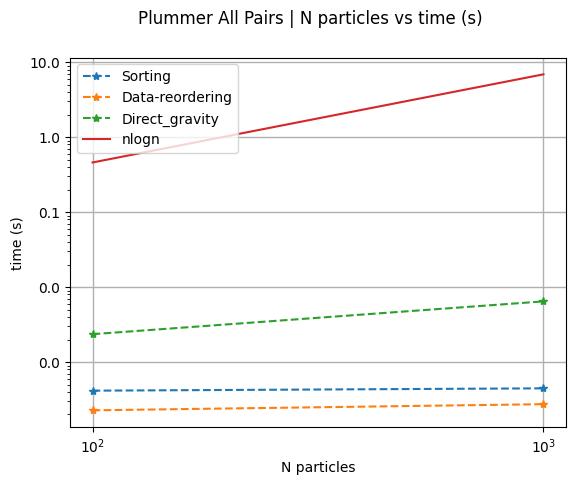

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

x = []
for n in n_pows:
    x.append(10**n)
print(x)

fig, ax = plt.subplots()
fig.suptitle('Plummer All Pairs | N particles vs time (s)', fontsize=12)
ax.set_xlabel("N particles")
ax.set_ylabel("time (s)")

ax.grid(linestyle='-', linewidth=1)
ax.set_yscale('log')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set_xscale('symlog')

for tokens in use_arrays:
    ax.plot(x, token_arrays[tokens],label=tokens, marker ='*',linestyle='dashed')

y = (x * np.log(x)) / 10**3
ax.plot(x, y,label="nlogn")

ax.legend(loc="upper left")
plt.show()

counter = 0
filename = plot_title + "_{}.png"
while os.path.isfile(filename.format(counter)):
    counter += 1
filename = plot_title + "_{}"
plot_title_final = filename.format(counter)

fig.savefig(plot_title_final+".png")

plt.close()

## 